

---



---

Loading libraries:

In [1]:
import torchvision
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import ImageFolder
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms, utils
import numpy as np
import torch.nn as nn
import torch.nn.functional as F



---



---

Data transform. This transformation will make all images gray.

In [2]:
class ToTensor(object):
    """Convert PIL Images in sample to pytorch Tensors."""
    
    ## the input image must be grayscaled first
    def __call__(self, image):
        image = np.array(image)
        # numpy image: H x W
        return torch.from_numpy(image)



---



---

Mounting drive for accessing to the dataset

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive




---



---

Loading data with imageFolder.

In [5]:
class CustomToTensor(object):
    """Convert PIL Images in sample to pytorch Tensors."""
    
    ## the input image must be grayscaled first
    def __call__(self, image):
        image = np.array(image, dtype=np.float32)
        # numpy image: H x W
        return torch.from_numpy(image)

transform = transforms.Compose([transforms.Grayscale(),
                                CustomToTensor()
                               ]
                              ) ## composes multiple transforms into single one

dataset = ImageFolder("/content/gdrive/My Drive/categorized_products"
                      , transform=transform)
classes = dataset.classes



---



---

Dataset is the container which includes all images.

In [6]:
print(dataset)

Dataset ImageFolder
    Number of datapoints: 37249
    Root location: /content/gdrive/My Drive/categorized_products
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
           )




---



---


1. Printing 12 data:

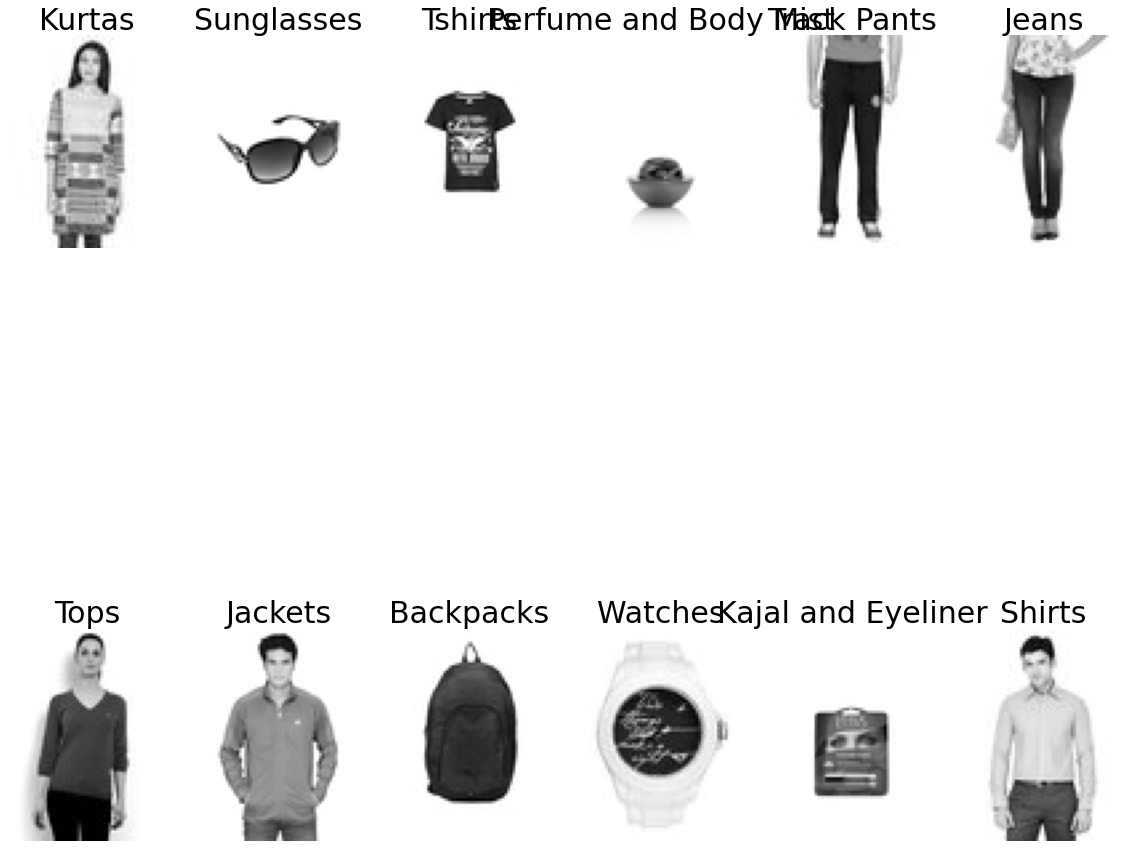

In [ ]:
def getTwelveDiffrentImages():
  data = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=True, num_workers=16)
  seenLabels = []
  seenImages = []
  for images, labels in data:
    if(len(seenLabels) == 12):
        break;
    for i in range(len(images)):
      if labels[i] in seenLabels:
        continue;
      seenImages.append(images[i])
      seenLabels.append(labels[i])
      if(len(seenLabels) == 12):
        break;
    return seenImages, seenLabels

def imshow(img_array, labels, classes):
    _, axs = plt.subplots(2, 6, figsize=(20,20)) 
    for i in range(2):
      for j in range(6):
        axs[i][j].imshow(img_array[i * 6 + j], cmap='gray')
        axs[i][j].set_title(classes[labels[i * 6 + j]], fontsize = 30)
        axs[i][j].axis('off')
    plt.show()

imagesList, labelsList = getTwelveDiffrentImages()

imshow(imagesList, labelsList, classes)



---



---


2a. Number of data in each category and plotting number of data in each class:

In [24]:
data = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True, num_workers=16)
def getNumberDistribution(loader, classes):
  totalCategoryCount = {classes[i] : 0 for i in range(len(classes))}
  for _, labels in loader:
    #print("Here")
    for label in labels:
      #print("Here2")
      totalCategoryCount[ classes[label] ] = totalCategoryCount[ classes[label] ] + 1
  return totalCategoryCount



In [25]:
numberOfDataInCategories = getNumberDistribution(data, classes)

{'Tshirts': 3534, 'Shirts': 3213, 'Casual Shoes': 2846, 'Watches': 2541, 'Sports Shoes': 2035, 'Kurtas': 1844, 'Tops': 1762, 'Handbags': 1757, 'Heels': 1323, 'Sunglasses': 1073, 'Wallets': 936, 'Flip Flops': 916, 'Sandals': 897, 'Belts': 813, 'Backpacks': 722, 'Socks': 686, 'Formal Shoes': 637, 'Perfume and Body Mist': 613, 'Jeans': 608, 'Shorts': 547, 'Trousers': 530, 'Flats': 500, 'Dresses': 464, 'Sarees': 424, 'Earrings': 417, 'Deodorant': 347, 'Nail Polish': 329, 'Lipstick': 315, 'Track Pants': 303, 'Clutches': 290, 'Sweatshirts': 285, 'Caps': 283, 'Sweaters': 277, 'Ties': 261, 'Jackets': 258, 'Innerwear Vests': 241, 'Kurtis': 234, 'Tunics': 229, 'Nightdress': 189, 'Leggings': 177, 'Pendant': 175, 'Capris': 175, 'Necklace and Chains': 160, 'Lip Gloss': 144, 'Night suits': 141, 'Skirts': 128, 'Ring': 118, 'Scarves': 117, 'Dupatta': 116, 'Accessory Gift Set': 111, 'Cufflinks': 106, 'Kajal and Eyeliner': 102}


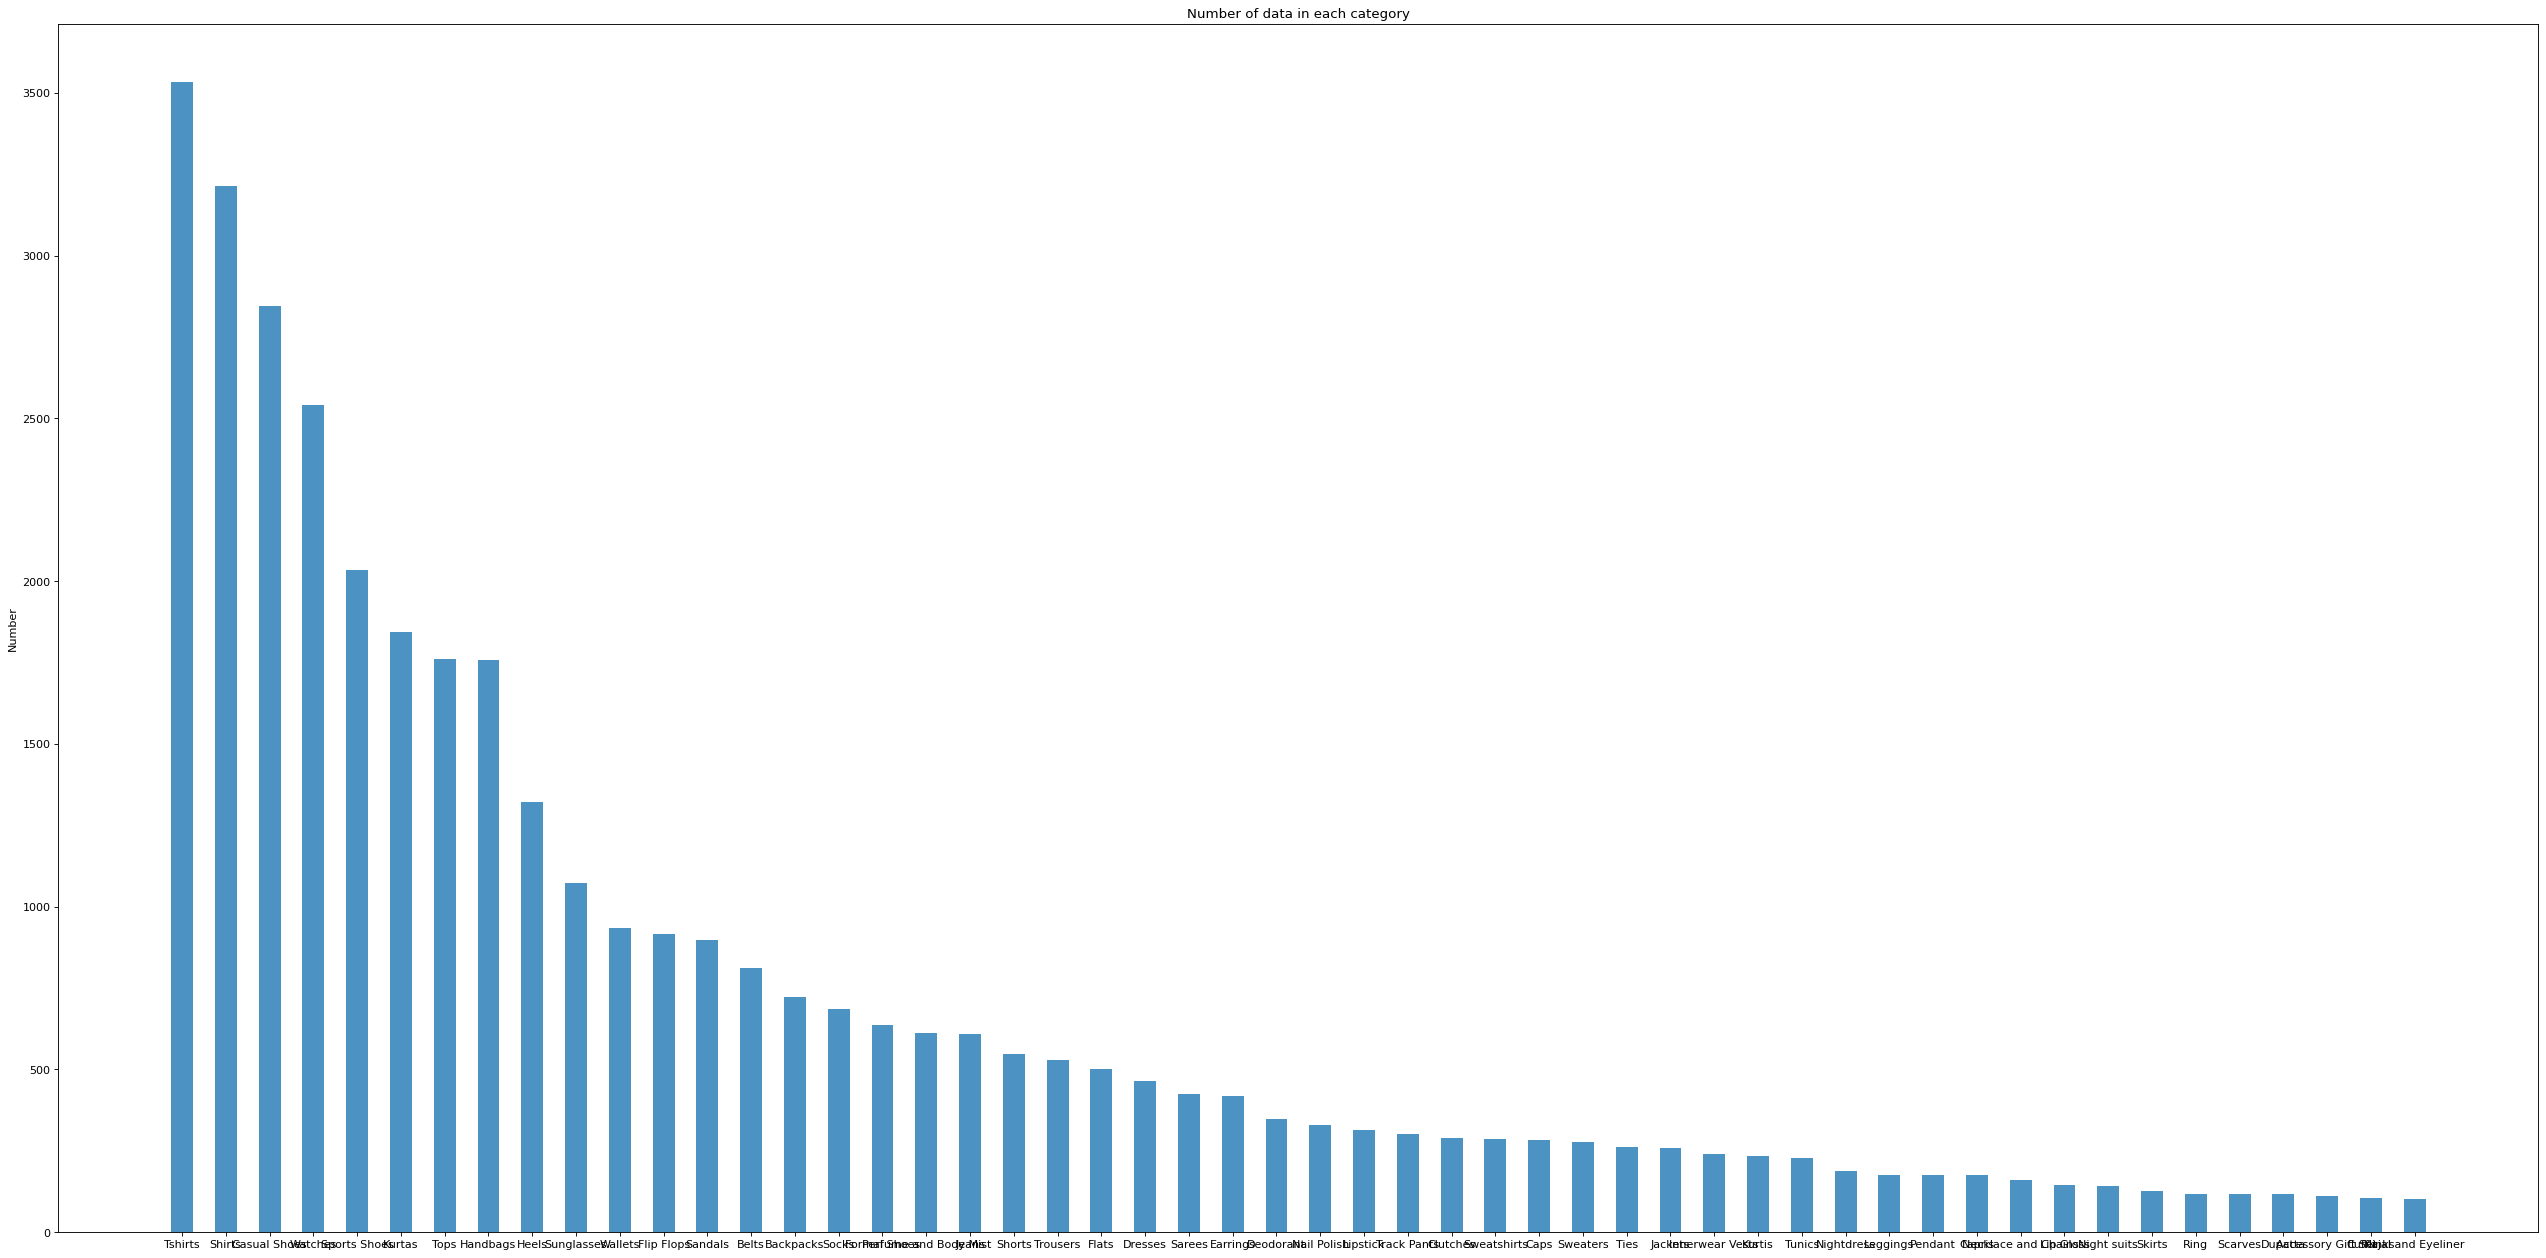

In [ ]:
numberOfDataInCategoriesSorted = sorted(numberOfDataInCategories.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
numberOfDataInCategoriesSorted = dict(numberOfDataInCategoriesSorted)
print(numberOfDataInCategoriesSorted)
objects = list(numberOfDataInCategoriesSorted.keys())
y_pos = np.arange(len(objects))
performance = list(numberOfDataInCategoriesSorted.values())
plt.figure(num = None, figsize=(40, 20), dpi=80, facecolor='w', edgecolor='k')
plt.bar(y_pos, performance, align = 'center', alpha = 0.8, width = 0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number')
plt.title('Number of data in each category')
plt.show()

In [ ]:
print(list(numberOfDataInCategories.values()))

583
37249
[111, 722, 813, 175, 283, 2846, 290, 106, 347, 464, 116, 417, 500, 916, 637, 1757, 1323, 241, 258, 608, 102, 1844, 234, 177, 144, 315, 329, 160, 141, 189, 175, 613, 118, 897, 424, 117, 3213, 547, 128, 686, 2035, 1073, 277, 285, 261, 1762, 303, 530, 3534, 229, 936, 2541]


2b. Splitting:

In [26]:
def getTestIndices(numberOfDataInCategories):
  i = 0
  indices = []
  categoriesWithNumber = list(numberOfDataInCategories.items())
  j = 0
  prevCategory = "" 
  number = int(0.2 * categoriesWithNumber[0][1])

  for data, iCategory in dataset.samples:
    category = categoriesWithNumber[iCategory][0]
    if(prevCategory != "" and prevCategory != category):
      j = 0
      number = int(0.2 * categoriesWithNumber[iCategory][1])
    prevCategory = category
    if(j == number):
      i = i + 1
      continue
    indices.append(i)
    i = i + 1
    j = j + 1
  return indices

In [27]:
def diff(li1, li2): 
    return (list(set(li1) - set(li2))) 
  
def getTrainTest(lenOfDataset, numberOfDataInCategories, alldataset, batchSize):
  testIndices = getTestIndices(numberOfDataInCategories)
  allIndices = list(range(lenOfDataset))
  trainIndices = diff(allIndices, testIndices)
  train_sampler = SubsetRandomSampler(trainIndices)
  test_sampler = SubsetRandomSampler(testIndices)
  train_loader = torch.utils.data.DataLoader(alldataset, batch_size=batchSize, sampler=train_sampler, num_workers=16)
  test_loader = torch.utils.data.DataLoader(alldataset, batch_size=batchSize, sampler=test_sampler, num_workers=16)
  return train_loader, test_loader

In [ ]:
train_loader, test_loader = getTrainTest(len(dataset), numberOfDataInCategories, dataset, 64)

Data distribution in train and validation dataset.

In [ ]:
print(getNumberDistribution(train_loader, classes))

{'Accessory Gift Set': 89, 'Backpacks': 578, 'Belts': 651, 'Capris': 140, 'Caps': 227, 'Casual Shoes': 2277, 'Clutches': 232, 'Cufflinks': 85, 'Deodorant': 278, 'Dresses': 372, 'Dupatta': 93, 'Earrings': 334, 'Flats': 400, 'Flip Flops': 733, 'Formal Shoes': 510, 'Handbags': 1406, 'Heels': 1059, 'Innerwear Vests': 193, 'Jackets': 207, 'Jeans': 487, 'Kajal and Eyeliner': 82, 'Kurtas': 1476, 'Kurtis': 188, 'Leggings': 142, 'Lip Gloss': 116, 'Lipstick': 252, 'Nail Polish': 264, 'Necklace and Chains': 128, 'Night suits': 113, 'Nightdress': 152, 'Pendant': 140, 'Perfume and Body Mist': 491, 'Ring': 0, 'Sandals': 718, 'Sarees': 340, 'Scarves': 94, 'Shirts': 2571, 'Shorts': 438, 'Skirts': 103, 'Socks': 549, 'Sports Shoes': 1628, 'Sunglasses': 859, 'Sweaters': 222, 'Sweatshirts': 228, 'Ties': 209, 'Tops': 1410, 'Track Pants': 243, 'Trousers': 424, 'Tshirts': 2828, 'Tunics': 184, 'Wallets': 749, 'Watches': 2033}


In [ ]:
print(getNumberDistribution(test_loader, classes))

{'Accessory Gift Set': 22, 'Backpacks': 144, 'Belts': 162, 'Capris': 35, 'Caps': 56, 'Casual Shoes': 569, 'Clutches': 58, 'Cufflinks': 21, 'Deodorant': 69, 'Dresses': 92, 'Dupatta': 23, 'Earrings': 83, 'Flats': 100, 'Flip Flops': 183, 'Formal Shoes': 127, 'Handbags': 351, 'Heels': 264, 'Innerwear Vests': 48, 'Jackets': 51, 'Jeans': 121, 'Kajal and Eyeliner': 20, 'Kurtas': 368, 'Kurtis': 46, 'Leggings': 35, 'Lip Gloss': 28, 'Lipstick': 63, 'Nail Polish': 65, 'Necklace and Chains': 32, 'Night suits': 28, 'Nightdress': 37, 'Pendant': 35, 'Perfume and Body Mist': 122, 'Ring': 0, 'Sandals': 179, 'Sarees': 84, 'Scarves': 23, 'Shirts': 642, 'Shorts': 109, 'Skirts': 25, 'Socks': 137, 'Sports Shoes': 407, 'Sunglasses': 214, 'Sweaters': 55, 'Sweatshirts': 57, 'Ties': 52, 'Tops': 352, 'Track Pants': 60, 'Trousers': 106, 'Tshirts': 706, 'Tunics': 45, 'Wallets': 187, 'Watches': 508}




---



---


3.

In [ ]:
class Model(nn.Module):
    def __init__(self, class_num, act=F.relu):
      super(Model, self).__init__()
 
 
      self.layer1 = nn.Linear(1 * 80 * 60, 1500)
      self.act1 = act
 
 
      self.layer2 = nn.Linear(1500, 5000)
      self.act2 = act
 
      self.layer3 = nn.Linear(5000, 1000)
      self.act3 = act
 
 
      self.layer4 = nn.Linear(1000, 500)
      self.act4 = act
 
      self.layer5 = nn.Linear(500, 100)
      self.act5 = act
 
      self.layer6 = nn.Linear(100, 80)
      self.act6 = act
 
 
      self.layer7 = nn.Linear(80, 10)
      self.act7 = act
 
 
      self.layer8 = nn.Linear(10, class_num)

    def forward(self, x):

        x = x.view(x.size(0), -1)

        x = self.layer1(x)
        x = self.act1(x)

        x = self.layer2(x)
        x = self.act2(x)

        x = self.layer3(x)
        x = self.act3(x)

        x = self.layer4(x)
        x = self.act4(x)

        x = self.layer5(x)
        x = self.act5(x)

        x = self.layer6(x)
        x = self.act6(x)

        x = self.layer7(x)
        x = self.act7(x)

        x = self.layer8(x)
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model = Model(len(classes))

model = model.to(device)



---



---


3.a.

Initial weights:

In [ ]:
print("LAYER 1: ")
for parameter in model.layer1.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 2: ")  
for parameter in model.layer2.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 3: ")
for parameter in model.layer3.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 4: ")
for parameter in model.layer4.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 5: ")
for parameter in model.layer5.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 6: ")
for parameter in model.layer6.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 7: ")
for parameter in model.layer7.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))

LAYER 1: 
Parameter containing:
tensor([[-0.0134,  0.0100, -0.0111,  ..., -0.0018, -0.0056,  0.0081],
        [ 0.0049, -0.0105,  0.0041,  ...,  0.0084, -0.0093,  0.0082],
        [ 0.0004, -0.0059,  0.0059,  ...,  0.0136, -0.0017,  0.0056],
        ...,
        [-0.0079,  0.0084,  0.0140,  ...,  0.0038,  0.0021,  0.0071],
        [ 0.0023,  0.0014, -0.0082,  ...,  0.0004, -0.0119,  0.0016],
        [-0.0050,  0.0024,  0.0141,  ..., -0.0040,  0.0121, -0.0033]],
       device='cuda:0', requires_grad=True)
Number of Paramers:  1500
Parameter containing:
tensor([ 0.0057,  0.0047,  0.0132,  ...,  0.0101, -0.0010, -0.0022],
       device='cuda:0', requires_grad=True)
Number of Paramers:  1500
LAYER 2: 
Parameter containing:
tensor([[ 0.0014, -0.0148, -0.0139,  ...,  0.0002, -0.0176, -0.0132],
        [-0.0178,  0.0129,  0.0165,  ..., -0.0206,  0.0146, -0.0141],
        [ 0.0012, -0.0127, -0.0057,  ..., -0.0223, -0.0240, -0.0041],
        ...,
        [ 0.0239,  0.0152,  0.0041,  ..., -0.025

Number of parameters:

In [ ]:
print(model.parameters)

<bound method Module.parameters of Model(
  (layer1): Linear(in_features=4800, out_features=1500, bias=True)
  (layer2): Linear(in_features=1500, out_features=5000, bias=True)
  (layer3): Linear(in_features=5000, out_features=1000, bias=True)
  (layer4): Linear(in_features=1000, out_features=500, bias=True)
  (layer5): Linear(in_features=500, out_features=100, bias=True)
  (layer6): Linear(in_features=100, out_features=80, bias=True)
  (layer7): Linear(in_features=80, out_features=10, bias=True)
  (layer8): Linear(in_features=10, out_features=52, bias=True)
)>


In [ ]:
learning_rate = 0.03
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [35]:
import time
from datetime import timedelta
from datetime import datetime
def fit(model, train_loader, device, criterion, optimizer, num_epochs=10):

  total_time = 0.
  losses = []
  for epoch in range(num_epochs):
      train_loss = 0.
      d1 = datetime.now()
      for images, labels in train_loader:
        
        images = images.to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()
        train_loss += loss.item()
      average_loss = train_loss / len(train_loader)
      losses.append(average_loss)
      d2 = datetime.now()
      delta = d2 - d1
      seconds = float(delta.total_seconds())
      total_time += seconds
      print('epoch %d, train_loss: %.3f, time elapsed: %s seconds' % (epoch + 1, average_loss, seconds))
  print('total training time: %.3f minutes' % (total_time / 60))
  return losses

3.b.

In [ ]:
losses = fit(model, train_loader, device, criterion, optimizer)

epoch 1, train_loss: 3.857, time elapsed: 28.18753 seconds
epoch 2, train_loss: 3.643, time elapsed: 28.430662 seconds
epoch 3, train_loss: 3.550, time elapsed: 27.960531 seconds
epoch 4, train_loss: 3.509, time elapsed: 28.143153 seconds
epoch 5, train_loss: 3.489, time elapsed: 28.186188 seconds
epoch 6, train_loss: 3.477, time elapsed: 27.808326 seconds
epoch 7, train_loss: 3.470, time elapsed: 27.755563 seconds
epoch 8, train_loss: 3.465, time elapsed: 28.170851 seconds
epoch 9, train_loss: 3.462, time elapsed: 27.722416 seconds
epoch 10, train_loss: 3.460, time elapsed: 28.045459 seconds
total training time: 4.674 minutes


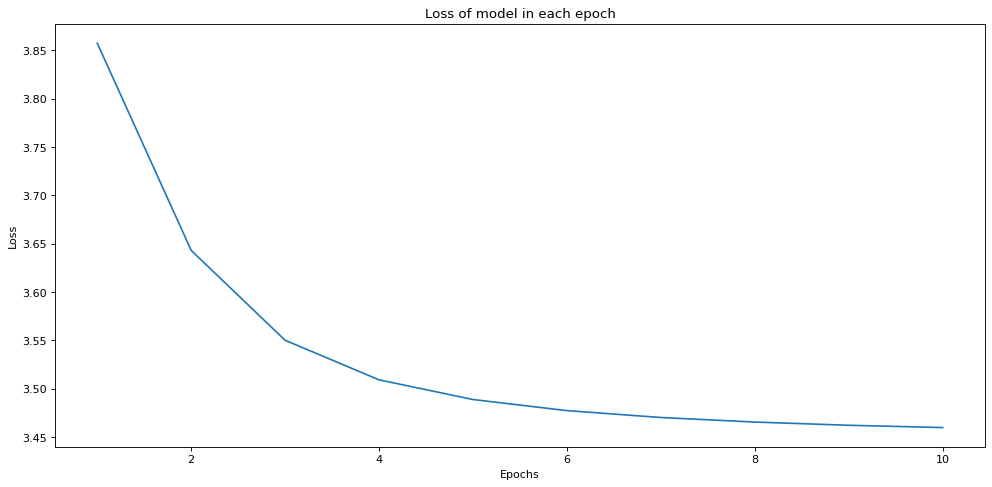

In [ ]:
import matplotlib.pyplot as plt
def plotLossesInEpochs(losses, epochsize):
  epochs = []
  for i in range(epochsize):
    epochs.append(i + 1)
  plt.figure(num = None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
  plt.plot(epochs, losses)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Loss of model in each epoch")

plotLossesInEpochs(losses, 10)

In [40]:
def test_model_accuracy(model, test_loader):
    # Calculate Accuracy         
    correct = 0.
    total = 0.
    # Iterate through test dataset
    with torch.no_grad():
      for images, labels in test_loader:
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.to('cpu') == labels).sum().item()

    accuracy = 100 * correct / total
    print('Accuracy: {}%'.format(accuracy))
    return accuracy

In [ ]:
test_model_accuracy(model, test_loader)

Accuracy: 9.503297886660384%


9.503297886660384

In [ ]:
test_model_accuracy(model, train_loader)

Accuracy: 9.48356807511737%


9.48356807511737

OUTPUT TESR: 
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 100.0, 49: 0.0, 50: 0.0, 51: 0.0}
OUTPUT Train: 
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 100.0, 49: 0.0, 50: 0.0, 51: 0.0}


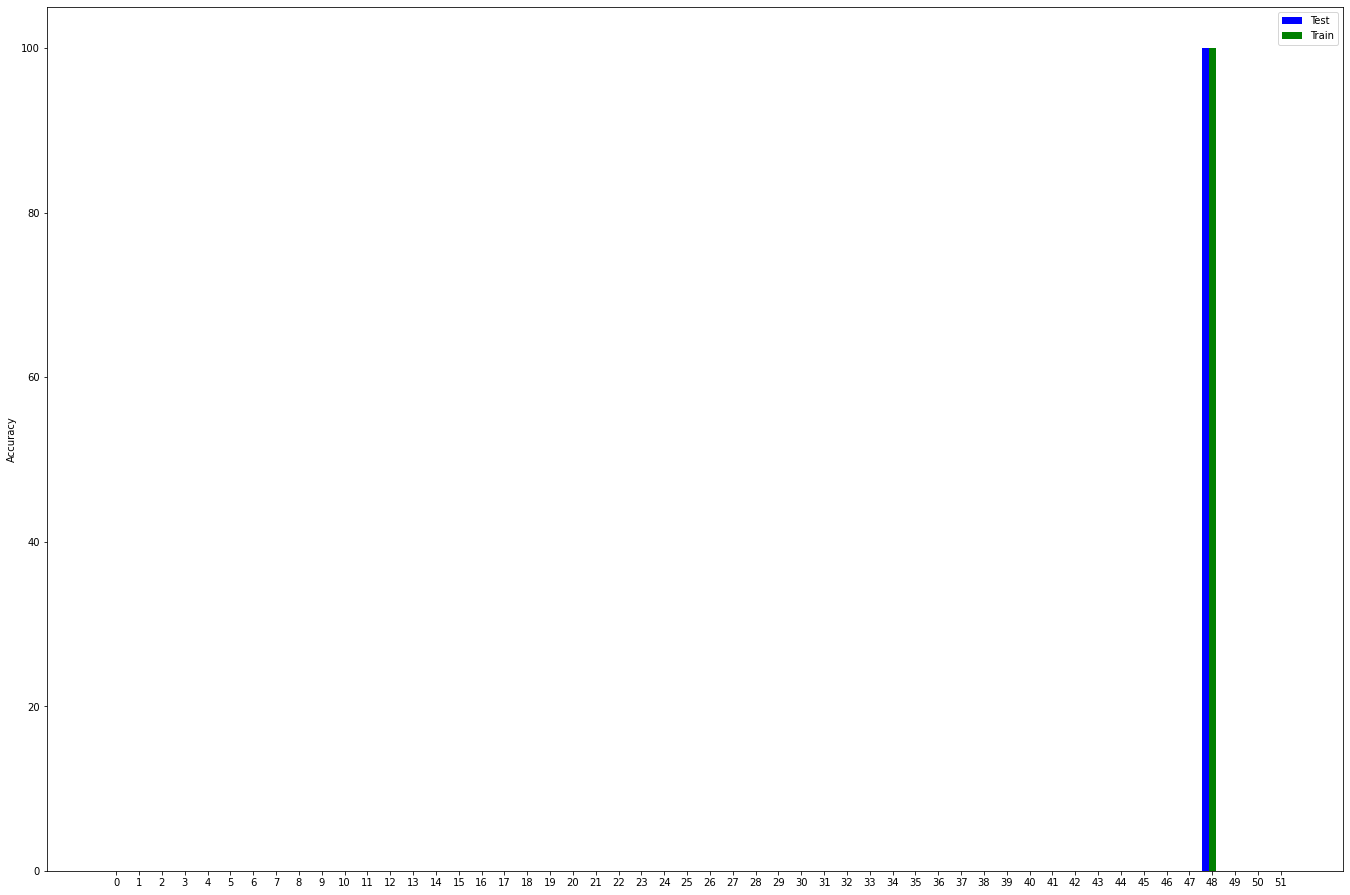

In [ ]:
def getAccuracyOfClasses(model, test_loader, train_loader, classes):
  numberOfDataInTest = getNumberDistribution(test_loader, classes)
  numberOfDataInTest = list(numberOfDataInTest.items())
  numberOfDataInTrain = getNumberDistribution(train_loader, classes)
  numberOfDataInTrain = list(numberOfDataInTrain.items())
  outputTest = {}
  outputTrain = {}
  for i in range(52):
    outputTest.update({i : 0})
  with torch.no_grad():
    for images, labels in test_loader:
      outputs = model(images.to(device))
      _, predicted = torch.max(outputs.data, 1)
      numericLabels = labels.numpy()
      numericPredicted = predicted.to('cpu') .numpy()
      for i in range(len(numericLabels)): 
        if(numericLabels[i] == numericPredicted[i]):
          outputTest[numericLabels[i]] = outputTest[numericLabels[i]] + 1
  for i in range(len(numberOfDataInTest)):
    outputTest[i] = 100 * outputTest[i] / numberOfDataInTest[i][1]

  for i in range(52):
    outputTrain.update({i : 0})
  with torch.no_grad():
    for images, labels in train_loader:
      outputs = model(images.to(device))
      _, predicted = torch.max(outputs.data, 1)
      numericLabels = labels.numpy()
      numericPredicted = predicted.to('cpu') .numpy()
      for i in range(len(numericLabels)): 
        if(numericLabels[i] == numericPredicted[i]):
          outputTrain[numericLabels[i]] = outputTrain[numericLabels[i]] + 1
  for i in range(len(numberOfDataInTrain)):
    outputTrain[i] = 100 * outputTrain[i] / numberOfDataInTrain[i][1]
  print("OUTPUT TESR: ")
  print(outputTest)
  print("OUTPUT Train: ")
  print(outputTrain)  
  data = [list(outputTest.values()), list(outputTrain.values())]  
  X = np.arange(52)
  fig = plt.figure()
  ax = fig.add_axes([0,0,3,3])
  r0 = ax.bar(X , data[0], color = 'b', width = 0.3)
  r1 = ax.bar(X + 0.3, data[1], color = 'g', width = 0.3)
  ax.set_ylabel('Accuracy')
  ax.set_xticks(X+0.3)
  ax.set_xticklabels( list(outputTest.keys()) )
  ax.legend( (r0, r1), ('Test', 'Train') )
  return outputTrain, outputTest
outputTrain, outputTest = getAccuracyOfClasses(model, test_loader, train_loader, classes)

In [ ]:
print(list((model.layer1.parameters())))

[Parameter containing:
tensor([[-0.0134,  0.0100, -0.0111,  ..., -0.0018, -0.0056,  0.0081],
        [ 0.0048, -0.0106,  0.0040,  ...,  0.0083, -0.0094,  0.0081],
        [ 0.0006, -0.0057,  0.0061,  ...,  0.0138, -0.0015,  0.0057],
        ...,
        [-0.0079,  0.0084,  0.0140,  ...,  0.0038,  0.0021,  0.0071],
        [ 0.0023,  0.0014, -0.0082,  ...,  0.0004, -0.0119,  0.0016],
        [-0.0050,  0.0024,  0.0141,  ..., -0.0040,  0.0121, -0.0033]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([ 0.0057,  0.0047,  0.0132,  ...,  0.0101, -0.0010, -0.0022],
       device='cuda:0', requires_grad=True)]




---



---


4.

In [28]:
class ToTensor(object):
    """Convert PIL Images in sample to pytorch Tensors."""
    
    ## the input image must be grayscaled first
    def __call__(self, image):
        image = np.array(image, dtype=np.float32) / 255
        # numpy image: H x W
        return torch.from_numpy(image)


transform = transforms.Compose([transforms.Grayscale(),
                                ToTensor()
                               ]
                              ) ## composes multiple transforms into single one

datasetNormalized = ImageFolder( "/content/gdrive/My Drive/categorized_products"
                      , transform=transform)
classes = datasetNormalized.classes
print(datasetNormalized)

Dataset ImageFolder
    Number of datapoints: 37249
    Root location: /content/gdrive/My Drive/categorized_products
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
           )


In [29]:
trainLoaderNormalized, testLoaderNormalized = getTrainTest(len(datasetNormalized), numberOfDataInCategories, datasetNormalized, 64)

In [ ]:
losses = fit(model, trainLoaderNormalized, device, criterion, optimizer)


epoch 1, train_loss: 3.458, time elapsed: 28.569924 seconds
epoch 2, train_loss: 3.456, time elapsed: 28.528006 seconds
epoch 3, train_loss: 3.454, time elapsed: 29.708905 seconds
epoch 4, train_loss: 3.451, time elapsed: 29.065261 seconds
epoch 5, train_loss: 3.417, time elapsed: 30.094405 seconds
epoch 6, train_loss: 3.137, time elapsed: 28.589691 seconds
epoch 7, train_loss: 2.832, time elapsed: 28.642737 seconds
epoch 8, train_loss: 2.634, time elapsed: 28.448064 seconds
epoch 9, train_loss: 2.462, time elapsed: 28.68165 seconds
epoch 10, train_loss: 2.359, time elapsed: 28.439248 seconds
total training time: 4.813 minutes


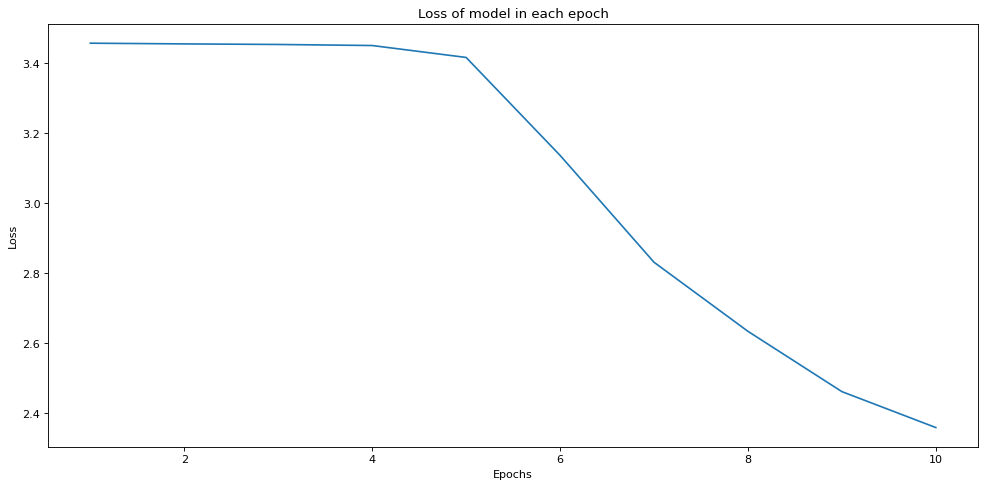

In [ ]:
plotLossesInEpochs(losses, 10)

In [ ]:
test_model_accuracy(model, testLoaderNormalized)

Accuracy: 27.823394804145913%


27.823394804145913

In [ ]:
test_model_accuracy(model, trainLoaderNormalized)

Accuracy: 28.608316566063046%


28.608316566063046

OUTPUT TESR: 
{0: 0.0, 1: 1.3888888888888888, 2: 30.864197530864196, 3: 0.0, 4: 0.0, 5: 1.40597539543058, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 41.59544159544159, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 32.960893854748605, 34: 0.0, 35: 0.0, 36: 22.741433021806852, 37: 0.0, 38: 0.0, 39: 0.0, 40: 90.41769041769042, 41: 99.06542056074767, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 84.56090651558074, 49: 0.0, 50: 43.31550802139037, 51: 78.34645669291339}
OUTPUT Train: 
{0: 0.0, 1: 1.7301038062283738, 2: 39.784946236559136, 3: 0.0, 4: 0.0, 5: 0.966183574879227, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 53.627311522048366, 16: 0.8498583569405099, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32

({0: 0.0,
  1: 1.7301038062283738,
  2: 39.784946236559136,
  3: 0.0,
  4: 0.0,
  5: 0.966183574879227,
  6: 0.0,
  7: 0.0,
  8: 0.0,
  9: 0.0,
  10: 0.0,
  11: 0.0,
  12: 0.0,
  13: 0.0,
  14: 0.0,
  15: 53.627311522048366,
  16: 0.8498583569405099,
  17: 0.0,
  18: 0.0,
  19: 0.0,
  20: 0.0,
  21: 0.0,
  22: 0.0,
  23: 0.0,
  24: 0.0,
  25: 0.0,
  26: 0.0,
  27: 0.0,
  28: 0.0,
  29: 0.0,
  30: 0.0,
  31: 0.0,
  32: 0.0,
  33: 41.92200557103064,
  34: 0.0,
  35: 0.0,
  36: 29.56048230260599,
  37: 0.0,
  38: 0.0,
  39: 0.0,
  40: 83.47665847665847,
  41: 95.34342258440047,
  42: 0.0,
  43: 0.0,
  44: 0.0,
  45: 0.0,
  46: 0.0,
  47: 0.0,
  48: 77.5106082036775,
  49: 0.0,
  50: 65.68758344459279,
  51: 76.4387604525332},
 {0: 0.0,
  1: 1.3888888888888888,
  2: 30.864197530864196,
  3: 0.0,
  4: 0.0,
  5: 1.40597539543058,
  6: 0.0,
  7: 0.0,
  8: 0.0,
  9: 0.0,
  10: 0.0,
  11: 0.0,
  12: 0.0,
  13: 0.0,
  14: 0.0,
  15: 41.59544159544159,
  16: 0.0,
  17: 0.0,
  18: 0.0,
  19: 0.0,


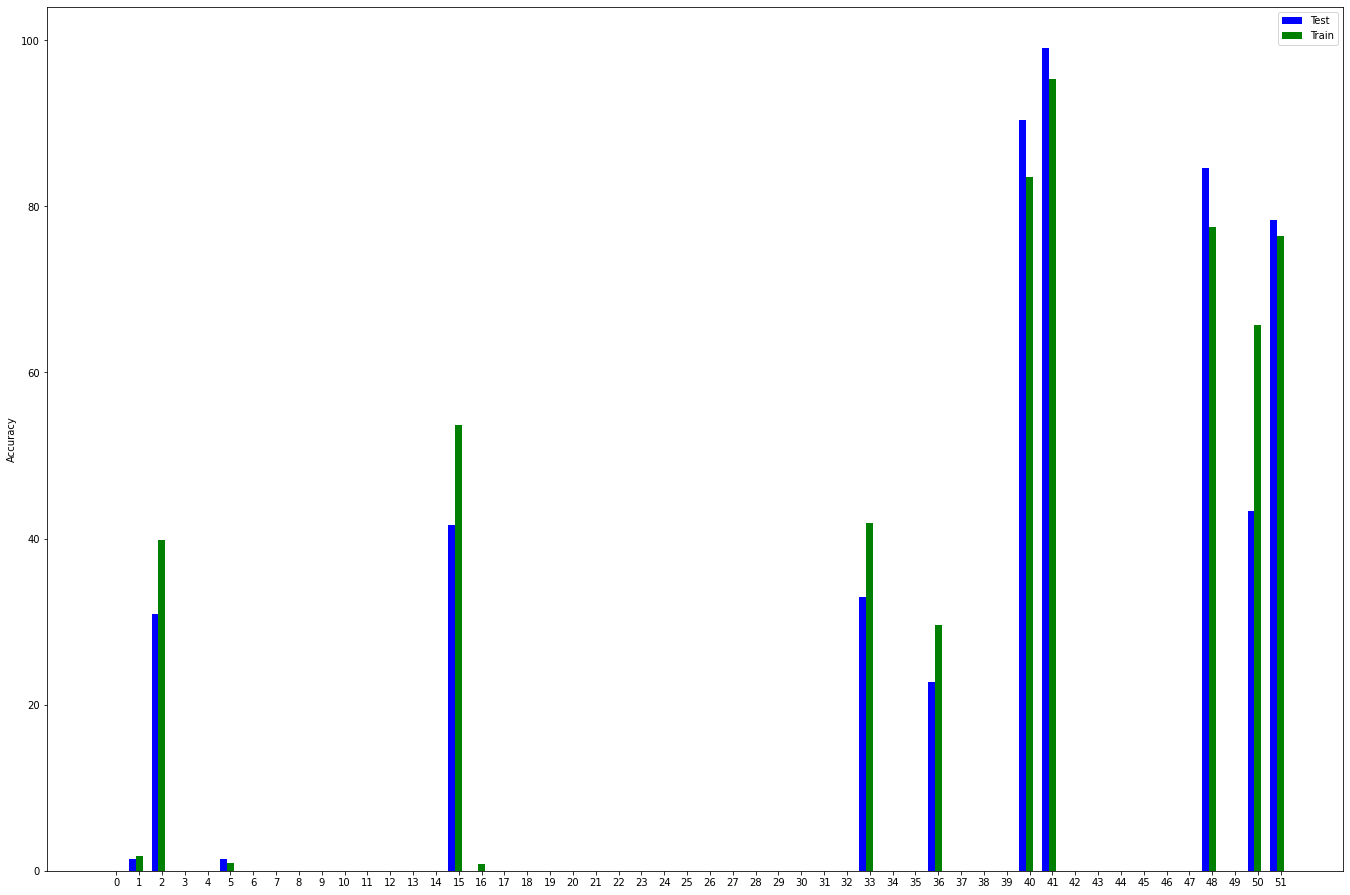

In [ ]:
getAccuracyOfClasses(model, testLoaderNormalized, trainLoaderNormalized, classes)

In [ ]:
print(getNumberDistribution(testLoaderNormalized, classes))

{'Accessory Gift Set': 22, 'Backpacks': 144, 'Belts': 162, 'Capris': 35, 'Caps': 56, 'Casual Shoes': 569, 'Clutches': 58, 'Cufflinks': 21, 'Deodorant': 69, 'Dresses': 92, 'Dupatta': 23, 'Earrings': 83, 'Flats': 100, 'Flip Flops': 183, 'Formal Shoes': 127, 'Handbags': 351, 'Heels': 264, 'Innerwear Vests': 48, 'Jackets': 51, 'Jeans': 121, 'Kajal and Eyeliner': 20, 'Kurtas': 368, 'Kurtis': 46, 'Leggings': 35, 'Lip Gloss': 28, 'Lipstick': 63, 'Nail Polish': 65, 'Necklace and Chains': 32, 'Night suits': 28, 'Nightdress': 37, 'Pendant': 35, 'Perfume and Body Mist': 122, 'Ring': 23, 'Sandals': 179, 'Sarees': 84, 'Scarves': 23, 'Shirts': 642, 'Shorts': 109, 'Skirts': 25, 'Socks': 137, 'Sports Shoes': 407, 'Sunglasses': 214, 'Sweaters': 55, 'Sweatshirts': 57, 'Ties': 52, 'Tops': 352, 'Track Pants': 60, 'Trousers': 106, 'Tshirts': 706, 'Tunics': 45, 'Wallets': 187, 'Watches': 508}


New improved model:

In [33]:
class Model2(nn.Module):
    def __init__(self, class_num, act=F.relu):
      super(Model2, self).__init__()
 
 
      self.layer1 = nn.Linear(1 * 80 * 60, 8000)
      self.act1 = act
 
 
      self.layer2 = nn.Linear(8000, 5000)
      self.act2 = act
 
      self.layer3 = nn.Linear(5000, 2000)
      self.act3 = act
 
 
      self.layer4 = nn.Linear(2000, 200)
      self.act4 = act
 
      self.layer5 = nn.Linear(200, 20)
      self.act5 = act

      self.layer6 = nn.Linear(20, class_num)

    def forward(self, x):

        x = x.view(x.size(0), -1)

        x = self.layer1(x)
        x = self.act1(x)

        x = self.layer2(x)
        x = self.act2(x)

        x = self.layer3(x)
        x = self.act3(x)

        x = self.layer4(x)
        x = self.act4(x)

        x = self.layer5(x)
        x = self.act5(x)

        x = self.layer6(x)
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model2 = Model2(len(classes))

model2 = model2.to(device)

In [ ]:
print(model2.parameters)

<bound method Module.parameters of Model2(
  (layer1): Linear(in_features=4800, out_features=8000, bias=True)
  (layer2): Linear(in_features=8000, out_features=5000, bias=True)
  (layer3): Linear(in_features=5000, out_features=2000, bias=True)
  (layer4): Linear(in_features=2000, out_features=200, bias=True)
  (layer5): Linear(in_features=200, out_features=20, bias=True)
  (layer6): Linear(in_features=20, out_features=52, bias=True)
)>


In [ ]:
learning_rate = 0.03
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate)

In [ ]:
losses = fit(model2, trainLoaderNormalized, device, criterion, optimizer)

epoch 1, train_loss: 3.456, time elapsed: 28.867049 seconds
epoch 2, train_loss: 2.616, time elapsed: 28.735287 seconds
epoch 3, train_loss: 2.217, time elapsed: 28.931537 seconds
epoch 4, train_loss: 1.973, time elapsed: 28.779906 seconds
epoch 5, train_loss: 1.805, time elapsed: 29.112354 seconds
epoch 6, train_loss: 1.651, time elapsed: 28.92118 seconds
epoch 7, train_loss: 1.536, time elapsed: 28.87578 seconds
epoch 8, train_loss: 1.449, time elapsed: 29.357027 seconds
epoch 9, train_loss: 1.377, time elapsed: 28.615056 seconds
epoch 10, train_loss: 1.307, time elapsed: 29.770527 seconds
total training time: 4.833 minutes


In [ ]:
test_model_accuracy(model2, testLoaderNormalized)

Accuracy: 55.714093417687444%


55.714093417687444

In [ ]:
test_model_accuracy(model2, trainLoaderNormalized)

Accuracy: 56.74379610999329%


56.74379610999329

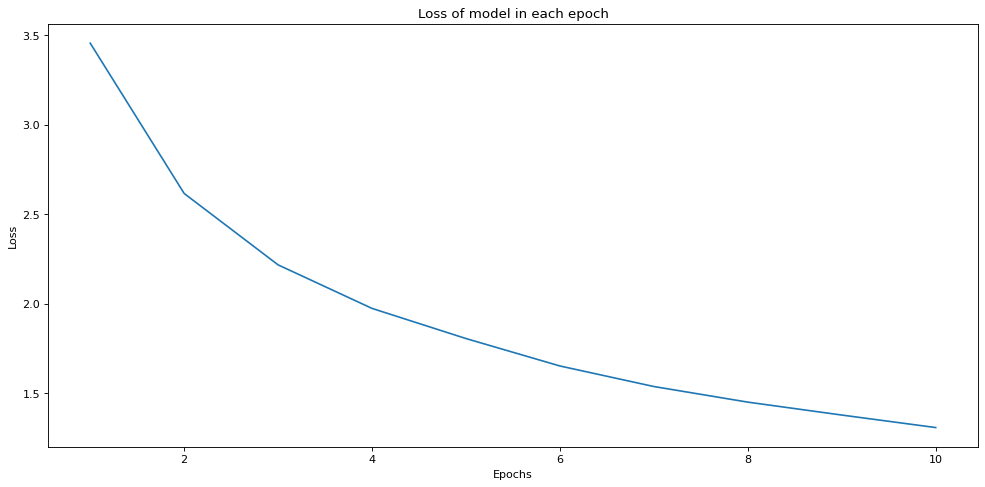

In [ ]:
plotLossesInEpochs(losses, 10)

OUTPUT TESR: 
{0: 0.0, 1: 1.3888888888888888, 2: 30.864197530864196, 3: 0.0, 4: 0.0, 5: 1.40597539543058, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 41.59544159544159, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 32.960893854748605, 34: 0.0, 35: 0.0, 36: 22.741433021806852, 37: 0.0, 38: 0.0, 39: 0.0, 40: 90.41769041769042, 41: 99.06542056074767, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 84.56090651558074, 49: 0.0, 50: 43.31550802139037, 51: 78.34645669291339}
OUTPUT Train: 
{0: 0.0, 1: 1.7301038062283738, 2: 39.784946236559136, 3: 0.0, 4: 0.0, 5: 0.966183574879227, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 53.627311522048366, 16: 0.8498583569405099, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32

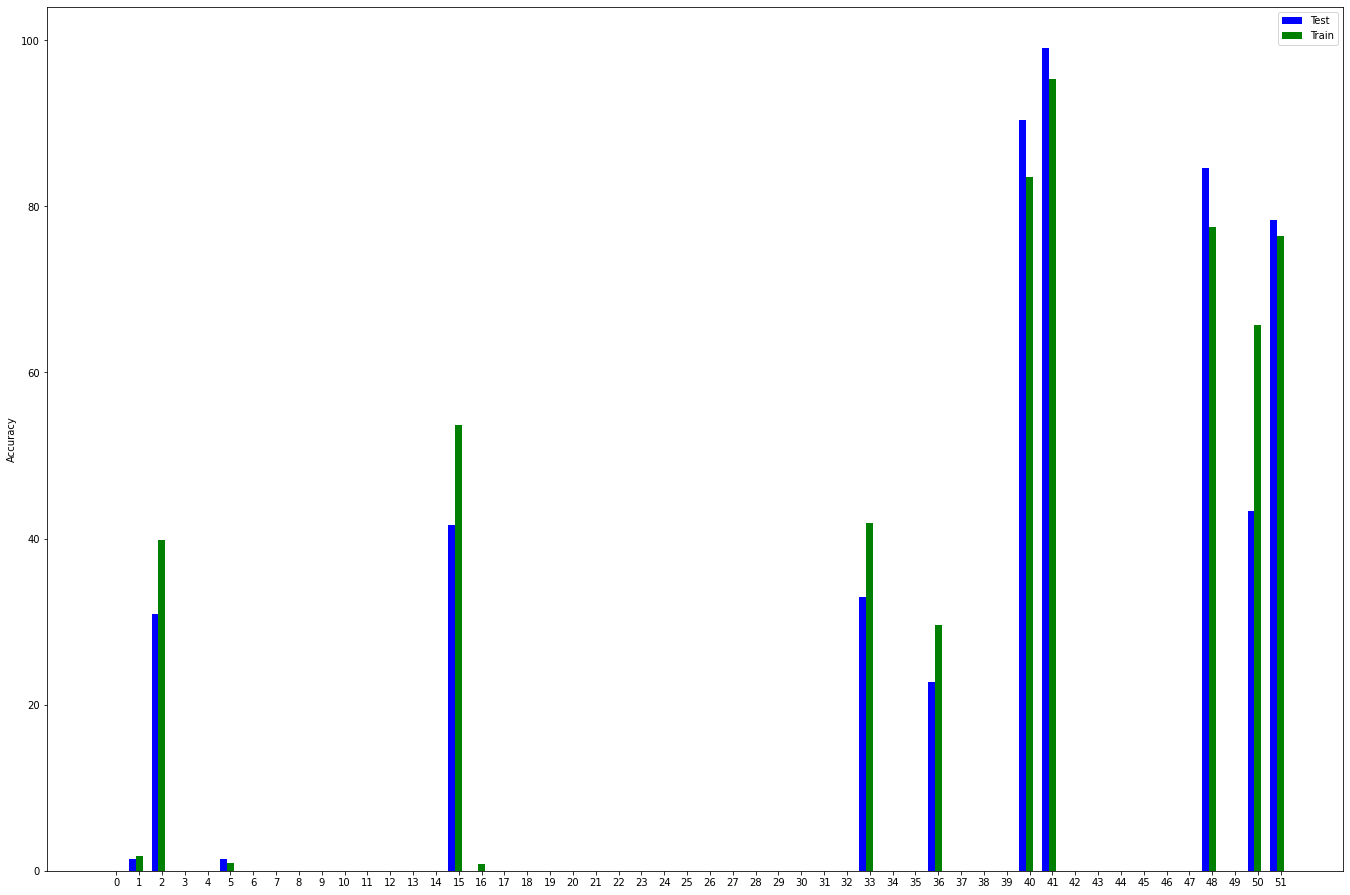

In [ ]:
accTrain, accTest = getAccuracyOfClasses(model, testLoaderNormalized, trainLoaderNormalized, classes)


OUTPUT TESR: 
{0: 0.0, 1: 88.19444444444444, 2: 98.14814814814815, 3: 0.0, 4: 53.57142857142857, 5: 31.81019332161687, 6: 15.517241379310345, 7: 0.0, 8: 20.28985507246377, 9: 8.695652173913043, 10: 0.0, 11: 16.867469879518072, 12: 0.0, 13: 66.12021857923497, 14: 46.45669291338583, 15: 92.5925925925926, 16: 55.68181818181818, 17: 0.0, 18: 33.333333333333336, 19: 36.36363636363637, 20: 0.0, 21: 85.32608695652173, 22: 0.0, 23: 0.0, 24: 0.0, 25: 34.92063492063492, 26: 0.0, 27: 0.0, 28: 3.5714285714285716, 29: 2.7027027027027026, 30: 0.0, 31: 2.459016393442623, 32: 0.0, 33: 48.60335195530726, 34: 66.66666666666667, 35: 0.0, 36: 54.205607476635514, 37: 55.04587155963303, 38: 0.0, 39: 51.824817518248175, 40: 87.46928746928747, 41: 100.0, 42: 7.2727272727272725, 43: 3.508771929824561, 44: 0.0, 45: 53.69318181818182, 46: 66.66666666666667, 47: 0.9433962264150944, 48: 64.44759206798867, 49: 0.0, 50: 85.56149732620321, 51: 98.4251968503937}
OUTPUT Train: 
{0: 43.82022471910113, 1: 90.311418685121

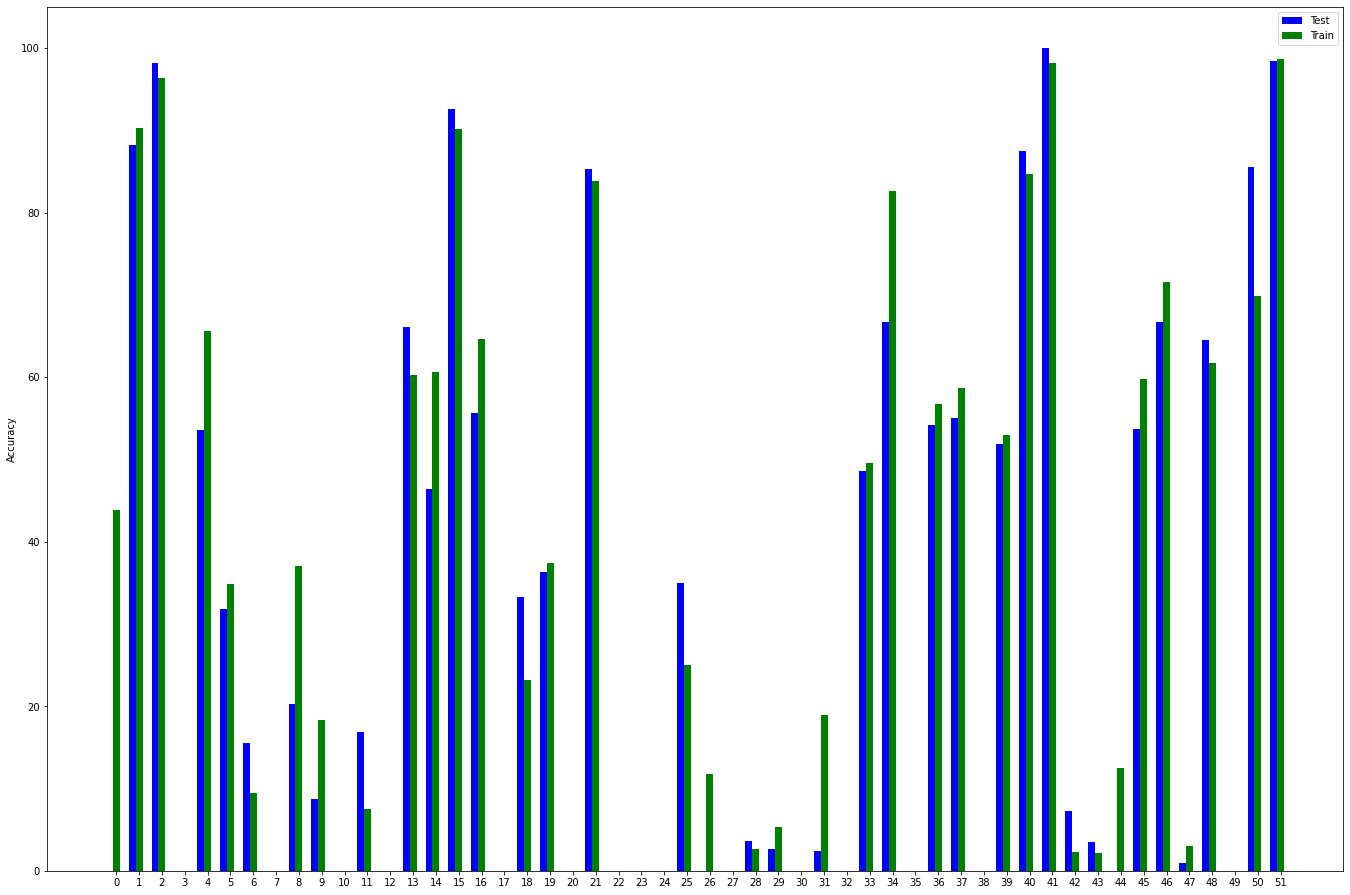

In [ ]:

print(getAccuracyOfClasses(model2, testLoaderNormalized, trainLoaderNormalized, classes))




---



---


5.

5.a. Setting weights to zero:

In [43]:
def init_weights(m):
    if type(m) == nn.Linear:
        m.weight.data.fill_(0)
        m.bias.data.fill_(0)

model2.apply(init_weights)

Model2(
  (layer1): Linear(in_features=4800, out_features=8000, bias=True)
  (layer2): Linear(in_features=8000, out_features=5000, bias=True)
  (layer3): Linear(in_features=5000, out_features=2000, bias=True)
  (layer4): Linear(in_features=2000, out_features=200, bias=True)
  (layer5): Linear(in_features=200, out_features=20, bias=True)
  (layer6): Linear(in_features=20, out_features=52, bias=True)
)

In [ ]:
print(list((model2.layer1.parameters())))

[Parameter containing:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0., 0., 0.,  ..., 0., 0., 0.], device='cuda:0', requires_grad=True)]


In [36]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model2 = Model2(len(classes))
model2.apply(init_weights)
model2 = model2.to(device)
learning_rate = 0.03
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate)
losses = fit(model2, trainLoaderNormalized, device, criterion, optimizer)

cuda:0
epoch 1, train_loss: 3.805, time elapsed: 35.563388 seconds
epoch 2, train_loss: 3.620, time elapsed: 36.153974 seconds
epoch 3, train_loss: 3.540, time elapsed: 35.463488 seconds
epoch 4, train_loss: 3.505, time elapsed: 35.160943 seconds
epoch 5, train_loss: 3.487, time elapsed: 35.47369 seconds
epoch 6, train_loss: 3.476, time elapsed: 35.246358 seconds
epoch 7, train_loss: 3.470, time elapsed: 35.895896 seconds
epoch 8, train_loss: 3.465, time elapsed: 35.43734 seconds
epoch 9, train_loss: 3.462, time elapsed: 35.229291 seconds
epoch 10, train_loss: 3.460, time elapsed: 35.611384 seconds
total training time: 5.921 minutes


In [47]:
print(list((model2.layer6.parameters())))

[Parameter containing:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.], device='cuda:0', requires_grad=True)]


In [41]:
test_model_accuracy(model2, testLoaderNormalized)

Accuracy: 9.503297886660384%


9.503297886660384

In [42]:
test_model_accuracy(model2, trainLoaderNormalized)

Accuracy: 9.48356807511737%


9.48356807511737

OUTPUT TESR: 
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 100.0, 49: 0.0, 50: 0.0, 51: 0.0}
OUTPUT Train: 
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 100.0, 49: 0.0, 50: 0.0, 51: 0.0}


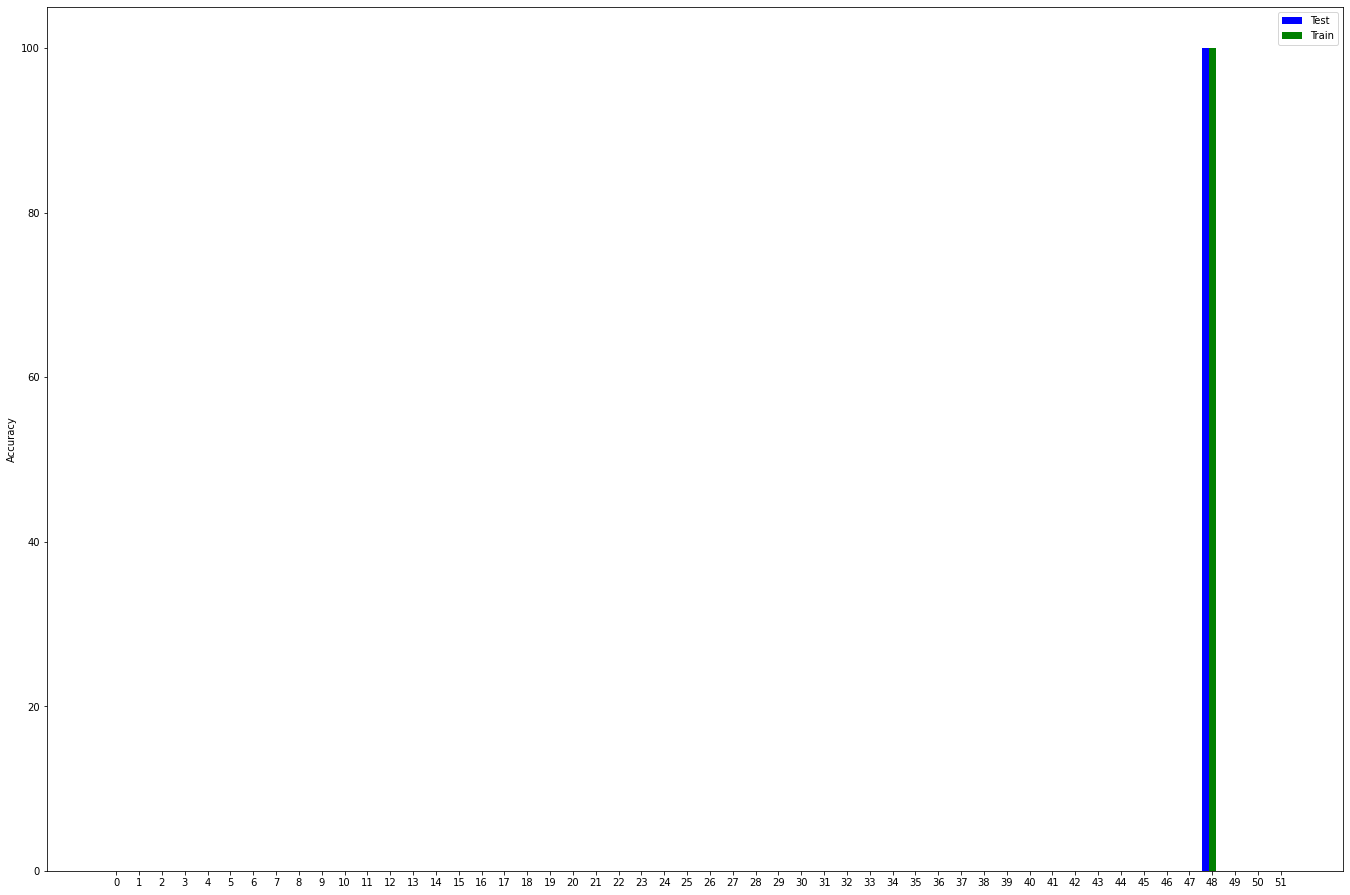

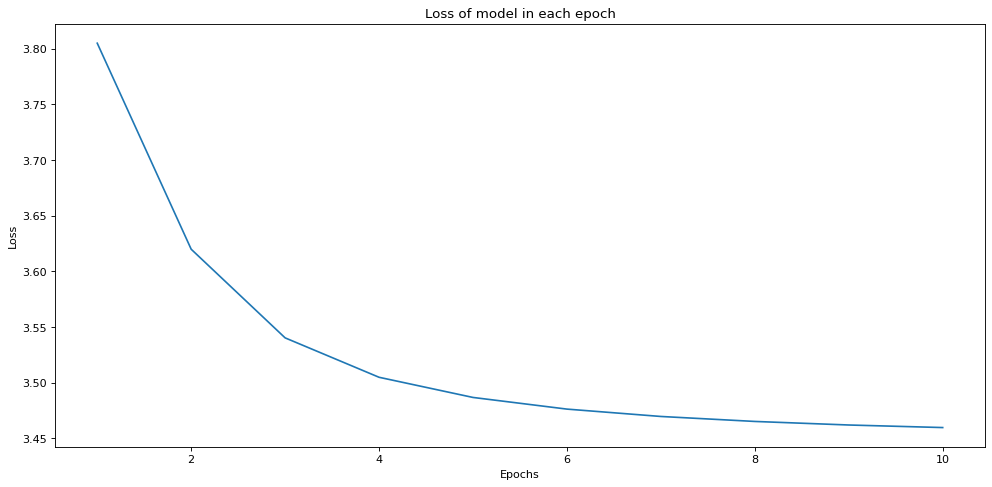

In [38]:
accTrain, accTest = getAccuracyOfClasses(model2, testLoaderNormalized, trainLoaderNormalized, classes)
plotLossesInEpochs(losses, 10)



---



---


6.

In [ ]:
import numpy
accuracies = []
for i in numpy.arange(0.001, 0.1, 0.007):
  print("Leraning Rate = ", i)
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print(device)
  model2 = Model2(len(classes))
  model2 = model2.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model2.parameters(), lr=i)
  fit(model2, trainLoaderNormalized, device, criterion, optimizer)
  accuracies.append(test_model_accuracy(model2, testLoaderNormalized))
  print("Next::::::::::::::::::::::::::::;")

Leraning Rate =  0.001
cuda:0
epoch 1, train_loss: 3.913, time elapsed: 30.814497 seconds
epoch 2, train_loss: 3.890, time elapsed: 29.268541 seconds
epoch 3, train_loss: 3.862, time elapsed: 29.414952 seconds
epoch 4, train_loss: 3.819, time elapsed: 29.036358 seconds
epoch 5, train_loss: 3.742, time elapsed: 29.444697 seconds
epoch 6, train_loss: 3.646, time elapsed: 29.118361 seconds
epoch 7, train_loss: 3.572, time elapsed: 29.117463 seconds
epoch 8, train_loss: 3.522, time elapsed: 29.502306 seconds
epoch 9, train_loss: 3.488, time elapsed: 29.353362 seconds
epoch 10, train_loss: 3.461, time elapsed: 29.092916 seconds
total training time: 4.903 minutes
Accuracy: 15.07605330461704%
Next::::::::::::::::::::::::::::;
Leraning Rate =  0.008
cuda:0
epoch 1, train_loss: 3.801, time elapsed: 29.267686 seconds
epoch 2, train_loss: 3.433, time elapsed: 29.533962 seconds
epoch 3, train_loss: 3.022, time elapsed: 29.369003 seconds
epoch 4, train_loss: 2.733, time elapsed: 29.122027 seconds
e

Text(0.5, 1.0, 'Accuracy of model training with diffrent learning rates')

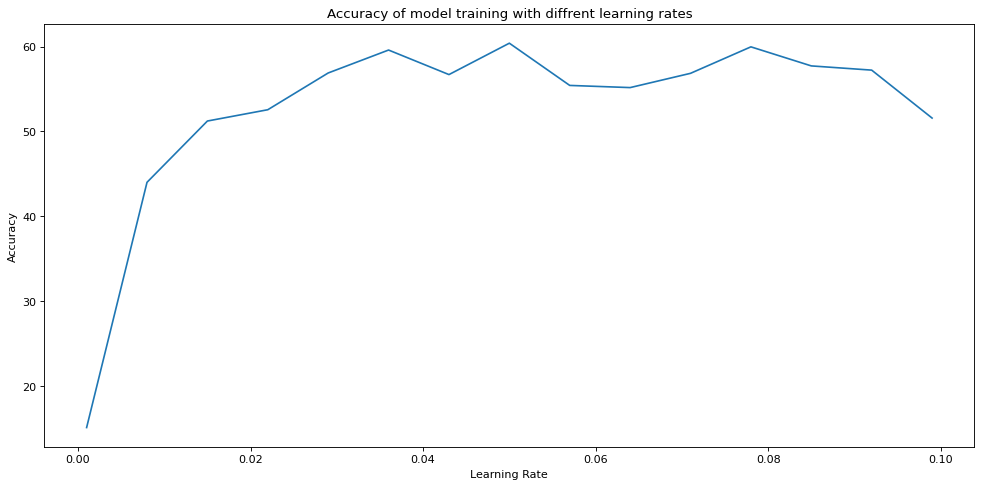

In [ ]:
import matplotlib.pyplot as plt
import numpy
rates = []
for i in numpy.arange(0.001, 0.1, 0.007):
  rates.append(i)
accuracies = [15.07605330461704, 44.00323058285099, 51.2316597119397, 52.56427513797281, 56.89864046305021, 59.6042536007538, 56.7101897967425, 60.411899313501145, 55.43141741822587, 55.17566294252255, 
               56.85825817741284,  59.981154933369226, 57.7332076995558, 57.23515951002827, 51.58163952079688]

plt.figure(num = None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(rates, accuracies)
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Accuracy of model training with diffrent learning rates")


In [ ]:
def neuralNetwork(learning_rate, datasetNormalized, numberOfDataInCategories, classes, trainLoaderNormalized, testLoaderNormalized, batchSize, changeBatchSize, epochSize, momentiumValue):
  if(changeBatchSize):
    trainLoaderNormalized, testLoaderNormalized = getTrainTest(len(datasetNormalized), numberOfDataInCategories, datasetNormalized, batchSize)
  class Model(nn.Module):
    def __init__(self, class_num, act=F.relu):
      super(Model, self).__init__()
 
 
      self.layer1 = nn.Linear(1 * 80 * 60, 8000)
      self.act1 = act
 
 
      self.layer2 = nn.Linear(8000, 5000)
      self.act2 = act
 
      self.layer3 = nn.Linear(5000, 2000)
      self.act3 = act
 
 
      self.layer4 = nn.Linear(2000, 200)
      self.act4 = act
 
      self.layer5 = nn.Linear(200, 20)
      self.act5 = act

      self.layer6 = nn.Linear(20, class_num)

    def forward(self, x):

        x = x.view(x.size(0), -1)

        x = self.layer1(x)
        x = self.act1(x)

        x = self.layer2(x)
        x = self.act2(x)

        x = self.layer3(x)
        x = self.act3(x)

        x = self.layer4(x)
        x = self.act4(x)

        x = self.layer5(x)
        x = self.act5(x)

        x = self.layer6(x)
        return x

  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = Model(len(classes))
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentiumValue)
  losses = fit(model, trainLoaderNormalized, device, criterion, optimizer, epochSize)
  print("Validation Accuracy:")
  test_model_accuracy(model, testLoaderNormalized)
  print("Train Accuracy: ")
  test_model_accuracy(model, trainLoaderNormalized)
  accTrain, accTest = getAccuracyOfClasses(model, testLoaderNormalized, trainLoaderNormalized, classes)
  plotLossesInEpochs(losses, epochSize)

epoch 1, train_loss: 3.286, time elapsed: 45.076697 seconds
epoch 2, train_loss: 2.491, time elapsed: 44.907794 seconds
epoch 3, train_loss: 2.064, time elapsed: 44.712791 seconds
epoch 4, train_loss: 1.834, time elapsed: 44.100886 seconds
epoch 5, train_loss: 1.672, time elapsed: 44.70779 seconds
epoch 6, train_loss: 1.542, time elapsed: 44.89342 seconds
epoch 7, train_loss: 1.421, time elapsed: 44.092392 seconds
epoch 8, train_loss: 1.373, time elapsed: 44.017627 seconds
epoch 9, train_loss: 1.283, time elapsed: 44.258713 seconds
epoch 10, train_loss: 1.238, time elapsed: 43.959817 seconds
total training time: 7.412 minutes
Validation Accuracy:
Accuracy: 57.63898236640194%
Train Accuracy: 
Accuracy: 59.55734406438632%
OUTPUT TESR: 
{0: 68.18181818181819, 1: 79.16666666666667, 2: 90.12345679012346, 3: 5.714285714285714, 4: 51.785714285714285, 5: 67.31107205623901, 6: 39.6551724137931, 7: 0.0, 8: 63.768115942028984, 9: 5.434782608695652, 10: 0.0, 11: 50.602409638554214, 12: 0.0, 13: 55

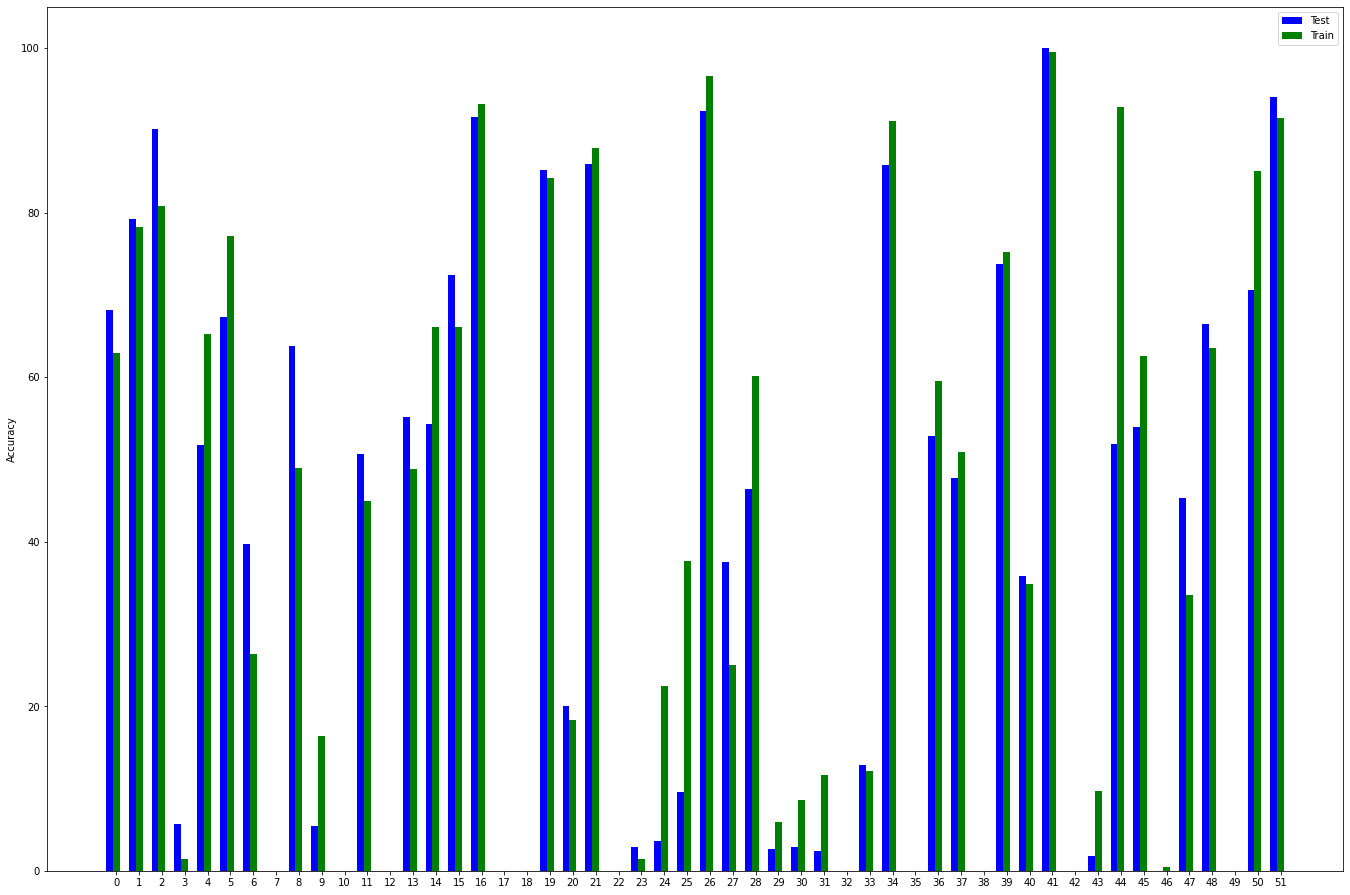

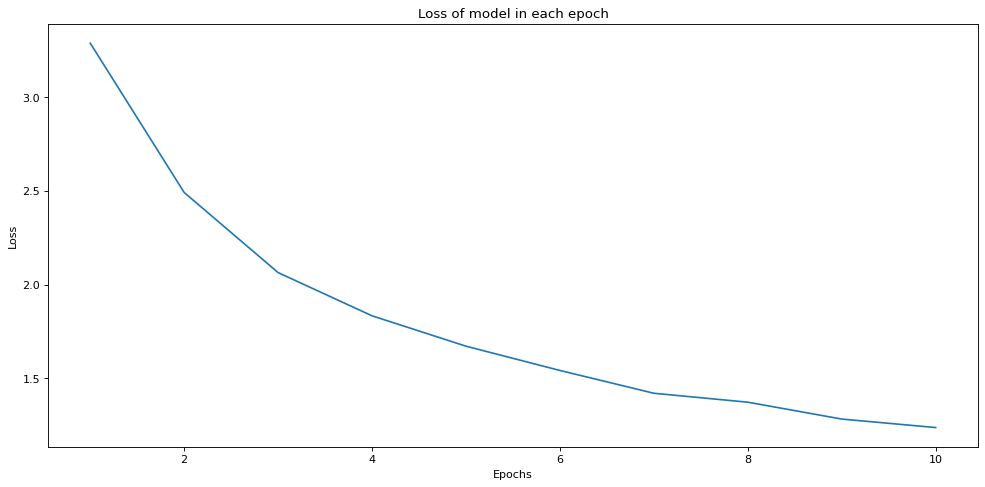

In [ ]:
neuralNetwork(0.05, datasetNormalized, numberOfDataInCategories, classes, trainLoaderNormalized, testLoaderNormalized, 64, False,  10, 0)

epoch 1, train_loss: 3.300, time elapsed: 44.059492 seconds
epoch 2, train_loss: 2.498, time elapsed: 43.883058 seconds
epoch 3, train_loss: 2.070, time elapsed: 43.402664 seconds
epoch 4, train_loss: 1.828, time elapsed: 44.247447 seconds
epoch 5, train_loss: 1.665, time elapsed: 44.301274 seconds
epoch 6, train_loss: 1.543, time elapsed: 44.241503 seconds
epoch 7, train_loss: 1.451, time elapsed: 44.123264 seconds
epoch 8, train_loss: 1.364, time elapsed: 44.209771 seconds
epoch 9, train_loss: 1.314, time elapsed: 44.156005 seconds
epoch 10, train_loss: 1.255, time elapsed: 44.071673 seconds
total training time: 7.345 minutes
Validation Accuracy:
Accuracy: 57.27554179566563%
Train Accuracy: 
Accuracy: 57.411133467471494%
OUTPUT TESR: 
{0: 36.36363636363637, 1: 84.72222222222223, 2: 92.5925925925926, 3: 0.0, 4: 50.0, 5: 45.69420035149385, 6: 48.275862068965516, 7: 28.571428571428573, 8: 68.1159420289855, 9: 7.608695652173913, 10: 0.0, 11: 65.06024096385542, 12: 0.0, 13: 45.90163934426

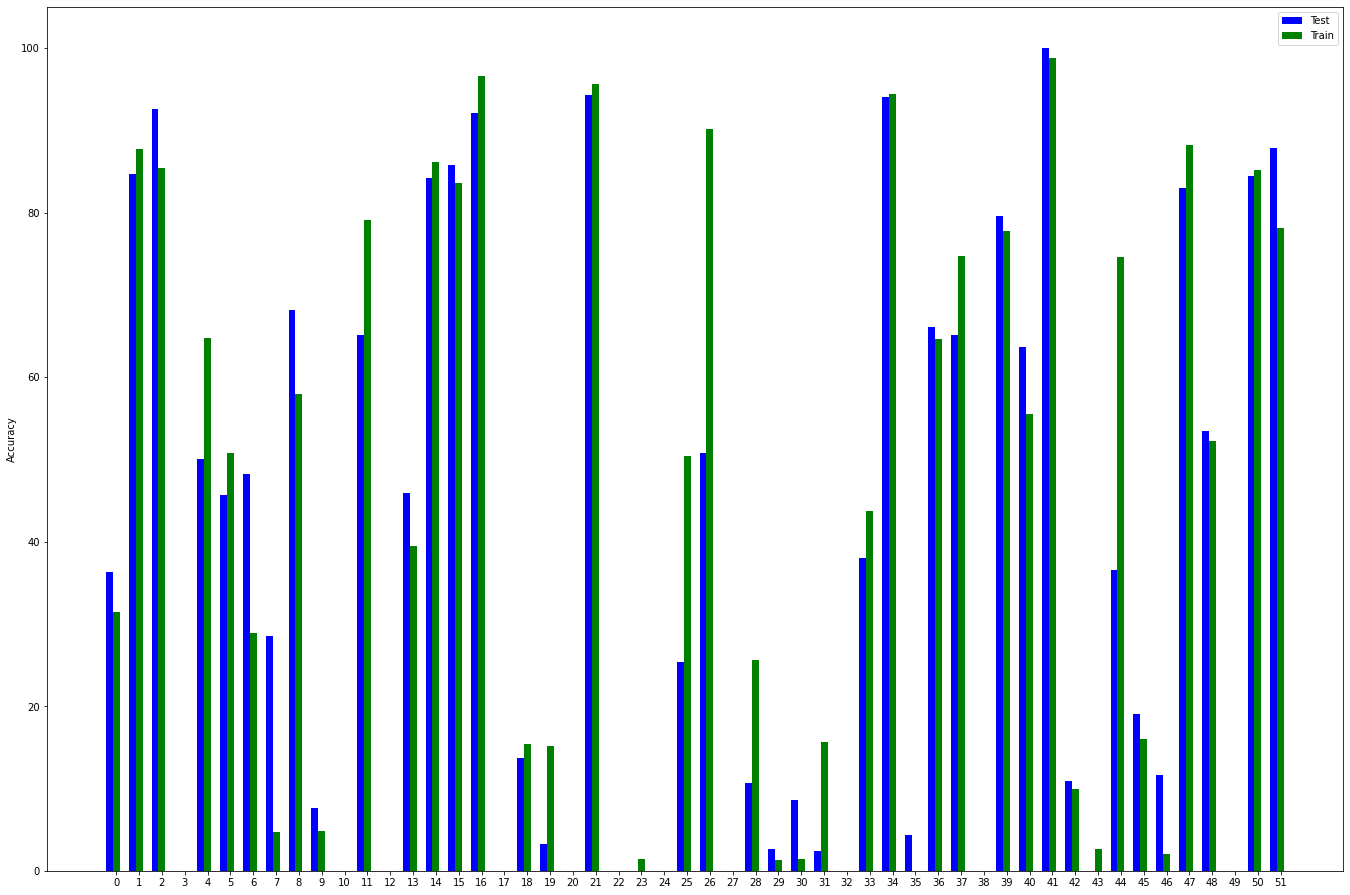

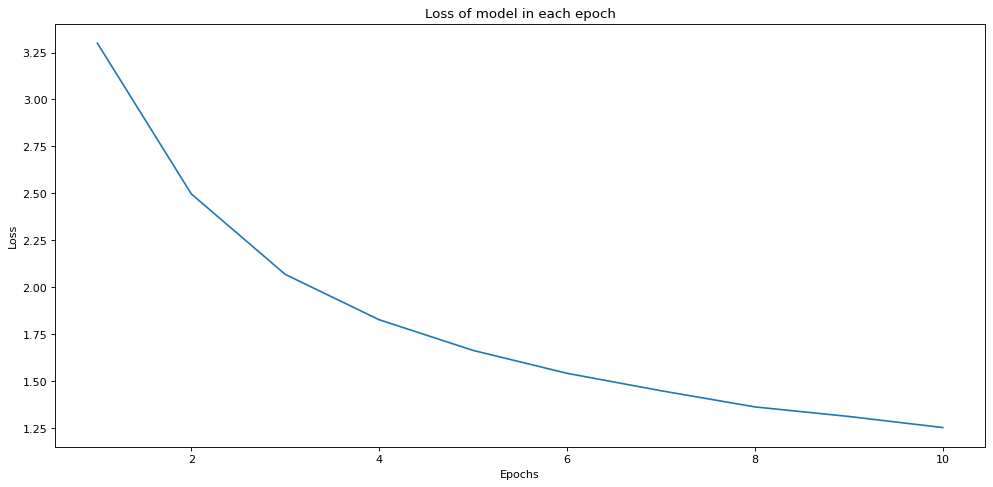

In [ ]:
neuralNetwork(0.04, datasetNormalized, numberOfDataInCategories, classes, trainLoaderNormalized, testLoaderNormalized, 64, False, 10, 0)

epoch 1, train_loss: 3.222, time elapsed: 43.980583 seconds
epoch 2, train_loss: 2.432, time elapsed: 44.200782 seconds
epoch 3, train_loss: 2.102, time elapsed: 44.621447 seconds
epoch 4, train_loss: 1.920, time elapsed: 43.910831 seconds
epoch 5, train_loss: 1.698, time elapsed: 44.29507 seconds
epoch 6, train_loss: 1.560, time elapsed: 43.737751 seconds
epoch 7, train_loss: 1.465, time elapsed: 43.796632 seconds
epoch 8, train_loss: 1.418, time elapsed: 43.772904 seconds
epoch 9, train_loss: 1.353, time elapsed: 44.124688 seconds
epoch 10, train_loss: 1.282, time elapsed: 44.357068 seconds
total training time: 7.347 minutes
Validation Accuracy:
Accuracy: 47.98761609907121%
Train Accuracy: 
Accuracy: 50.35546613011402%
OUTPUT TESR: 
{0: 86.36363636363636, 1: 50.69444444444444, 2: 96.91358024691358, 3: 0.0, 4: 25.0, 5: 68.0140597539543, 6: 0.0, 7: 0.0, 8: 62.31884057971015, 9: 9.782608695652174, 10: 0.0, 11: 77.10843373493977, 12: 0.0, 13: 74.86338797814207, 14: 2.3622047244094486, 15

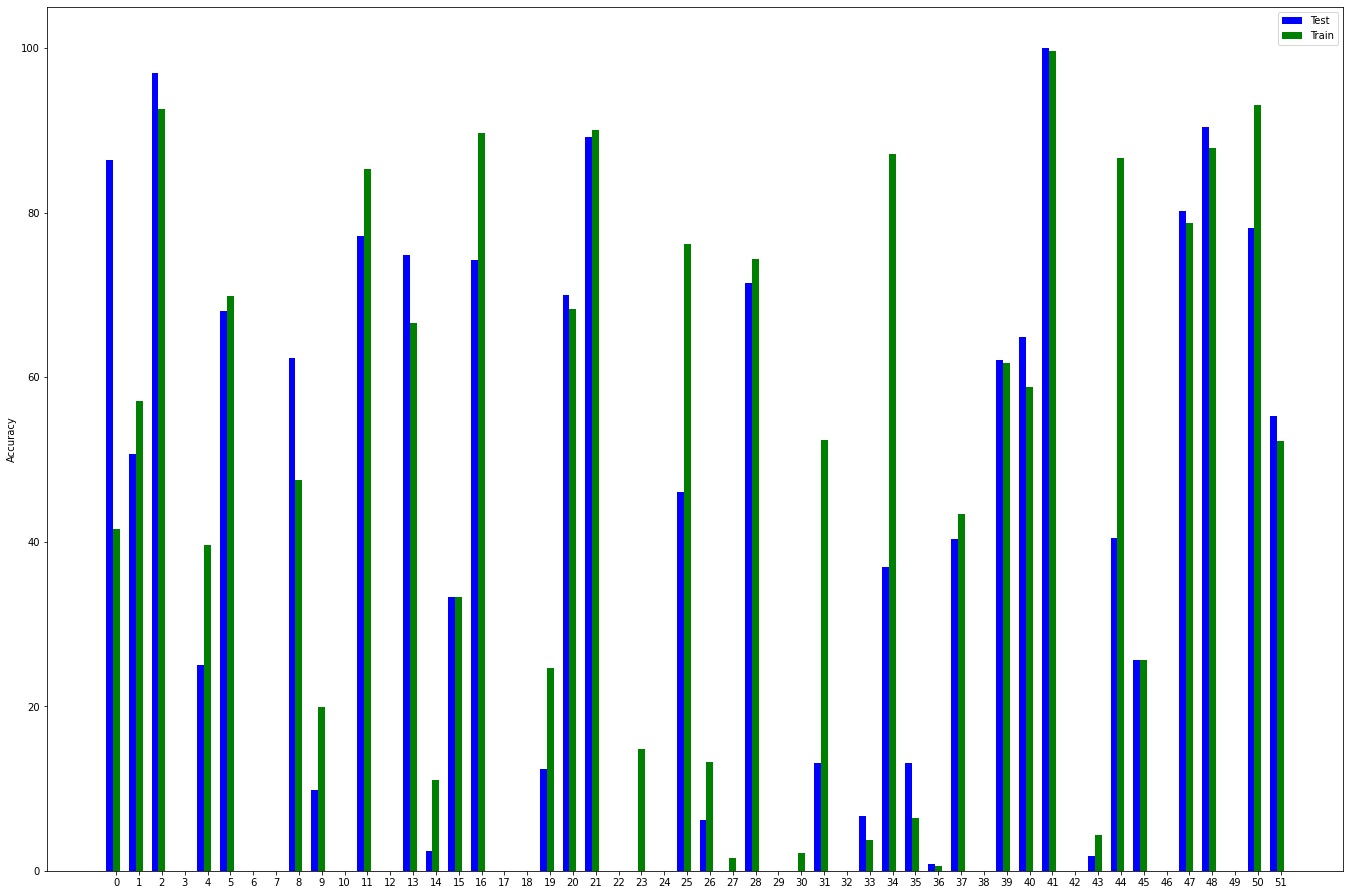

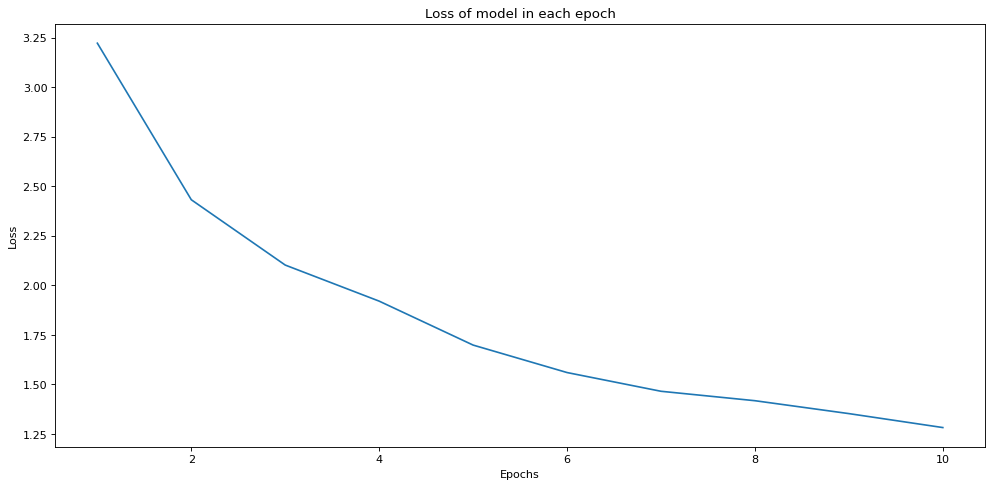

In [ ]:
neuralNetwork(0.1, datasetNormalized, numberOfDataInCategories, classes, trainLoaderNormalized, testLoaderNormalized, 64, False,  10, 0)

epoch 1, train_loss: 3.939, time elapsed: 44.226919 seconds
epoch 2, train_loss: 3.925, time elapsed: 43.624755 seconds
epoch 3, train_loss: 3.912, time elapsed: 44.444215 seconds
epoch 4, train_loss: 3.899, time elapsed: 44.612538 seconds
epoch 5, train_loss: 3.886, time elapsed: 43.751132 seconds
epoch 6, train_loss: 3.871, time elapsed: 43.679066 seconds
epoch 7, train_loss: 3.852, time elapsed: 43.536699 seconds
epoch 8, train_loss: 3.822, time elapsed: 43.673984 seconds
epoch 9, train_loss: 3.772, time elapsed: 44.170392 seconds
epoch 10, train_loss: 3.705, time elapsed: 43.201122 seconds
total training time: 7.315 minutes
Validation Accuracy:
Accuracy: 9.503297886660384%
Train Accuracy: 
Accuracy: 9.48356807511737%
OUTPUT TESR: 
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29:

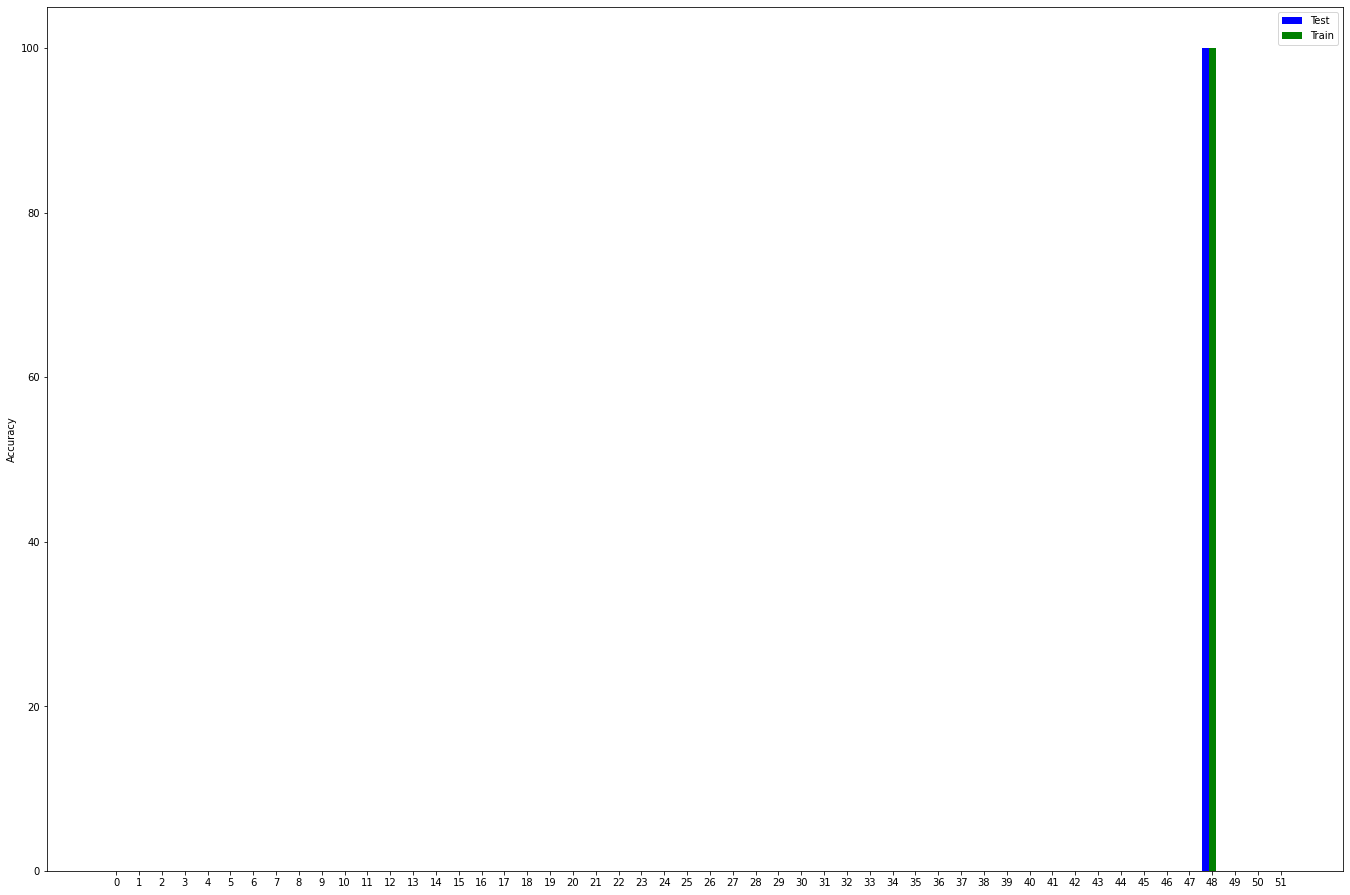

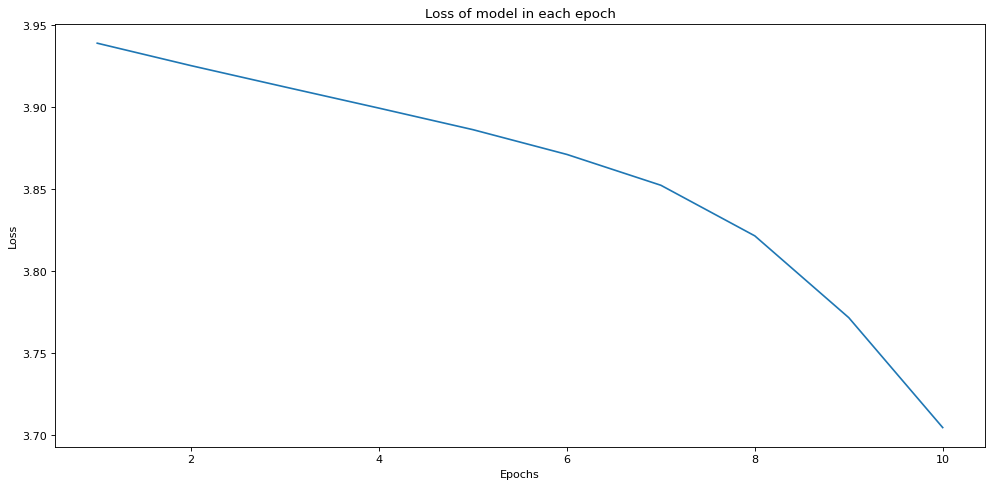

In [ ]:
neuralNetwork(0.001, datasetNormalized, numberOfDataInCategories, classes, trainLoaderNormalized, testLoaderNormalized, 64, False,  10, 0)



---



---


7.

epoch 1, train_loss: 2.973, time elapsed: 48.492931 seconds
epoch 2, train_loss: 2.195, time elapsed: 48.467854 seconds
epoch 3, train_loss: 1.824, time elapsed: 48.438815 seconds
epoch 4, train_loss: 1.604, time elapsed: 48.26996 seconds
epoch 5, train_loss: 1.464, time elapsed: 48.502019 seconds
epoch 6, train_loss: 1.353, time elapsed: 47.750321 seconds
epoch 7, train_loss: 1.259, time elapsed: 47.965047 seconds
epoch 8, train_loss: 1.196, time elapsed: 48.284255 seconds
epoch 9, train_loss: 1.125, time elapsed: 48.034925 seconds
epoch 10, train_loss: 1.082, time elapsed: 47.846962 seconds
total training time: 8.034 minutes
Validation Accuracy:
Accuracy: 62.081033786512315%
Train Accuracy: 
Accuracy: 66.78068410462777%
OUTPUT TESR: 
{0: 100.0, 1: 88.88888888888889, 2: 98.14814814814815, 3: 25.714285714285715, 4: 66.07142857142857, 5: 26.537785588752197, 6: 43.10344827586207, 7: 4.761904761904762, 8: 84.05797101449275, 9: 14.130434782608695, 10: 13.043478260869565, 11: 66.26506024096

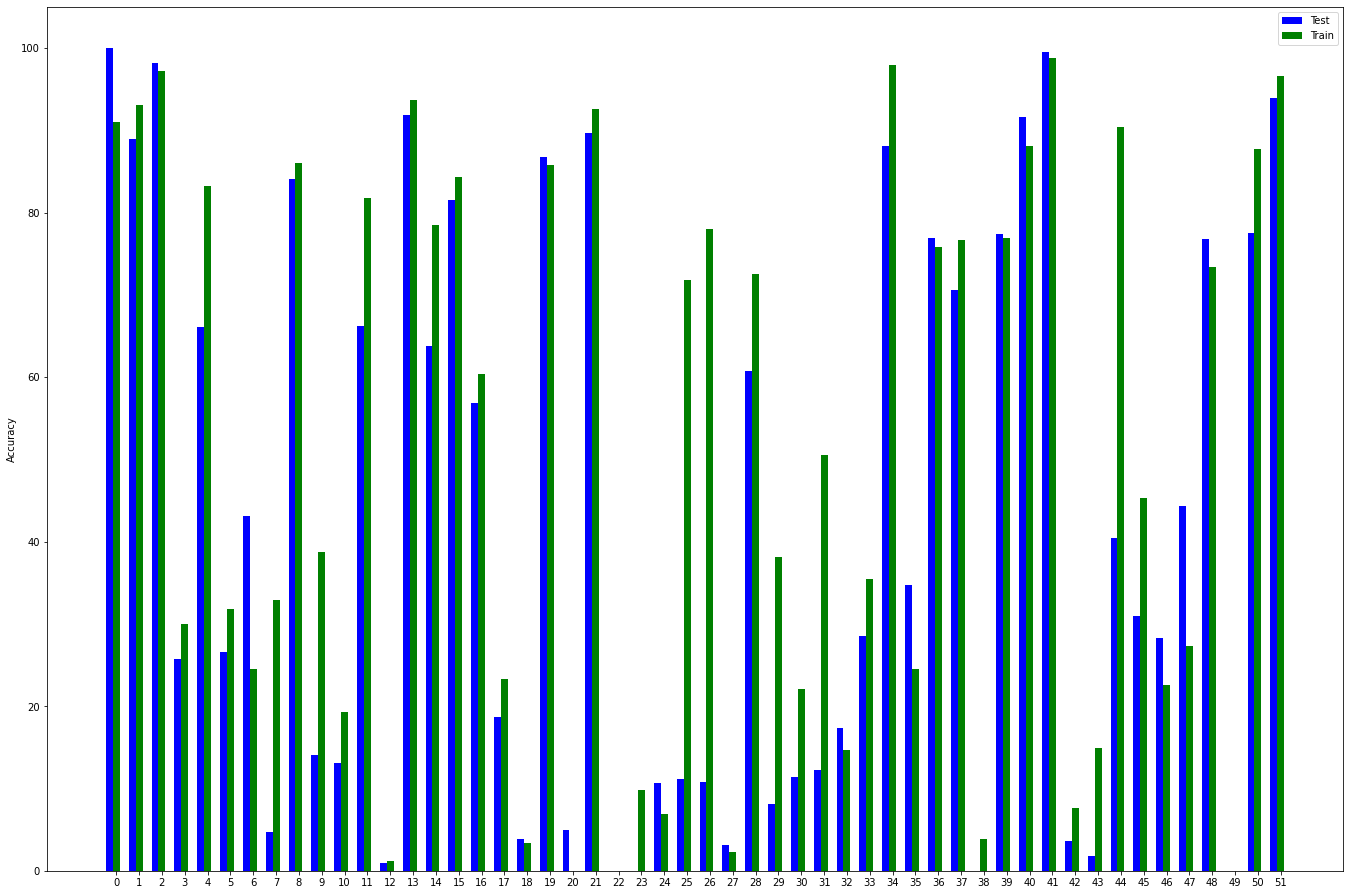

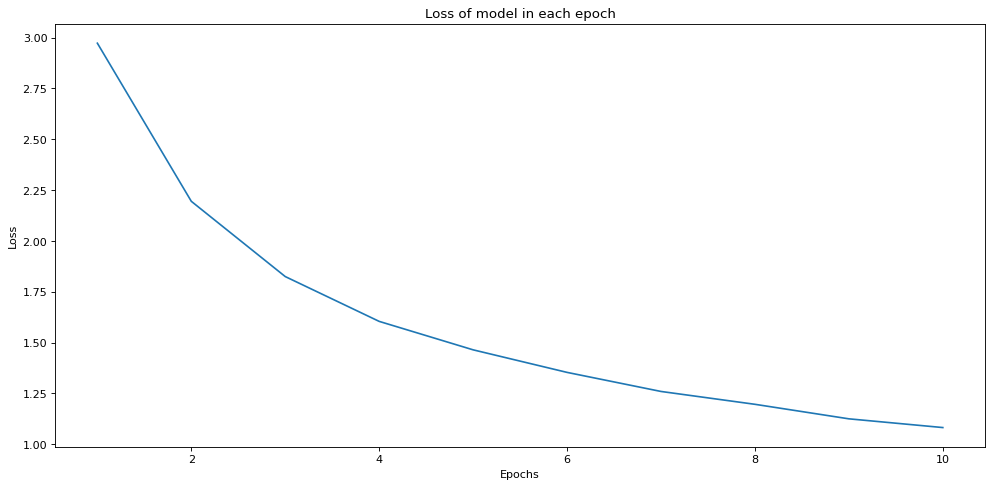

In [ ]:
neuralNetwork(0.05, datasetNormalized, numberOfDataInCategories, classes, trainLoaderNormalized, testLoaderNormalized, 32, True, 10, 0)

epoch 1, train_loss: 3.467, time elapsed: 42.867735 seconds
epoch 2, train_loss: 2.897, time elapsed: 42.268384 seconds
epoch 3, train_loss: 2.521, time elapsed: 41.793917 seconds
epoch 4, train_loss: 2.237, time elapsed: 42.090418 seconds
epoch 5, train_loss: 2.015, time elapsed: 42.600297 seconds
epoch 6, train_loss: 1.903, time elapsed: 42.004613 seconds
epoch 7, train_loss: 1.731, time elapsed: 42.323 seconds
epoch 8, train_loss: 1.645, time elapsed: 41.965922 seconds
epoch 9, train_loss: 1.584, time elapsed: 42.401239 seconds
epoch 10, train_loss: 1.492, time elapsed: 42.623301 seconds
total training time: 7.049 minutes
Validation Accuracy:
Accuracy: 46.426167721093016%
Train Accuracy: 
Accuracy: 47.88732394366197%
OUTPUT TESR: 
{0: 0.0, 1: 84.02777777777777, 2: 85.80246913580247, 3: 0.0, 4: 21.428571428571427, 5: 76.27416520210896, 6: 48.275862068965516, 7: 0.0, 8: 72.46376811594203, 9: 0.0, 10: 0.0, 11: 2.4096385542168677, 12: 0.0, 13: 6.0109289617486334, 14: 33.07086614173228, 

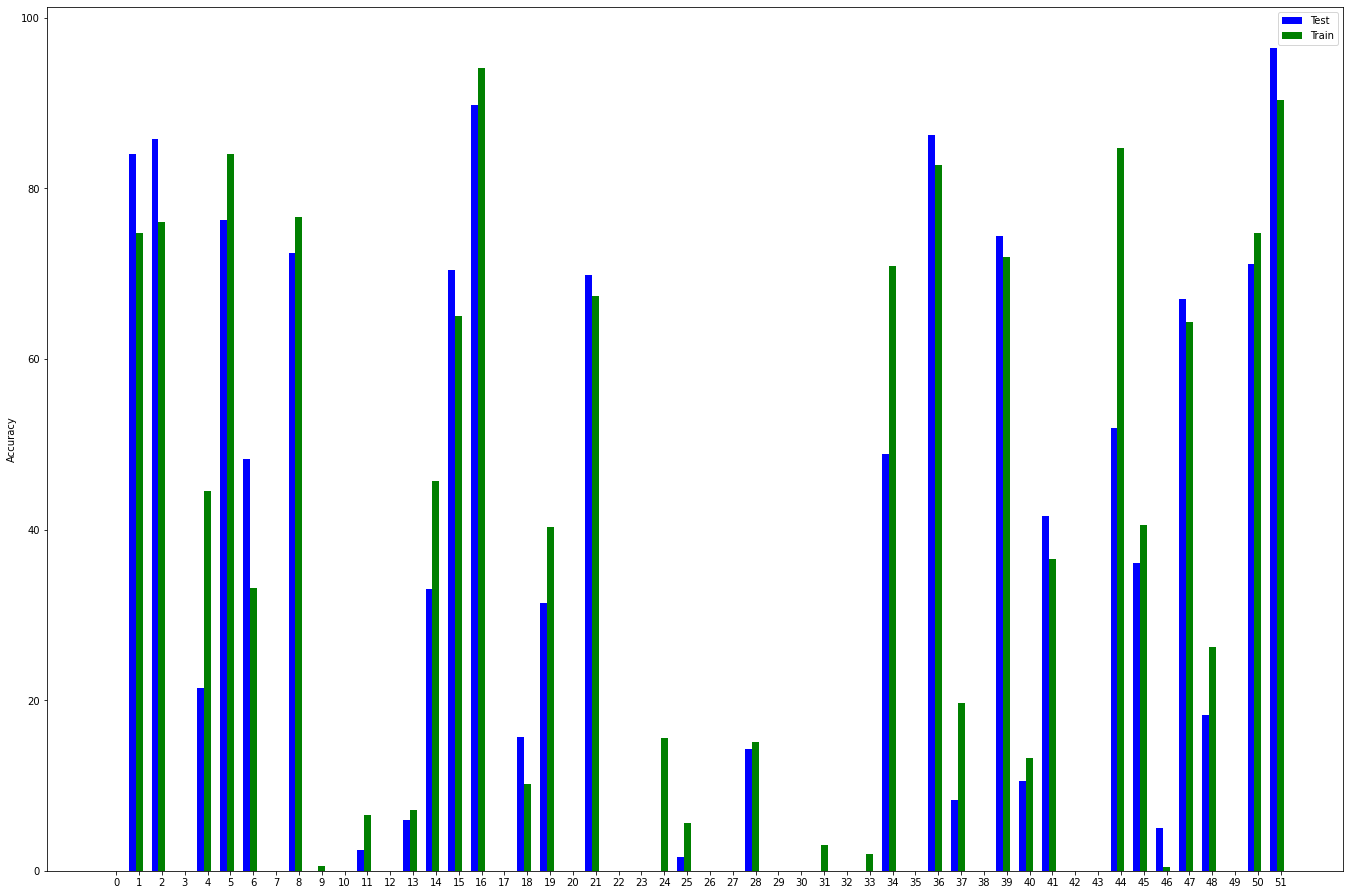

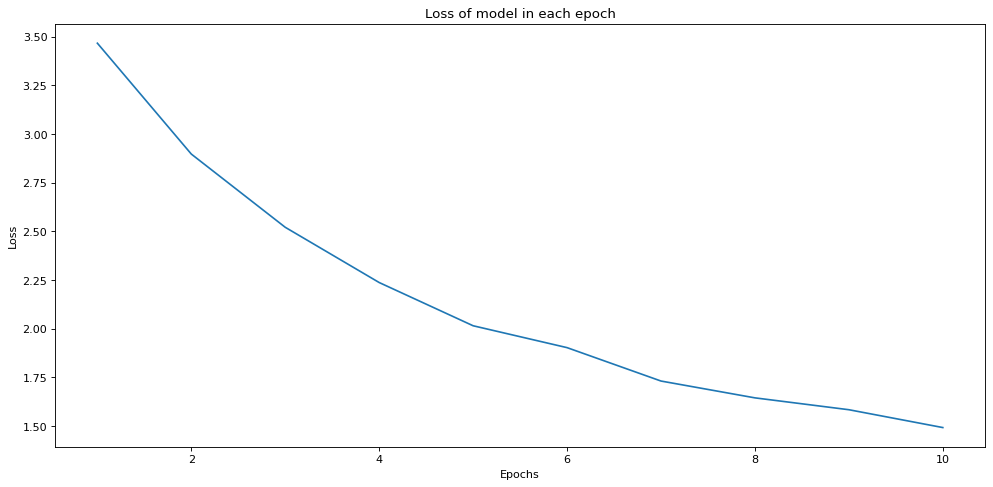

In [ ]:
neuralNetwork(0.05, datasetNormalized, numberOfDataInCategories, classes, trainLoaderNormalized, testLoaderNormalized, 128, True, 10, 0)

epoch 1, train_loss: 3.891, time elapsed: 42.42315 seconds
epoch 2, train_loss: 3.547, time elapsed: 42.460086 seconds
epoch 3, train_loss: 3.454, time elapsed: 42.858058 seconds
epoch 4, train_loss: 3.406, time elapsed: 42.443704 seconds
epoch 5, train_loss: 3.258, time elapsed: 42.717171 seconds
epoch 6, train_loss: 3.027, time elapsed: 43.167143 seconds
epoch 7, train_loss: 2.802, time elapsed: 42.974774 seconds
epoch 8, train_loss: 2.615, time elapsed: 42.449999 seconds
epoch 9, train_loss: 2.464, time elapsed: 42.518261 seconds
epoch 10, train_loss: 2.341, time elapsed: 43.044875 seconds
total training time: 7.118 minutes
Validation Accuracy:
Accuracy: 24.754341095706017%
Train Accuracy: 
Accuracy: 23.62843729040912%
OUTPUT TESR: 
{0: 0.0, 1: 19.444444444444443, 2: 3.0864197530864197, 3: 0.0, 4: 0.0, 5: 20.91388400702988, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 99.14529914529915, 16: 46.96969696969697, 17: 0.0, 18: 0.0, 19: 73.5537190082644

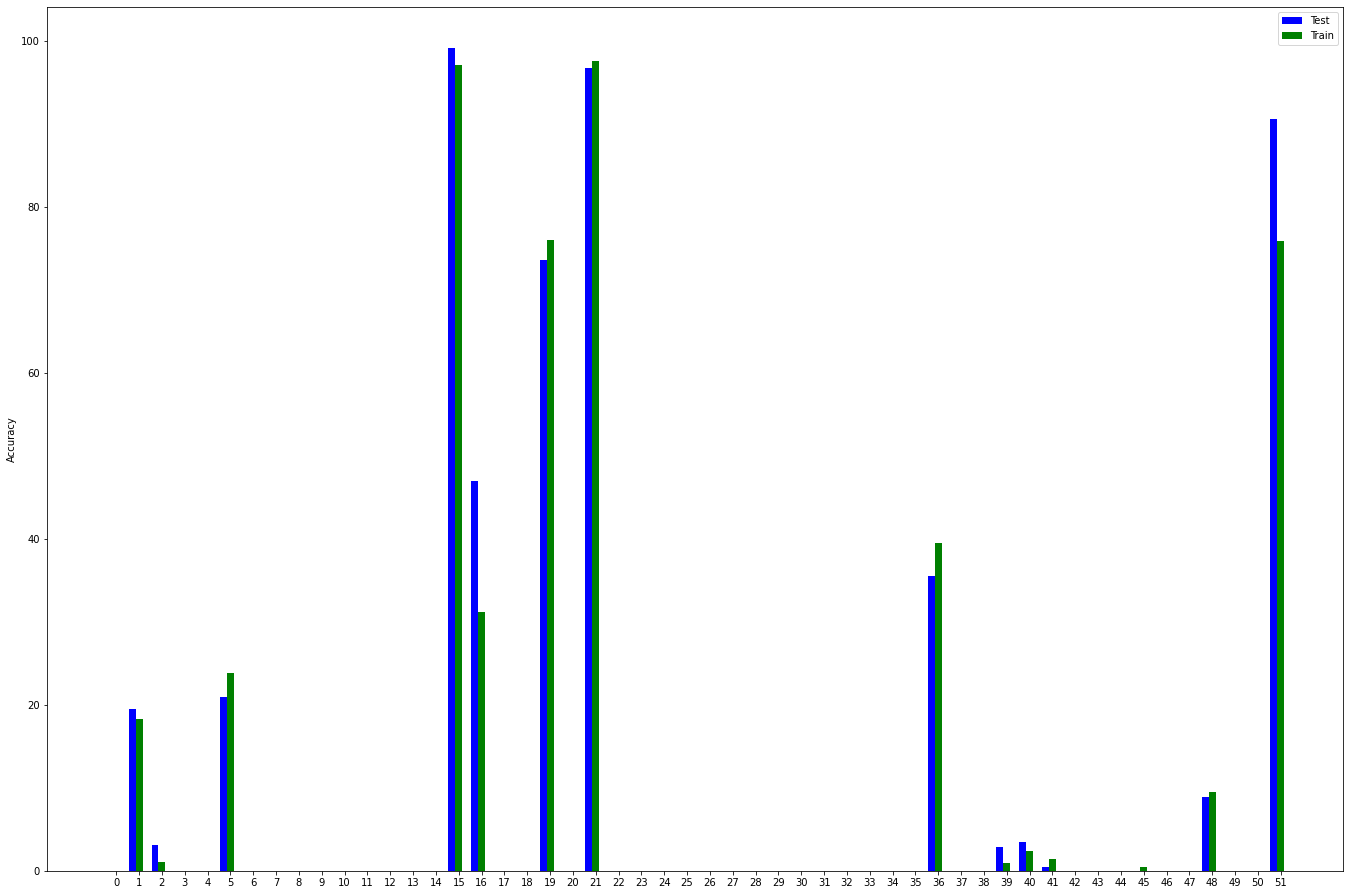

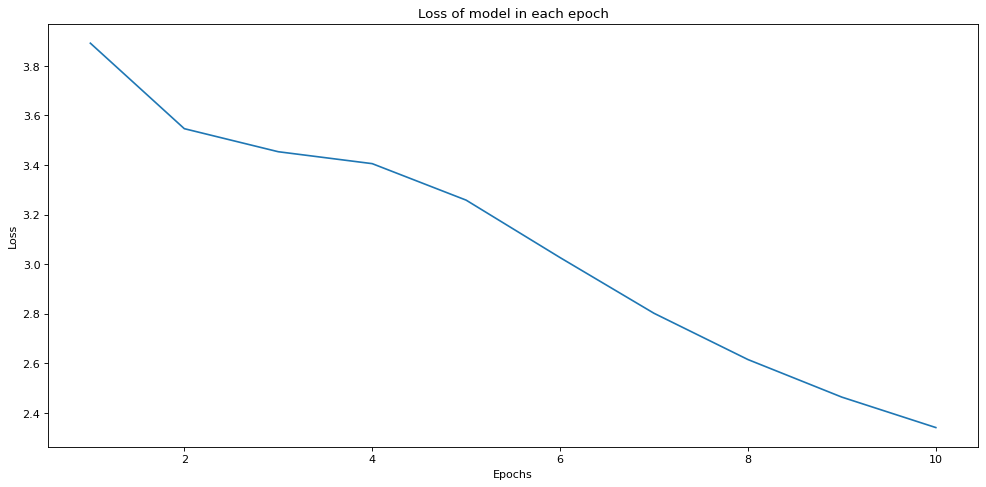

In [ ]:
neuralNetwork(0.01, datasetNormalized, numberOfDataInCategories, classes, trainLoaderNormalized, testLoaderNormalized, 128, True, 10, 0)

epoch 1, train_loss: 3.295, time elapsed: 42.912082 seconds
epoch 2, train_loss: 2.701, time elapsed: 42.729195 seconds
epoch 3, train_loss: 2.585, time elapsed: 42.474353 seconds
epoch 4, train_loss: 2.562, time elapsed: 42.266833 seconds
epoch 5, train_loss: 2.413, time elapsed: 42.621455 seconds
epoch 6, train_loss: 2.090, time elapsed: 41.929838 seconds
epoch 7, train_loss: 1.923, time elapsed: 42.990997 seconds
epoch 8, train_loss: 1.767, time elapsed: 42.705854 seconds
epoch 9, train_loss: 1.745, time elapsed: 42.27838 seconds
epoch 10, train_loss: 1.581, time elapsed: 42.260809 seconds
total training time: 7.086 minutes
Validation Accuracy:
Accuracy: 51.056669807511106%
Train Accuracy: 
Accuracy: 52.83031522468142%
OUTPUT TESR: 
{0: 95.45454545454545, 1: 88.88888888888889, 2: 95.67901234567901, 3: 0.0, 4: 8.928571428571429, 5: 68.36555360281196, 6: 0.0, 7: 0.0, 8: 52.17391304347826, 9: 0.0, 10: 0.0, 11: 48.19277108433735, 12: 0.0, 13: 49.72677595628415, 14: 2.3622047244094486, 1

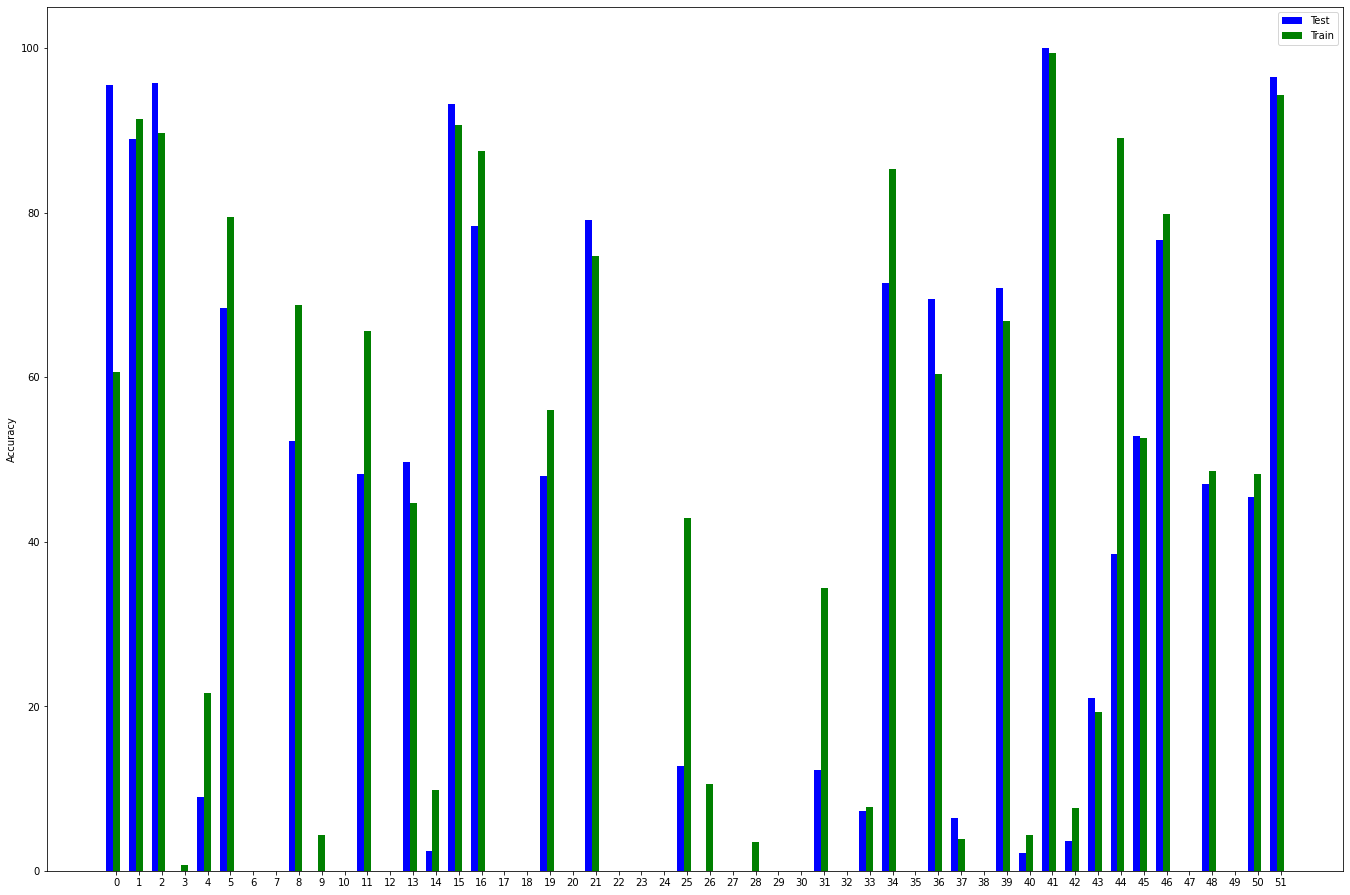

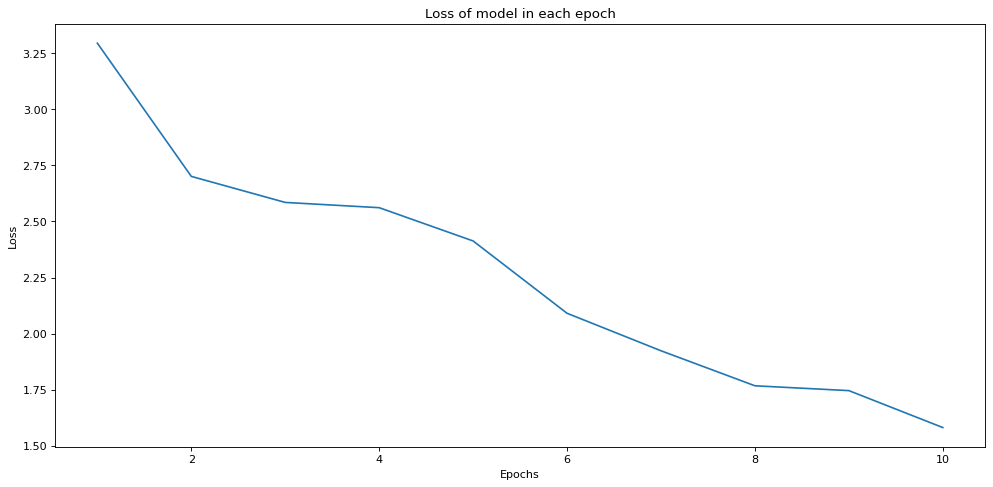

In [ ]:
neuralNetwork(0.1, datasetNormalized, numberOfDataInCategories, classes, trainLoaderNormalized, testLoaderNormalized, 128, True, 10, 0)



---



---


8.



epoch 1, train_loss: 2.935, time elapsed: 46.121813 seconds
epoch 2, train_loss: 2.138, time elapsed: 44.876972 seconds
epoch 3, train_loss: 1.729, time elapsed: 45.457286 seconds
epoch 4, train_loss: 1.562, time elapsed: 45.851187 seconds
epoch 5, train_loss: 1.448, time elapsed: 46.09954 seconds
epoch 6, train_loss: 1.387, time elapsed: 44.854157 seconds
epoch 7, train_loss: 1.281, time elapsed: 45.685485 seconds
epoch 8, train_loss: 1.203, time elapsed: 45.641504 seconds
epoch 9, train_loss: 1.150, time elapsed: 45.930159 seconds
epoch 10, train_loss: 1.094, time elapsed: 47.220894 seconds
total training time: 7.629 minutes
Validation Accuracy:
Accuracy: 61.959886929600216%
Train Accuracy: 
Accuracy: 64.16163648558015%
OUTPUT TESR: 
{0: 100.0, 1: 77.08333333333333, 2: 82.71604938271605, 3: 14.285714285714286, 4: 58.92857142857143, 5: 48.154657293497365, 6: 86.20689655172414, 7: 28.571428571428573, 8: 75.3623188405797, 9: 15.217391304347826, 10: 0.0, 11: 79.51807228915662, 12: 0.0, 1

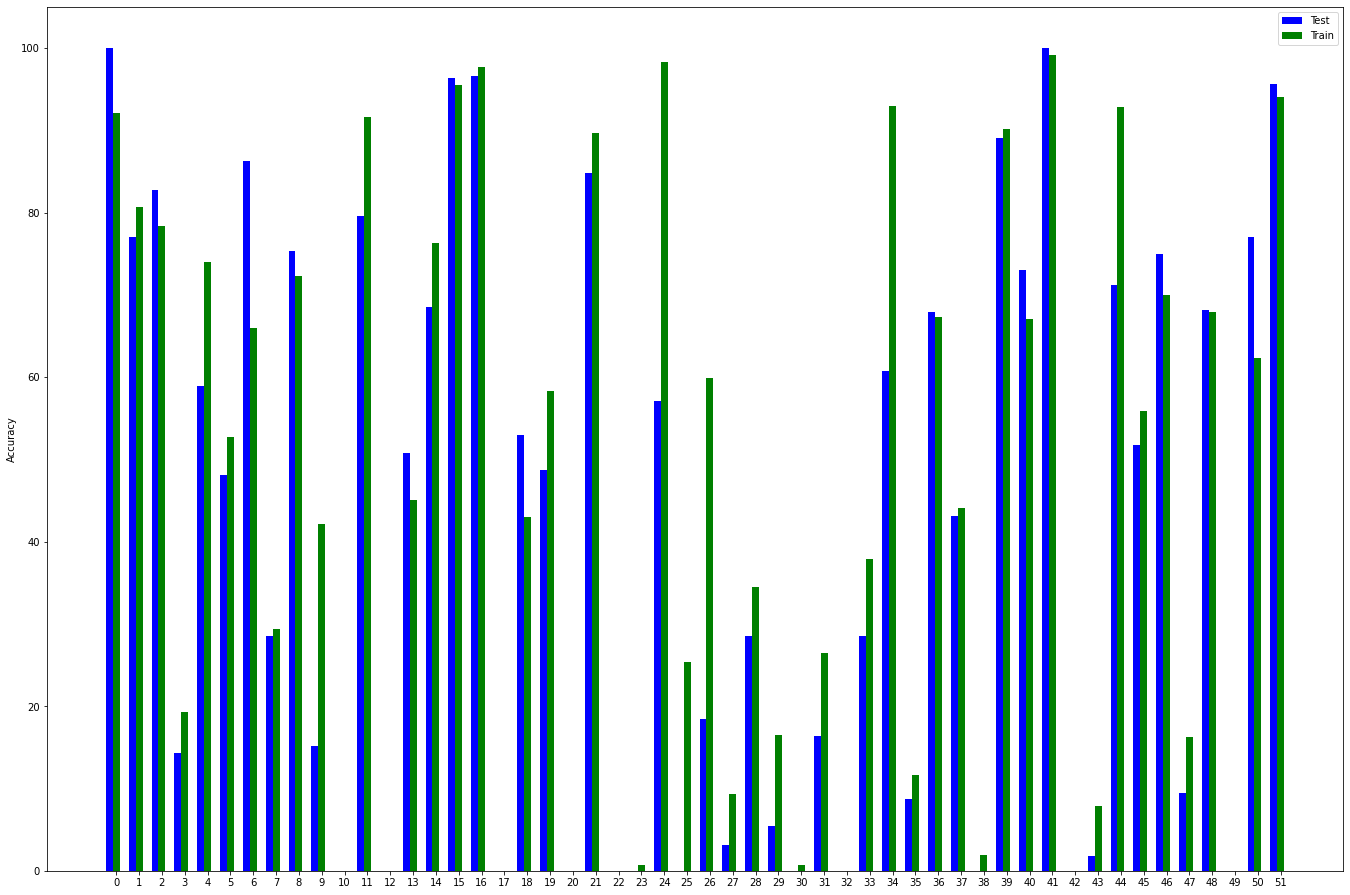

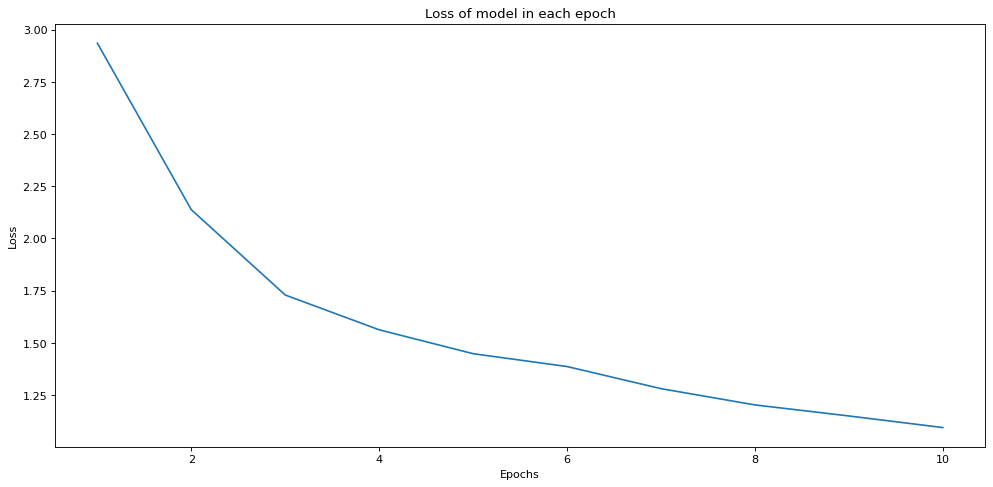

In [ ]:
neuralNetwork(0.05, datasetNormalized, numberOfDataInCategories, classes, trainLoaderNormalized, testLoaderNormalized, 64, True, 10, 0.5)

epoch 1, train_loss: 2.843, time elapsed: 45.288901 seconds
epoch 2, train_loss: 2.293, time elapsed: 45.745296 seconds
epoch 3, train_loss: 2.249, time elapsed: 45.995685 seconds
epoch 4, train_loss: 2.247, time elapsed: 45.833588 seconds
epoch 5, train_loss: 2.195, time elapsed: 45.535446 seconds
epoch 6, train_loss: 2.098, time elapsed: 45.771573 seconds
epoch 7, train_loss: 2.001, time elapsed: 45.487166 seconds
epoch 8, train_loss: 1.937, time elapsed: 45.599275 seconds
epoch 9, train_loss: 1.910, time elapsed: 45.589071 seconds
epoch 10, train_loss: 1.915, time elapsed: 46.058358 seconds
total training time: 7.615 minutes
Validation Accuracy:
Accuracy: 36.51904697805896%
Train Accuracy: 
Accuracy: 37.6391683433937%
OUTPUT TESR: 
{0: 0.0, 1: 44.44444444444444, 2: 98.14814814814815, 3: 0.0, 4: 0.0, 5: 77.15289982425307, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 33.734939759036145, 12: 0.0, 13: 0.0, 14: 0.0, 15: 98.57549857549857, 16: 59.84848484848485, 17: 0.0, 18: 0.0, 19: 92.5

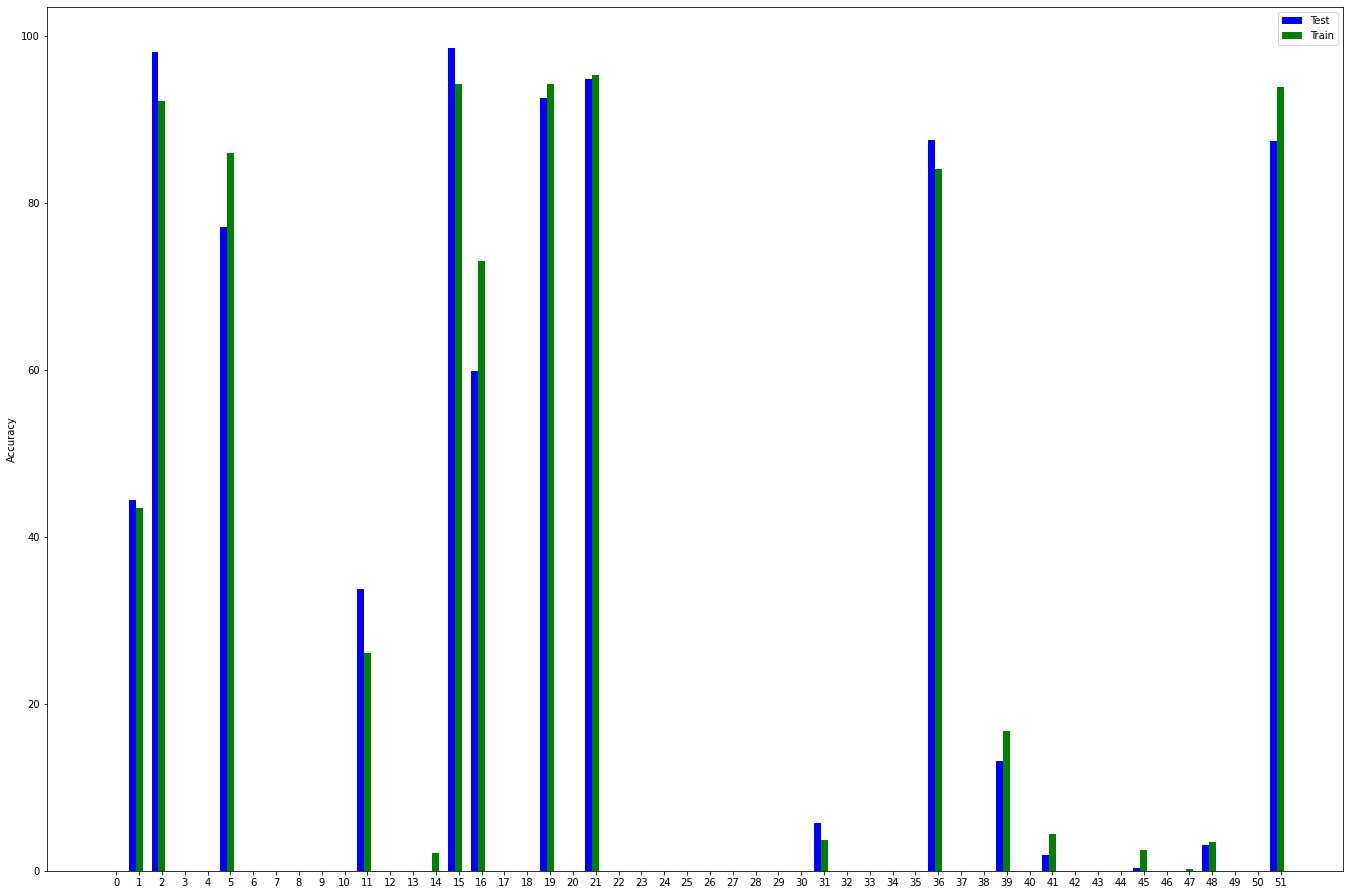

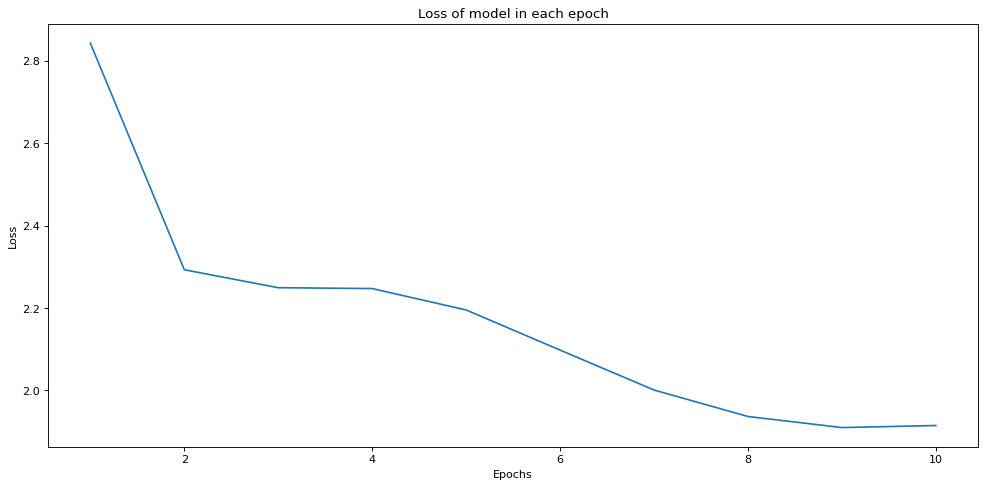

In [ ]:
neuralNetwork(0.05, datasetNormalized, numberOfDataInCategories, classes, trainLoaderNormalized, testLoaderNormalized, 64, True, 10, 0.9)

epoch 1, train_loss: 3.483, time elapsed: 45.851935 seconds
epoch 2, train_loss: 3.458, time elapsed: 45.447143 seconds
epoch 3, train_loss: 3.460, time elapsed: 46.094587 seconds
epoch 4, train_loss: 3.459, time elapsed: 45.814398 seconds
epoch 5, train_loss: 3.461, time elapsed: 45.305112 seconds
epoch 6, train_loss: 3.461, time elapsed: 46.111622 seconds
epoch 7, train_loss: 3.459, time elapsed: 46.129767 seconds
epoch 8, train_loss: 3.460, time elapsed: 46.02223 seconds
epoch 9, train_loss: 3.462, time elapsed: 45.647445 seconds
epoch 10, train_loss: 3.459, time elapsed: 46.012359 seconds
total training time: 7.641 minutes
Validation Accuracy:
Accuracy: 9.503297886660384%
Train Accuracy: 
Accuracy: 9.48356807511737%
OUTPUT TESR: 
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 

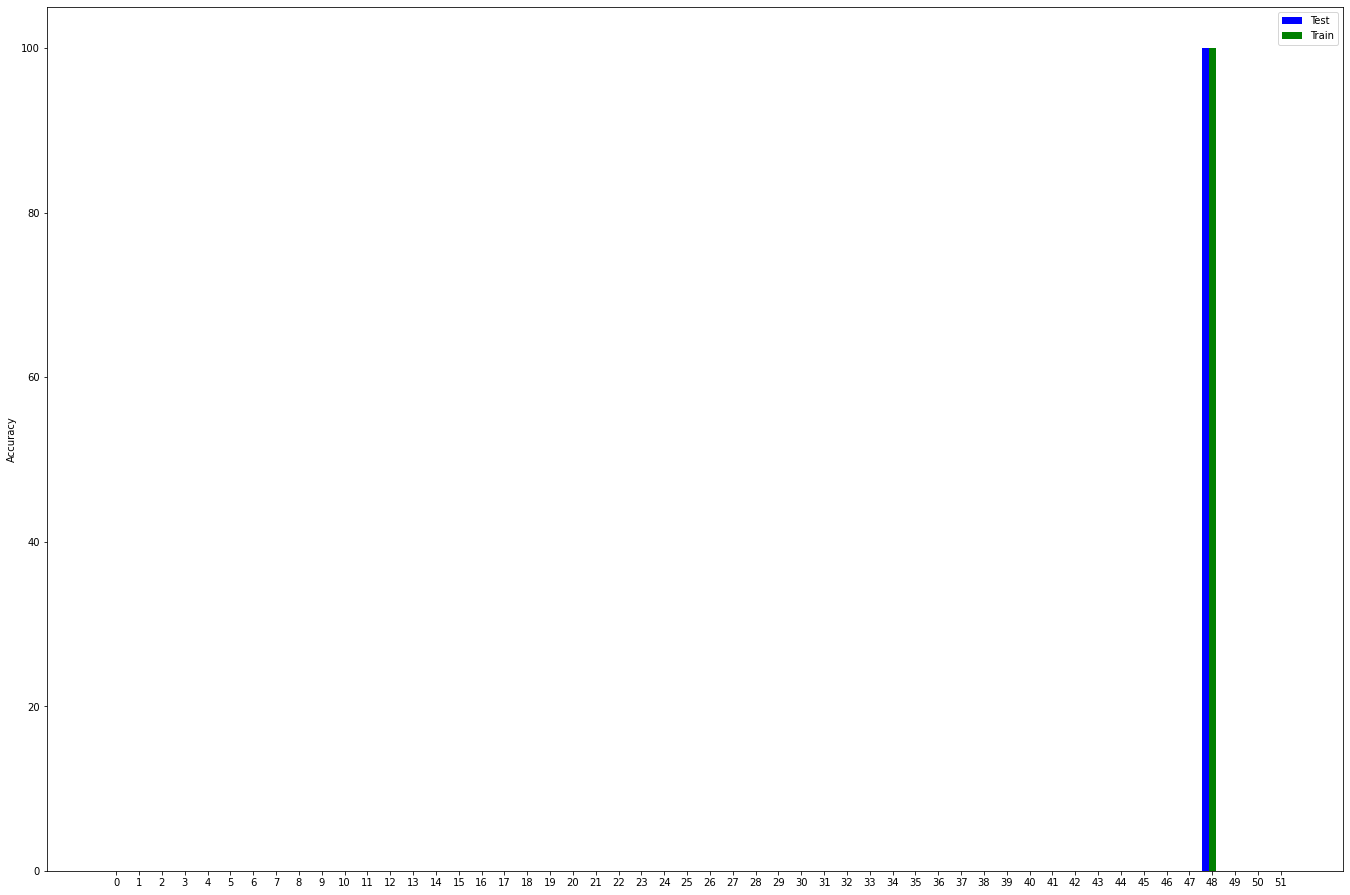

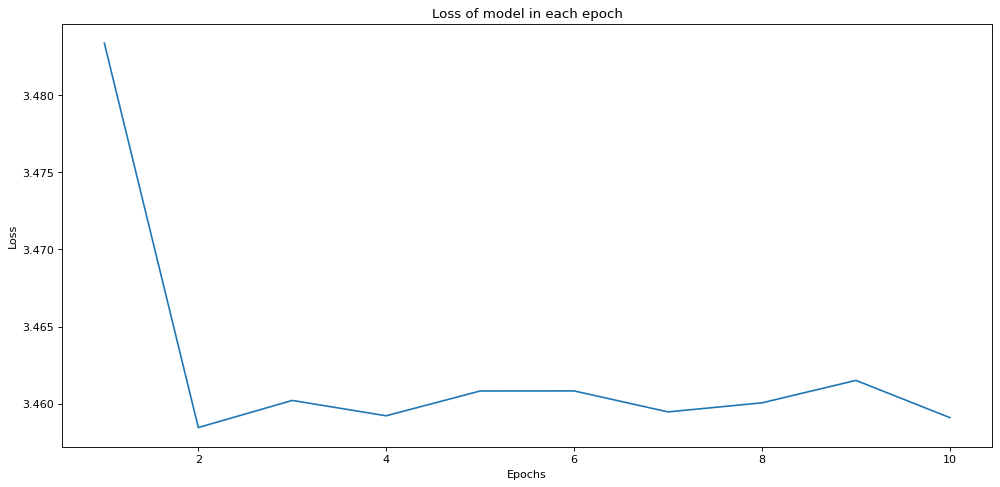

In [ ]:
neuralNetwork(0.05, datasetNormalized, numberOfDataInCategories, classes, trainLoaderNormalized, testLoaderNormalized, 64, True, 10, 0.98)

In [ ]:
accuracies = []
for i in numpy.arange(0, 0.9, 0.1):
  print("Momentum = ", i)
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = Model2(len(classes))
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=i)
  fit(model, trainLoaderNormalized, device, criterion, optimizer)
  accuracies.append(test_model_accuracy(model, testLoaderNormalized))
  print("Next::::::::::::::::::::::::::::;")


Momentum =  0.0
epoch 1, train_loss: 3.128, time elapsed: 43.001995 seconds
epoch 2, train_loss: 2.376, time elapsed: 43.110816 seconds
epoch 3, train_loss: 2.050, time elapsed: 43.757005 seconds
epoch 4, train_loss: 1.820, time elapsed: 42.877239 seconds
epoch 5, train_loss: 1.648, time elapsed: 42.874581 seconds
epoch 6, train_loss: 1.539, time elapsed: 43.636674 seconds
epoch 7, train_loss: 1.430, time elapsed: 42.568731 seconds
epoch 8, train_loss: 1.353, time elapsed: 43.466057 seconds
epoch 9, train_loss: 1.306, time elapsed: 44.085941 seconds
epoch 10, train_loss: 1.250, time elapsed: 43.274735 seconds
total training time: 7.211 minutes
Accuracy: 59.92731188585274%
Next::::::::::::::::::::::::::::;
Momentum =  0.1
epoch 1, train_loss: 3.277, time elapsed: 45.032631 seconds
epoch 2, train_loss: 2.389, time elapsed: 44.532336 seconds
epoch 3, train_loss: 1.997, time elapsed: 44.5213 seconds
epoch 4, train_loss: 1.824, time elapsed: 45.159029 seconds
epoch 5, train_loss: 1.645, tim

Text(0.5, 1.0, 'Accuracy of model training with diffrent momentums')

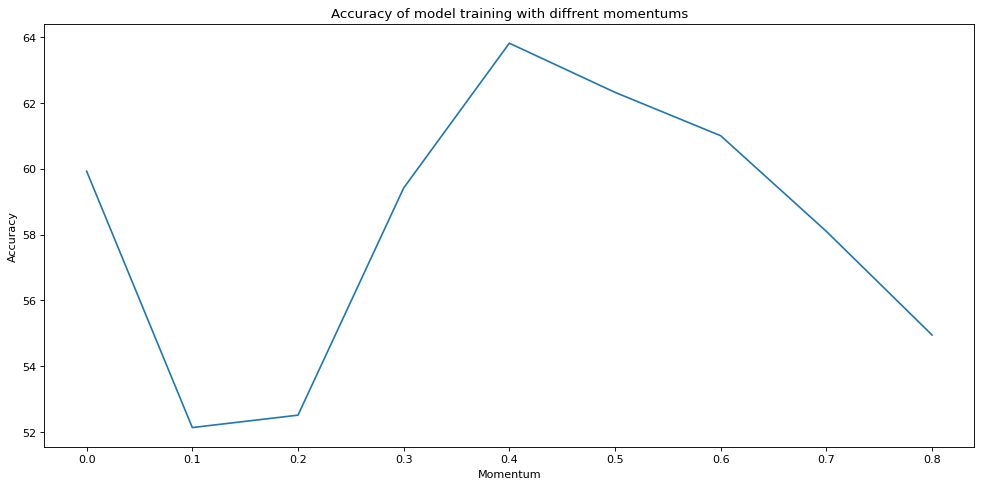

In [ ]:
momentums= []
for i in numpy.arange(0, 0.9, 0.1):
  momentums.append(i)

plt.figure(num = None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.plot(momentums, accuracies)
plt.xlabel("Momentum")
plt.ylabel("Accuracy")
plt.title("Accuracy of model training with diffrent momentums")



---



---

9.

epoch 1, train_loss: 3.194, time elapsed: 47.145313 seconds
epoch 2, train_loss: 2.394, time elapsed: 46.220483 seconds
epoch 3, train_loss: 1.954, time elapsed: 45.915116 seconds
epoch 4, train_loss: 1.711, time elapsed: 45.609487 seconds
epoch 5, train_loss: 1.577, time elapsed: 45.754408 seconds
epoch 6, train_loss: 1.433, time elapsed: 45.999089 seconds
epoch 7, train_loss: 1.341, time elapsed: 45.916513 seconds
epoch 8, train_loss: 1.261, time elapsed: 46.124734 seconds
epoch 9, train_loss: 1.188, time elapsed: 45.075896 seconds
epoch 10, train_loss: 1.152, time elapsed: 46.065392 seconds
epoch 11, train_loss: 1.091, time elapsed: 46.035512 seconds
epoch 12, train_loss: 1.050, time elapsed: 46.088139 seconds
epoch 13, train_loss: 0.999, time elapsed: 46.297595 seconds
epoch 14, train_loss: 0.974, time elapsed: 45.412682 seconds
epoch 15, train_loss: 0.943, time elapsed: 45.917171 seconds
epoch 16, train_loss: 0.912, time elapsed: 46.019924 seconds
epoch 17, train_loss: 0.890, time

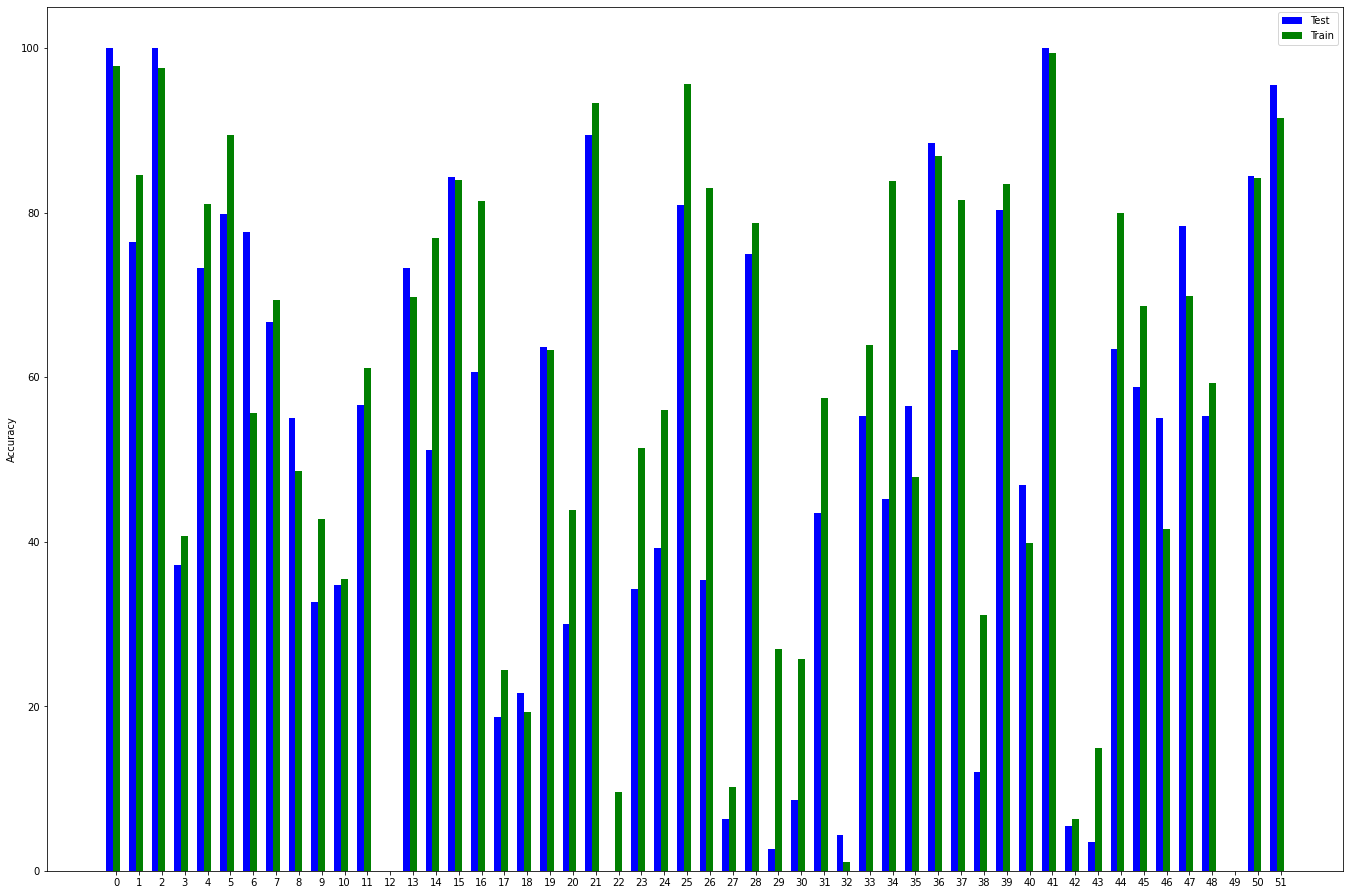

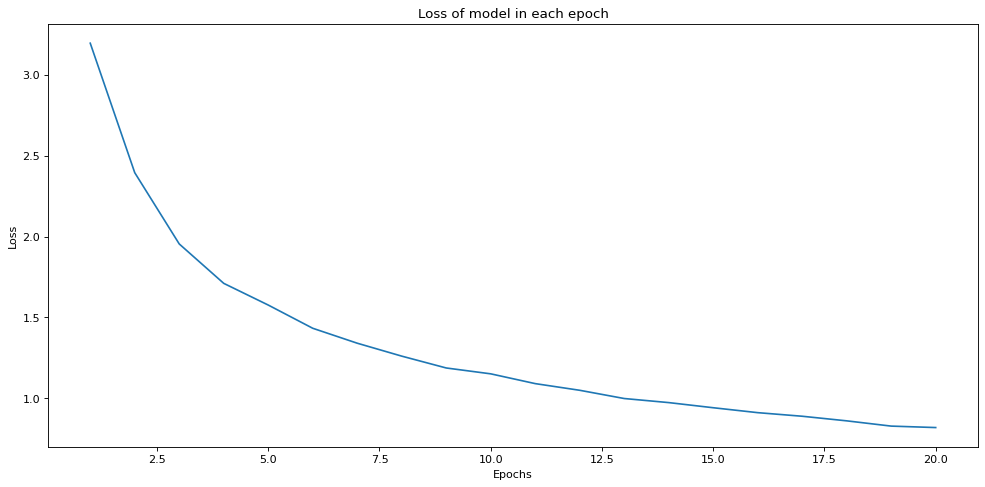

In [ ]:
neuralNetwork(0.05, datasetNormalized, numberOfDataInCategories, classes, trainLoaderNormalized, testLoaderNormalized, 64, False, 20, 0.4)

epoch 1, train_loss: 2.984, time elapsed: 29.472548 seconds
epoch 2, train_loss: 2.189, time elapsed: 29.440166 seconds
epoch 3, train_loss: 1.869, time elapsed: 29.698675 seconds
epoch 4, train_loss: 1.674, time elapsed: 29.779073 seconds
epoch 5, train_loss: 1.492, time elapsed: 30.114198 seconds
epoch 6, train_loss: 1.401, time elapsed: 29.488364 seconds
epoch 7, train_loss: 1.304, time elapsed: 30.130209 seconds
epoch 8, train_loss: 1.268, time elapsed: 29.491649 seconds
epoch 9, train_loss: 1.193, time elapsed: 29.619047 seconds
epoch 10, train_loss: 1.140, time elapsed: 29.697362 seconds
epoch 11, train_loss: 1.088, time elapsed: 29.475783 seconds
epoch 12, train_loss: 1.058, time elapsed: 29.649001 seconds
epoch 13, train_loss: 1.004, time elapsed: 30.249586 seconds
epoch 14, train_loss: 0.976, time elapsed: 29.909734 seconds
epoch 15, train_loss: 0.937, time elapsed: 29.960506 seconds
epoch 16, train_loss: 0.922, time elapsed: 30.372449 seconds
epoch 17, train_loss: 0.898, time

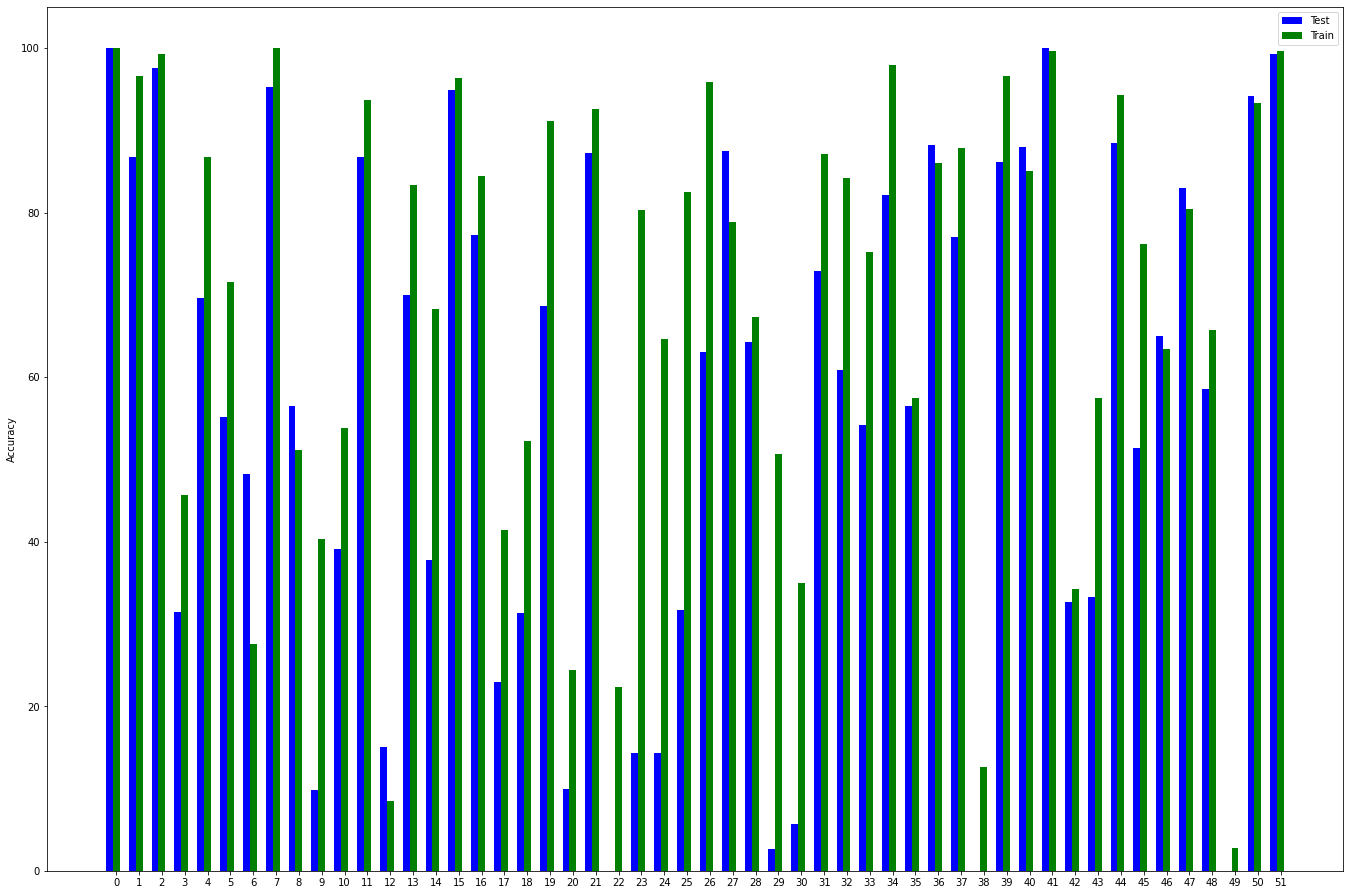

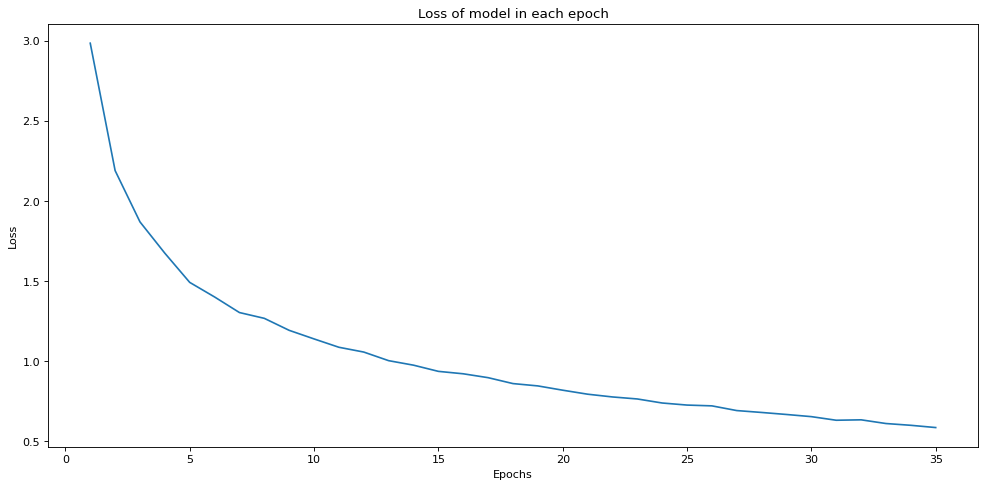

In [ ]:
neuralNetwork(0.05, datasetNormalized, numberOfDataInCategories, classes, trainLoaderNormalized, testLoaderNormalized, 64, False, 35, 0.4)



---



---


10.
MOMKENE YE ESHKALI BASHE:::::::::::::;
Losses  ru bayad barabare fit bezari




In [ ]:
import matplotlib.pyplot as plt
def plotLossesInEpochs(losses, epochsize):
  epochs = []
  for i in range(epochsize):
    epochs.append(i + 1)
  plt.figure(num = None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
  plt.plot(epochs, losses)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Loss of model in each epoch")

In [ ]:
class ModelWithTanh(nn.Module):
    def __init__(self, class_num, act=F.tanh):
      super(ModelWithTanh, self).__init__()
 
 
      self.layer1 = nn.Linear(1 * 80 * 60, 8000)
      self.act1 = act
 
 
      self.layer2 = nn.Linear(8000, 5000)
      self.act2 = act
 
      self.layer3 = nn.Linear(5000, 2000)
      self.act3 = act
 
 
      self.layer4 = nn.Linear(2000, 200)
      self.act4 = act
 
      self.layer5 = nn.Linear(200, 20)
      self.act5 = act

      self.layer6 = nn.Linear(20, class_num)

    def forward(self, x):

        x = x.view(x.size(0), -1)

        x = self.layer1(x)
        x = self.act1(x)

        x = self.layer2(x)
        x = self.act2(x)

        x = self.layer3(x)
        x = self.act3(x)

        x = self.layer4(x)
        x = self.act4(x)

        x = self.layer5(x)
        x = self.act5(x)

        x = self.layer6(x)
        return x


class ModelWithLeakyRelu(nn.Module):
    def __init__(self, class_num, act=F.leaky_relu):
      super(ModelWithLeakyRelu, self).__init__()
 
 
      self.layer1 = nn.Linear(1 * 80 * 60, 8000)
      self.act1 = act
 
 
      self.layer2 = nn.Linear(8000, 5000)
      self.act2 = act
 
      self.layer3 = nn.Linear(5000, 2000)
      self.act3 = act
 
 
      self.layer4 = nn.Linear(2000, 200)
      self.act4 = act
 
      self.layer5 = nn.Linear(200, 20)
      self.act5 = act

      self.layer6 = nn.Linear(20, class_num)

    def forward(self, x):

        x = x.view(x.size(0), -1)

        x = self.layer1(x)
        x = self.act1(x)

        x = self.layer2(x)
        x = self.act2(x)

        x = self.layer3(x)
        x = self.act3(x)

        x = self.layer4(x)
        x = self.act4(x)

        x = self.layer5(x)
        x = self.act5(x)

        x = self.layer6(x)
        return x

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch 1, train_loss: 2.810, time elapsed: 32.952018 seconds
epoch 2, train_loss: 2.025, time elapsed: 33.287185 seconds
epoch 3, train_loss: 1.706, time elapsed: 33.651188 seconds
epoch 4, train_loss: 1.548, time elapsed: 33.117292 seconds
epoch 5, train_loss: 1.411, time elapsed: 33.766666 seconds
epoch 6, train_loss: 1.341, time elapsed: 33.385917 seconds
epoch 7, train_loss: 1.273, time elapsed: 34.108153 seconds
epoch 8, train_loss: 1.218, time elapsed: 34.015751 seconds
epoch 9, train_loss: 1.166, time elapsed: 34.682841 seconds
epoch 10, train_loss: 1.131, time elapsed: 34.103709 seconds
total training time: 5.618 minutes
Validation Accuracy: 
Accuracy: 62.92906178489702%
Train Accuracy: 
Accuracy: 65.2448021462106%
OUTPUT TESR: 
{0: 95.45454545454545, 1: 75.69444444444444, 2: 96.29629629629629, 3: 11.428571428571429, 4: 55.357142857142854, 5: 39.894551845342704, 6: 70.6896551724138, 7: 66.66666666666667, 8: 63.768115942028984, 9: 5.434782608695652, 10: 0.0, 11: 95.18072289156626

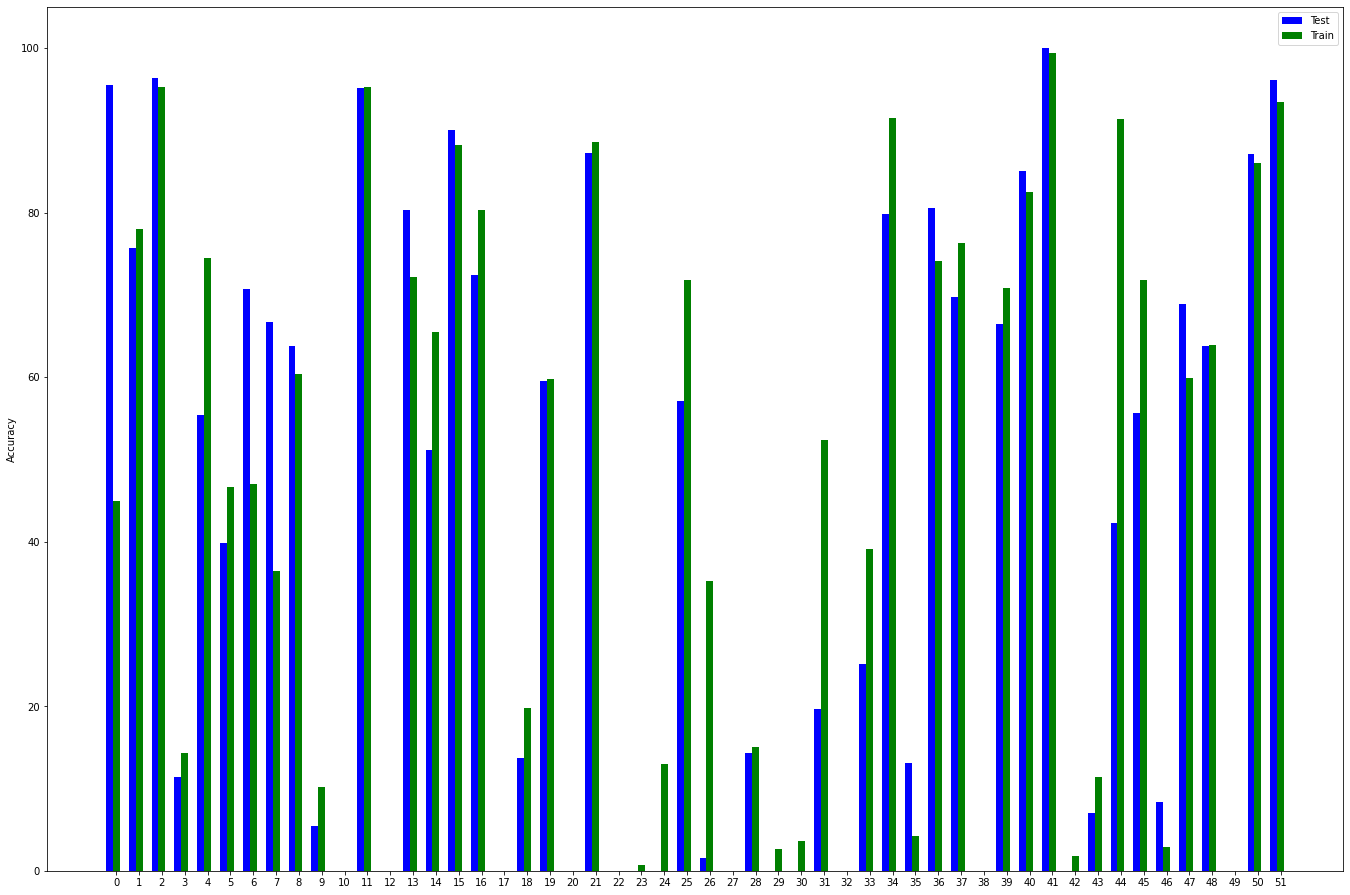

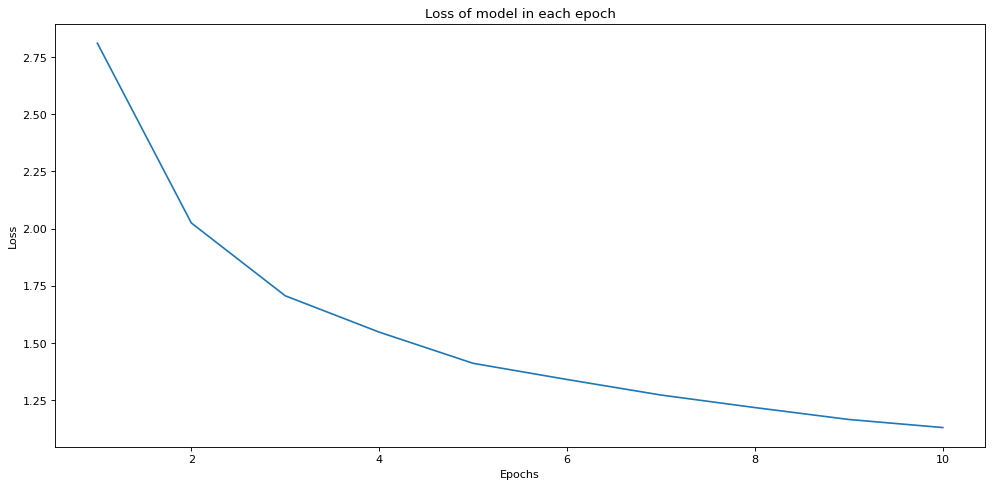

In [ ]:
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = ModelWithTanh(len(classes))
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.4)
  losses = fit(model, trainLoaderNormalized, device, criterion, optimizer)
  print("Validation Accuracy: ")
  test_model_accuracy(model, testLoaderNormalized)
  print("Train Accuracy: ")
  test_model_accuracy(model, trainLoaderNormalized)
  accTrain, accTest = getAccuracyOfClasses(model, testLoaderNormalized, trainLoaderNormalized, classes)
  plotLossesInEpochs(losses, 10)

epoch 1, train_loss: 3.009, time elapsed: 33.587445 seconds
epoch 2, train_loss: 2.179, time elapsed: 33.610942 seconds
epoch 3, train_loss: 1.810, time elapsed: 33.89568 seconds
epoch 4, train_loss: 1.625, time elapsed: 33.8525 seconds
epoch 5, train_loss: 1.474, time elapsed: 33.341162 seconds
epoch 6, train_loss: 1.362, time elapsed: 33.523492 seconds
epoch 7, train_loss: 1.278, time elapsed: 34.13472 seconds
epoch 8, train_loss: 1.226, time elapsed: 33.711272 seconds
epoch 9, train_loss: 1.168, time elapsed: 33.780712 seconds
epoch 10, train_loss: 1.119, time elapsed: 33.876098 seconds
total training time: 5.622 minutes
Validation Accuracy: 
Accuracy: 60.977251312424286%
Train Accuracy: 
Accuracy: 63.85647216633132%
OUTPUT TESR: 
{0: 100.0, 1: 87.5, 2: 99.38271604938272, 3: 14.285714285714286, 4: 55.357142857142854, 5: 70.298769771529, 6: 72.41379310344827, 7: 0.0, 8: 68.1159420289855, 9: 5.434782608695652, 10: 0.0, 11: 92.7710843373494, 12: 1.0, 13: 44.80874316939891, 14: 18.11023

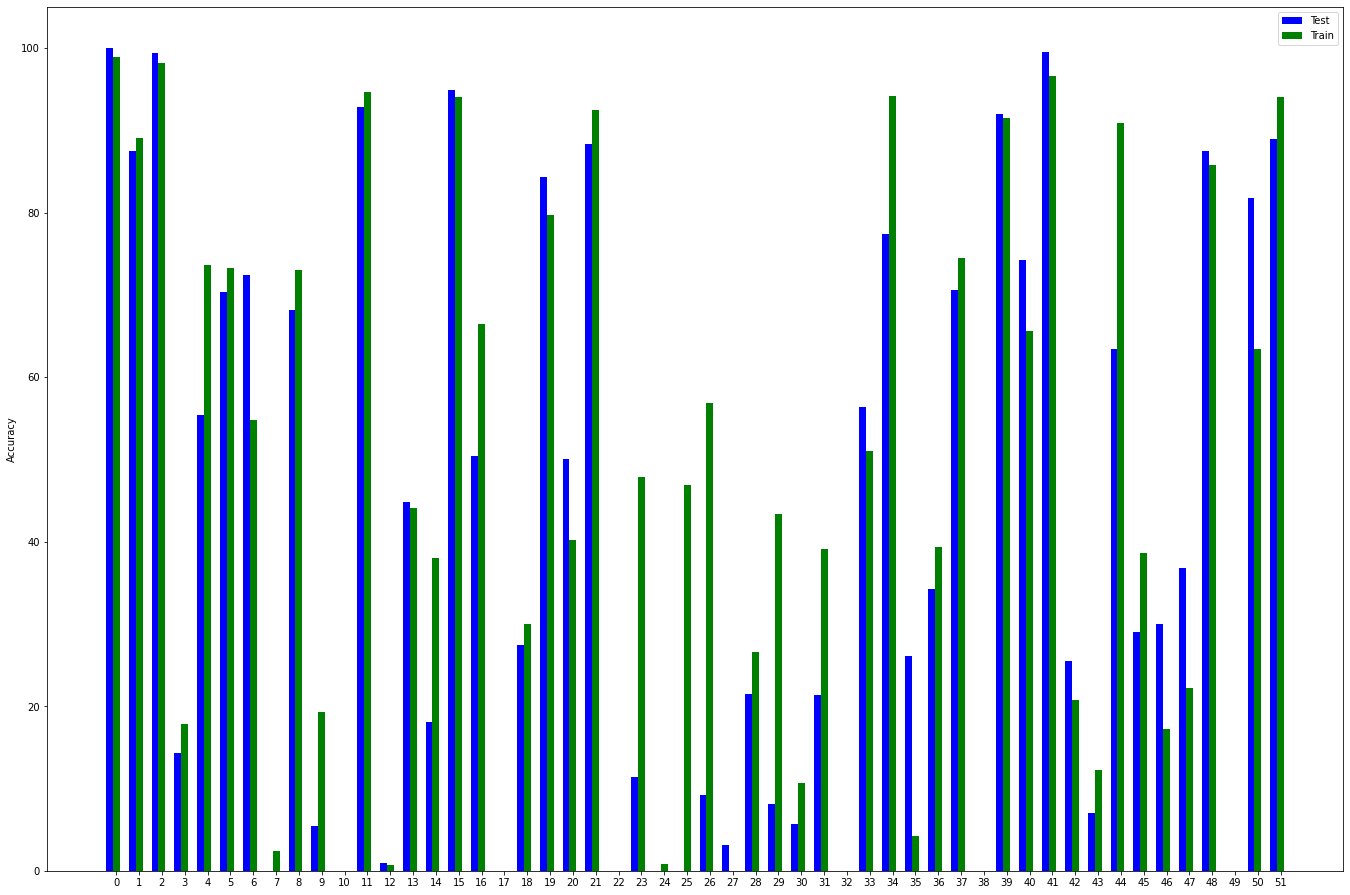

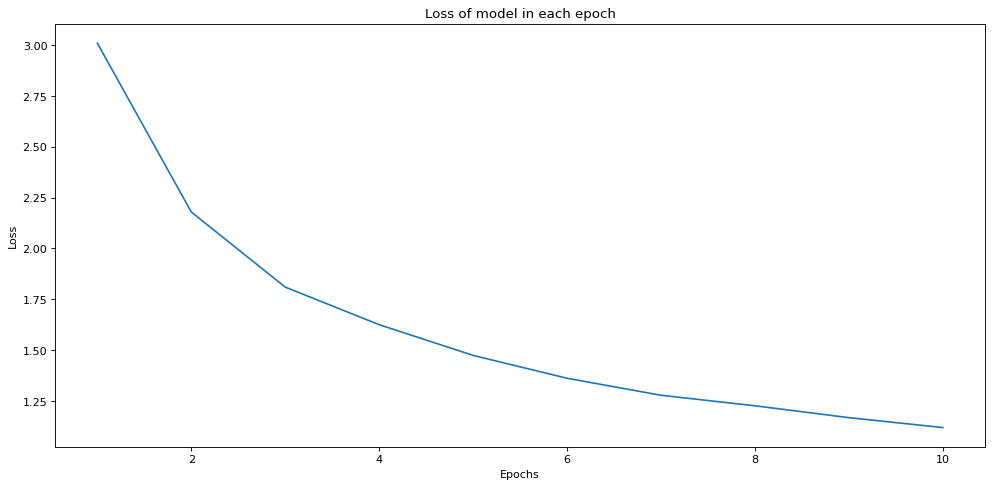

In [ ]:
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = ModelWithLeakyRelu(len(classes))
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.4)
  losses = fit(model, trainLoaderNormalized, device, criterion, optimizer)
  print("Validation Accuracy: ")
  test_model_accuracy(model, testLoaderNormalized)
  print("Train Accuracy: ")
  test_model_accuracy(model, trainLoaderNormalized)
  accTrain, accTest = getAccuracyOfClasses(model, testLoaderNormalized, trainLoaderNormalized, classes)
  plotLossesInEpochs(losses, 10)



---



---

11.

epoch 1, train_loss: 3.778, time elapsed: 48.960191 seconds
epoch 2, train_loss: 3.681, time elapsed: 49.041962 seconds
epoch 3, train_loss: 3.648, time elapsed: 49.10761 seconds
epoch 4, train_loss: 3.640, time elapsed: 49.728692 seconds
epoch 5, train_loss: 3.633, time elapsed: 49.874133 seconds
epoch 6, train_loss: 3.622, time elapsed: 49.274281 seconds
epoch 7, train_loss: 3.595, time elapsed: 48.963739 seconds
epoch 8, train_loss: 3.576, time elapsed: 49.432337 seconds
epoch 9, train_loss: 3.571, time elapsed: 48.791736 seconds
epoch 10, train_loss: 3.569, time elapsed: 48.808235 seconds
total training time: 8.200 minutes
Validation Accuracy: 
Accuracy: 9.503297886660384%
Train Accuracy: 
Accuracy: 9.48356807511737%
OUTPUT TESR: 
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29:

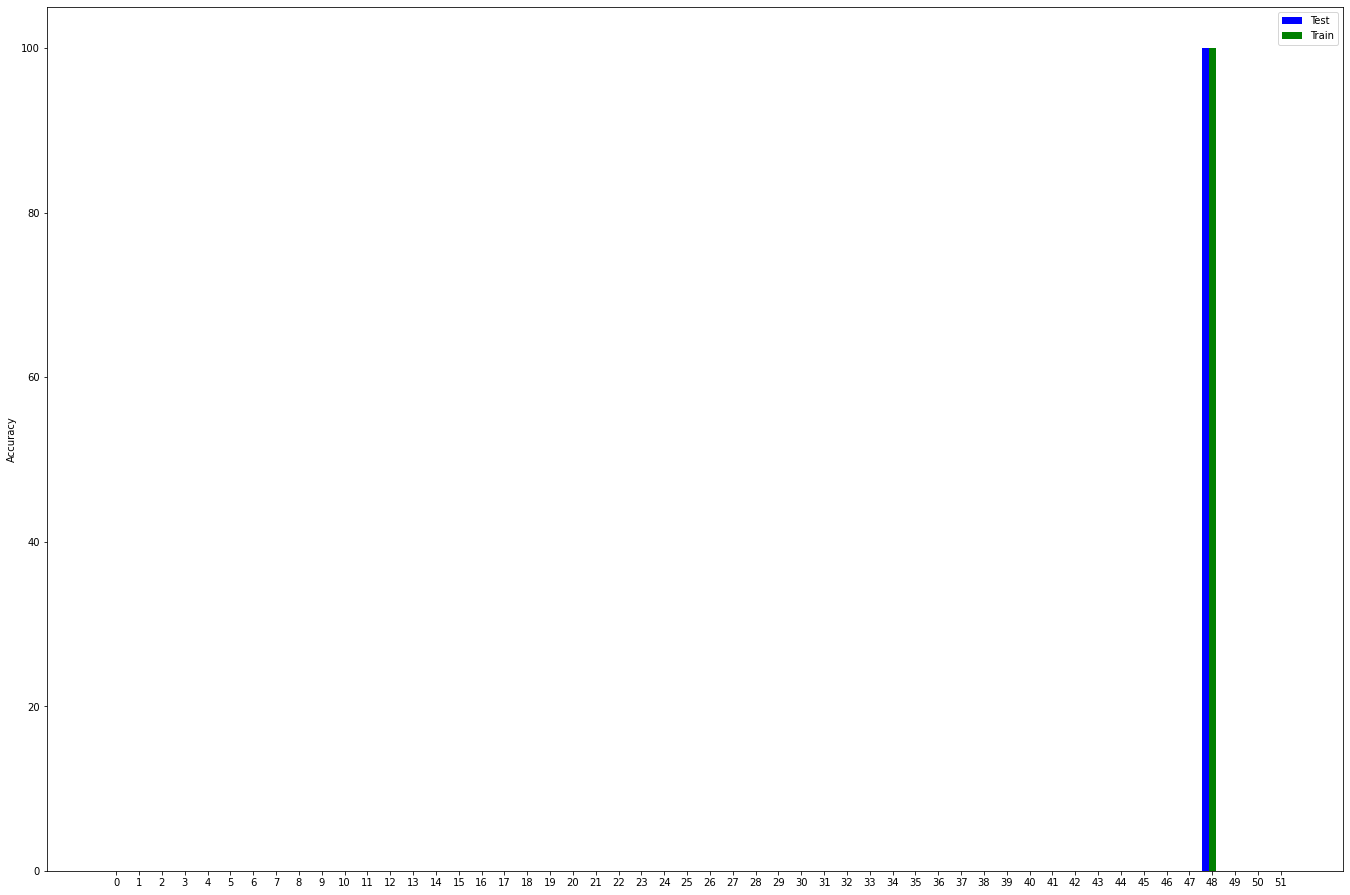

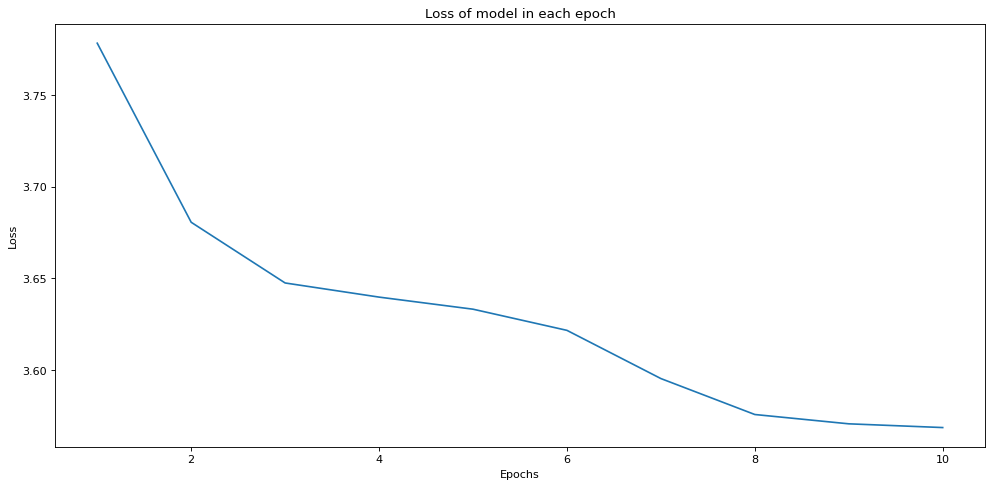

In [ ]:
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = Model2(len(classes))
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.4, weight_decay = 0.1)
  losses = fit(model, trainLoaderNormalized, device, criterion, optimizer)
  print("Validation Accuracy: ")
  test_model_accuracy(model, testLoaderNormalized)
  print("Train Accuracy: ")
  test_model_accuracy(model, trainLoaderNormalized)
  accTrain, accTest = getAccuracyOfClasses(model, testLoaderNormalized, trainLoaderNormalized, classes)
  plotLossesInEpochs(losses, 10)

In [ ]:
import matplotlib as plt

In [ ]:
accTrain, accTest = getAccuracyOfClasses(model, testLoaderNormalized, trainLoaderNormalized, classes)

In [30]:
import matplotlib.pyplot as plt
def getAccuracyOfClasses(model, test_loader, train_loader, classes):
  numberOfDataInTest = getNumberDistribution(test_loader, classes)
  numberOfDataInTest = list(numberOfDataInTest.items())
  numberOfDataInTrain = getNumberDistribution(train_loader, classes)
  numberOfDataInTrain = list(numberOfDataInTrain.items())
  outputTest = {}
  outputTrain = {}
  for i in range(52):
    outputTest.update({i : 0})
  with torch.no_grad():
    for images, labels in test_loader:
      outputs = model(images.to(device))
      _, predicted = torch.max(outputs.data, 1)
      numericLabels = labels.numpy()
      numericPredicted = predicted.to('cpu') .numpy()
      for i in range(len(numericLabels)): 
        if(numericLabels[i] == numericPredicted[i]):
          outputTest[numericLabels[i]] = outputTest[numericLabels[i]] + 1
  for i in range(len(numberOfDataInTest)):
    outputTest[i] = 100 * outputTest[i] / numberOfDataInTest[i][1]

  for i in range(52):
    outputTrain.update({i : 0})
  with torch.no_grad():
    for images, labels in train_loader:
      outputs = model(images.to(device))
      _, predicted = torch.max(outputs.data, 1)
      numericLabels = labels.numpy()
      numericPredicted = predicted.to('cpu') .numpy()
      for i in range(len(numericLabels)): 
        if(numericLabels[i] == numericPredicted[i]):
          outputTrain[numericLabels[i]] = outputTrain[numericLabels[i]] + 1
  for i in range(len(numberOfDataInTrain)):
    outputTrain[i] = 100 * outputTrain[i] / numberOfDataInTrain[i][1]
  print("OUTPUT TESR: ")
  print(outputTest)
  print("OUTPUT Train: ")
  print(outputTrain)  
  data = [list(outputTest.values()), list(outputTrain.values())]  
  X = np.arange(52)
  fig = plt.figure()
  ax = fig.add_axes([0,0,3,3])
  r0 = ax.bar(X , data[0], color = 'b', width = 0.3)
  r1 = ax.bar(X + 0.3, data[1], color = 'g', width = 0.3)
  ax.set_ylabel('Accuracy')
  ax.set_xticks(X+0.3)
  ax.set_xticklabels( list(outputTest.keys()) )
  ax.legend( (r0, r1), ('Test', 'Train') )
  return outputTrain, outputTest



def plotLossesInEpochs(losses, epochsize):
  epochs = []
  for i in range(epochsize):
    epochs.append(i + 1)
  plt.figure(num = None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
  plt.plot(epochs, losses)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.title("Loss of model in each epoch")

epoch 1, train_loss: 3.519, time elapsed: 48.422179 seconds
epoch 2, train_loss: 3.460, time elapsed: 48.019368 seconds
epoch 3, train_loss: 3.453, time elapsed: 47.793092 seconds
epoch 4, train_loss: 3.442, time elapsed: 47.934372 seconds
epoch 5, train_loss: 3.421, time elapsed: 48.392563 seconds
epoch 6, train_loss: 3.387, time elapsed: 48.428014 seconds
epoch 7, train_loss: 3.386, time elapsed: 48.384997 seconds
epoch 8, train_loss: 3.385, time elapsed: 48.075457 seconds
epoch 9, train_loss: 3.387, time elapsed: 47.191479 seconds
epoch 10, train_loss: 3.384, time elapsed: 47.650107 seconds
total training time: 8.005 minutes
Validation Accuracy: 
Accuracy: 8.641809126396554%
Train Accuracy: 
Accuracy: 8.625083836351441%
OUTPUT TESR: 
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 2

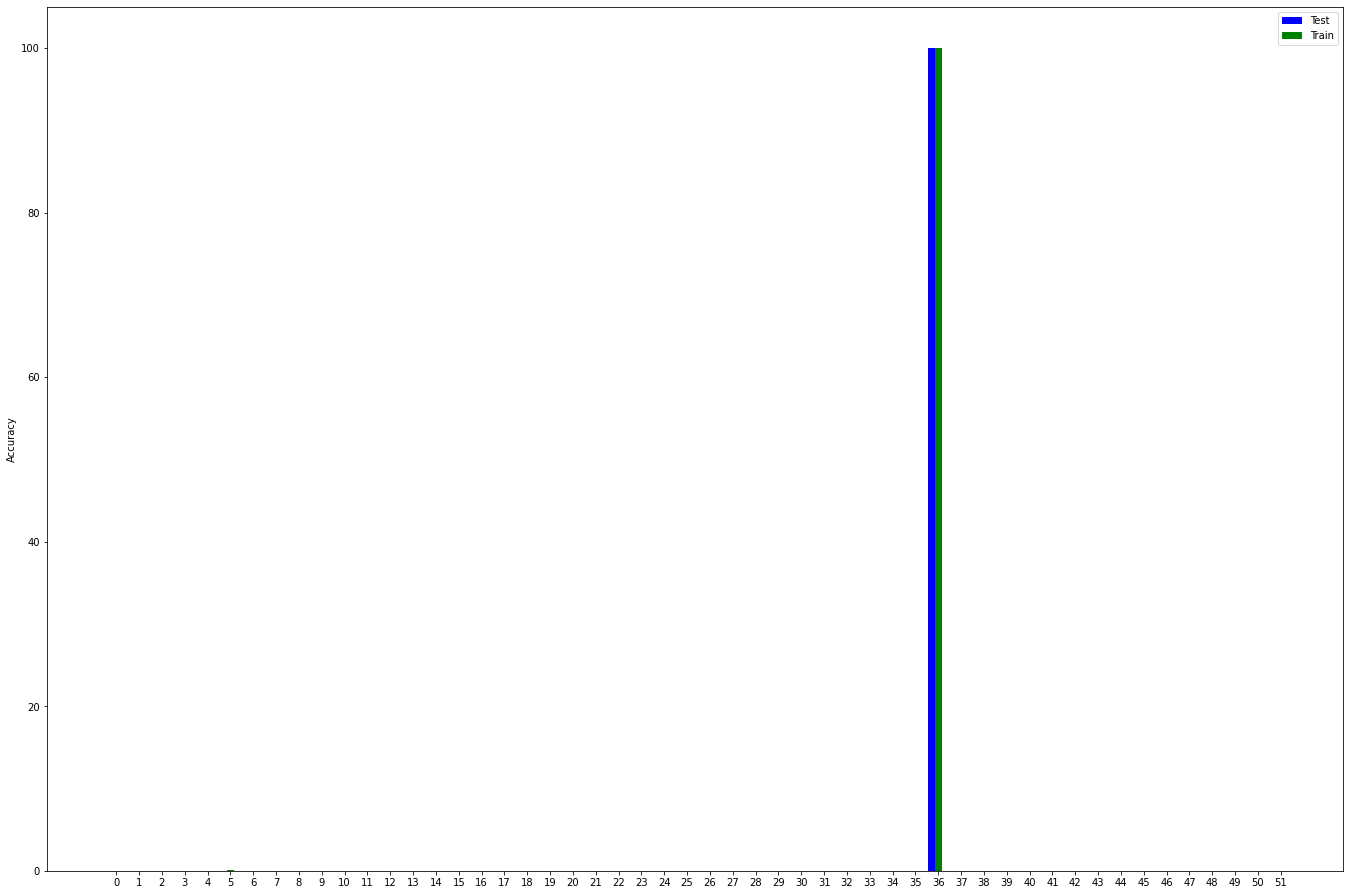

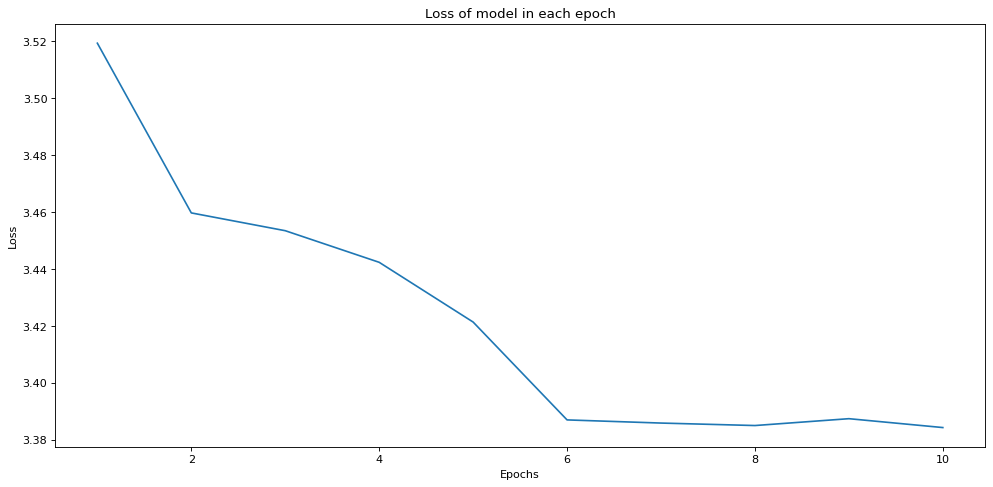

In [ ]:
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = Model2(len(classes))
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.4, weight_decay = 0.1)
  losses = fit(model, trainLoaderNormalized, device, criterion, optimizer)
  print("Validation Accuracy: ")
  test_model_accuracy(model, testLoaderNormalized)
  print("Train Accuracy: ")
  test_model_accuracy(model, trainLoaderNormalized)
  accTrain, accTest = getAccuracyOfClasses(model, testLoaderNormalized, trainLoaderNormalized, classes)
  plotLossesInEpochs(losses, 10)

In [ ]:
print("LAYER 1: ")
for parameter in model.layer1.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 2: ")  
for parameter in model.layer2.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 3: ")
for parameter in model.layer3.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 4: ")
for parameter in model.layer4.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 5: ")
for parameter in model.layer5.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 6: ")
for parameter in model.layer6.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))

LAYER 1: 
Parameter containing:
tensor([[ 5.8031e-21,  1.1438e-19, -2.3513e-20,  ...,  8.5032e-20,
         -7.1727e-20,  9.5809e-20],
        [ 1.1902e-04,  1.1899e-04,  1.1902e-04,  ...,  1.1901e-04,
          1.1915e-04,  1.1966e-04],
        [ 6.5028e-20,  4.9082e-20, -5.8680e-20,  ..., -7.1909e-20,
         -6.5199e-20,  4.8531e-20],
        ...,
        [-3.0746e-21, -1.0981e-19,  9.4163e-20,  ...,  1.7067e-20,
          6.2054e-20, -5.3076e-20],
        [ 1.3710e-04,  1.3707e-04,  1.3710e-04,  ...,  1.3710e-04,
          1.3726e-04,  1.3784e-04],
        [ 1.3826e-04,  1.3822e-04,  1.3825e-04,  ...,  1.3825e-04,
          1.3841e-04,  1.3900e-04]], device='cuda:0', requires_grad=True)
Number of Paramers:  8000
Parameter containing:
tensor([-7.6163e-20,  1.3070e-04,  2.9482e-20,  ..., -6.6991e-20,
         1.5056e-04,  1.5183e-04], device='cuda:0', requires_grad=True)
Number of Paramers:  8000
LAYER 2: 
Parameter containing:
tensor([[-1.0907e-20,  4.1142e-20,  6.2821e-20,  ...,  

In [ ]:
Entropy(model, testLoaderNormalized)

3.7948861183264317


epoch 1, train_loss: 3.250, time elapsed: 48.380304 seconds
epoch 2, train_loss: 2.524, time elapsed: 48.864291 seconds
epoch 3, train_loss: 2.312, time elapsed: 48.407672 seconds
epoch 4, train_loss: 2.270, time elapsed: 48.555765 seconds
epoch 5, train_loss: 2.157, time elapsed: 48.237224 seconds
epoch 6, train_loss: 2.085, time elapsed: 47.589922 seconds
epoch 7, train_loss: 2.098, time elapsed: 47.761072 seconds
epoch 8, train_loss: 2.113, time elapsed: 48.220441 seconds
epoch 9, train_loss: 2.013, time elapsed: 47.522236 seconds
epoch 10, train_loss: 1.938, time elapsed: 48.250223 seconds
total training time: 8.030 minutes
Validation Accuracy: 
Accuracy: 27.325346614618386%
Train Accuracy: 
Accuracy: 27.518443997317238%
OUTPUT TESR: 
{0: 0.0, 1: 84.72222222222223, 2: 0.6172839506172839, 3: 0.0, 4: 0.0, 5: 68.0140597539543, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 13.25301204819277, 12: 0.0, 13: 0.0, 14: 0.0, 15: 62.67806267806268, 16: 12.878787878787879, 17: 0.0, 18: 0.0, 19: 

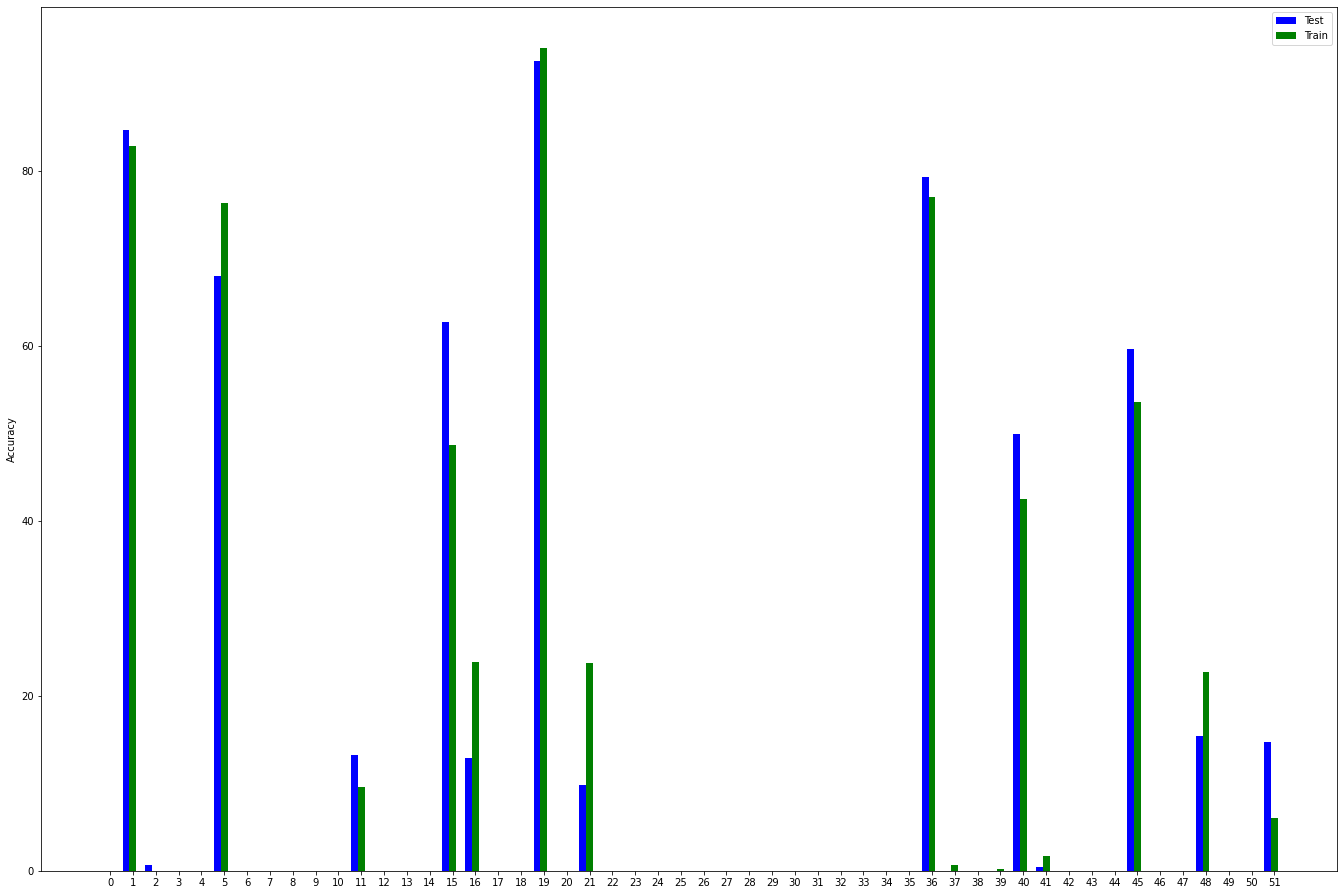

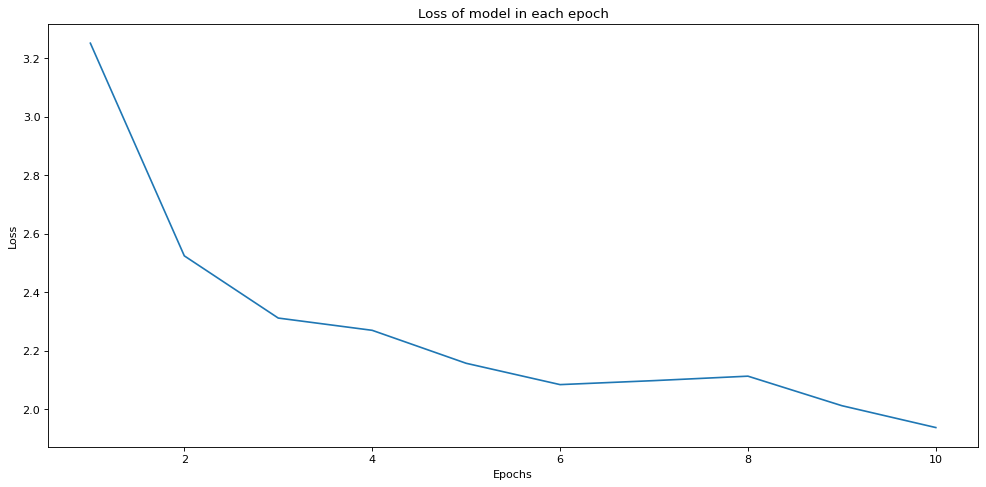

In [ ]:
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = Model2(len(classes))
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.4, weight_decay = 0.01)
  losses = fit(model, trainLoaderNormalized, device, criterion, optimizer)
  print("Validation Accuracy: ")
  test_model_accuracy(model, testLoaderNormalized)
  print("Train Accuracy: ")
  test_model_accuracy(model, trainLoaderNormalized)
  accTrain, accTest = getAccuracyOfClasses(model, testLoaderNormalized, trainLoaderNormalized, classes)
  plotLossesInEpochs(losses, 10)

In [ ]:
print("LAYER 1: ")
for parameter in model.layer1.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 2: ")  
for parameter in model.layer2.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 3: ")
for parameter in model.layer3.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 4: ")
for parameter in model.layer4.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 5: ")
for parameter in model.layer5.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 6: ")
for parameter in model.layer6.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))

LAYER 1: 
Parameter containing:
tensor([[ 1.2466e-04,  2.4833e-04,  2.7019e-04,  ...,  2.6048e-04,
          2.1880e-04, -7.2368e-05],
        [-2.6076e-04, -3.2585e-04, -1.4627e-04,  ...,  2.2794e-04,
          1.4936e-04, -3.9537e-05],
        [-1.5346e-04, -2.7723e-04, -2.8280e-04,  ..., -1.9822e-04,
          2.0585e-04,  6.1407e-05],
        ...,
        [ 4.3317e-05,  2.6356e-04,  1.7111e-04,  ..., -2.2415e-04,
         -6.4994e-05,  1.0588e-04],
        [-2.5586e-04, -3.7399e-04, -4.0928e-04,  ..., -3.3707e-04,
         -2.0660e-04,  1.1005e-05],
        [ 7.2251e-05,  1.3889e-04,  2.3635e-04,  ...,  1.8431e-05,
          2.7542e-04,  5.6645e-04]], device='cuda:0', requires_grad=True)
Number of Paramers:  8000
Parameter containing:
tensor([ 3.8446e-04, -9.1855e-05,  2.7064e-04,  ...,  1.6927e-04,
        -9.2216e-05,  5.1679e-04], device='cuda:0', requires_grad=True)
Number of Paramers:  8000
LAYER 2: 
Parameter containing:
tensor([[-4.0040e-04, -1.9226e-04,  1.7647e-04,  ...,  

In [ ]:
Entropy(model, testLoaderNormalized)

2.8621154544699907


epoch 1, train_loss: 3.109, time elapsed: 47.247338 seconds
epoch 2, train_loss: 2.225, time elapsed: 47.590355 seconds
epoch 3, train_loss: 1.847, time elapsed: 47.676021 seconds
epoch 4, train_loss: 1.680, time elapsed: 46.823934 seconds
epoch 5, train_loss: 1.534, time elapsed: 46.329567 seconds
epoch 6, train_loss: 1.406, time elapsed: 46.929757 seconds
epoch 7, train_loss: 1.322, time elapsed: 46.363036 seconds
epoch 8, train_loss: 1.243, time elapsed: 45.94644 seconds
epoch 9, train_loss: 1.179, time elapsed: 46.951987 seconds
epoch 10, train_loss: 1.122, time elapsed: 47.448076 seconds
total training time: 7.822 minutes
Validation Accuracy: 
Accuracy: 61.79835778705075%
Train Accuracy: 
Accuracy: 63.672032193158955%
OUTPUT TESR: 
{0: 100.0, 1: 79.86111111111111, 2: 98.76543209876543, 3: 28.571428571428573, 4: 60.714285714285715, 5: 76.44991212653778, 6: 86.20689655172414, 7: 71.42857142857143, 8: 57.971014492753625, 9: 1.0869565217391304, 10: 0.0, 11: 93.97590361445783, 12: 0.0,

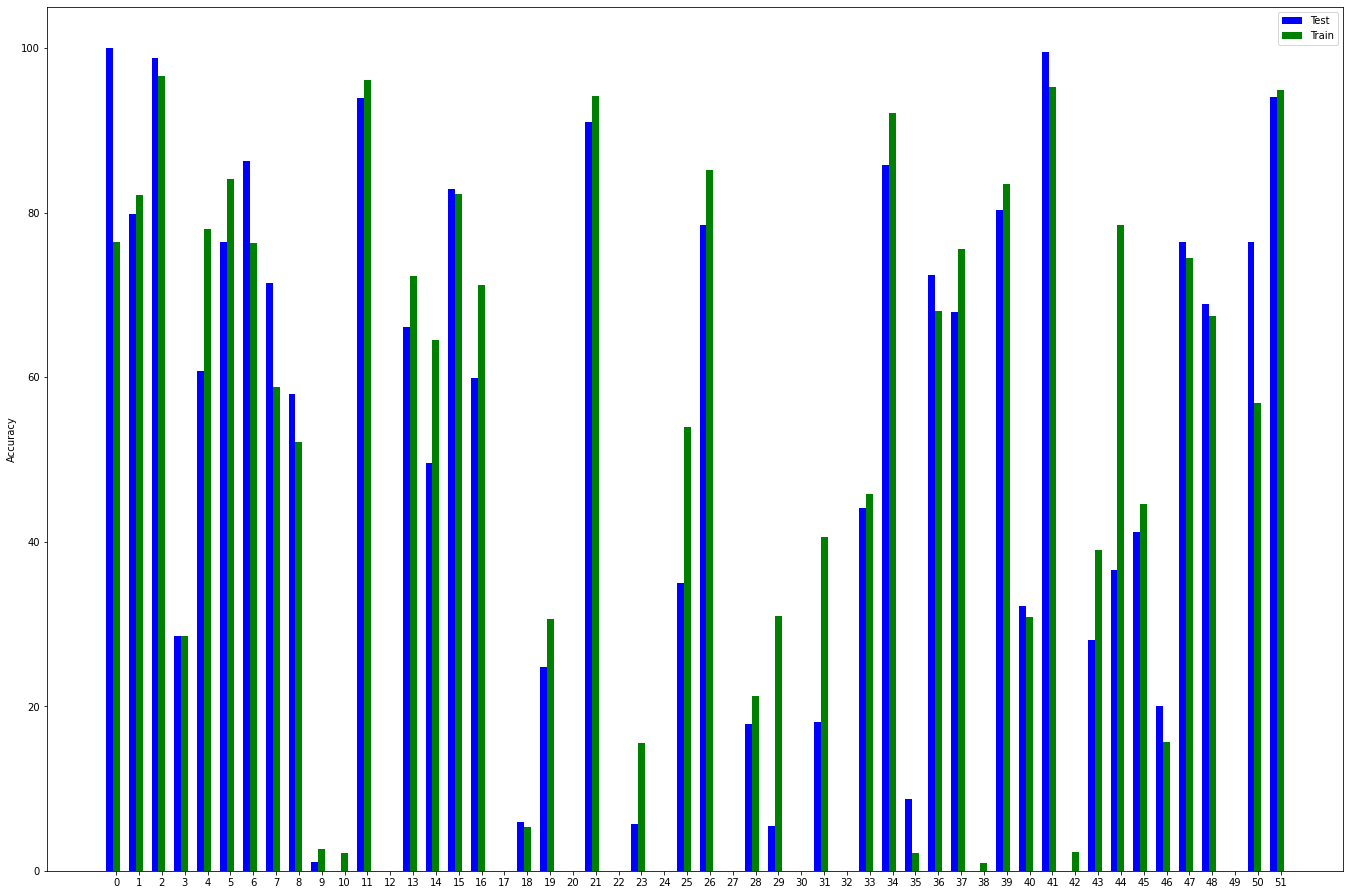

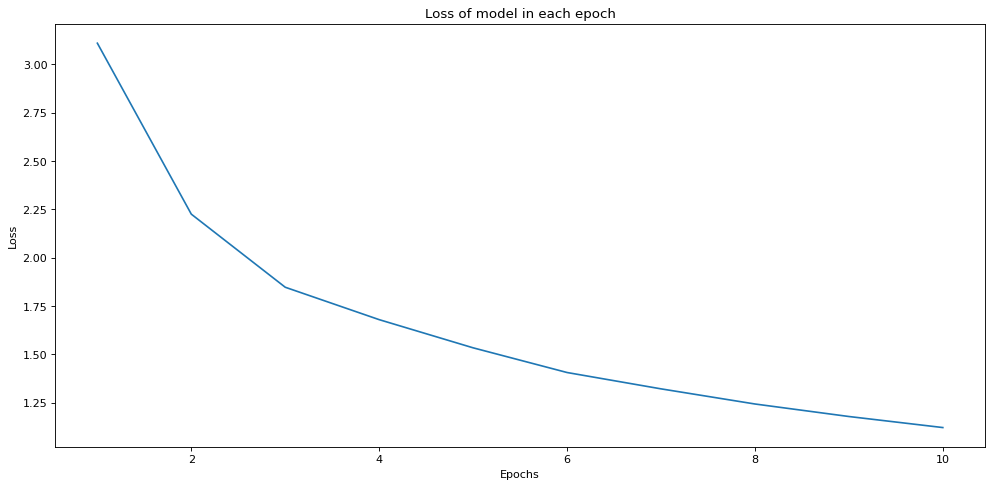

In [ ]:
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = Model2(len(classes))
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.4, weight_decay = 0.0001)
  losses = fit(model, trainLoaderNormalized, device, criterion, optimizer)
  print("Validation Accuracy: ")
  test_model_accuracy(model, testLoaderNormalized)
  print("Train Accuracy: ")
  test_model_accuracy(model, trainLoaderNormalized)
  accTrain, accTest = getAccuracyOfClasses(model, testLoaderNormalized, trainLoaderNormalized, classes)
  plotLossesInEpochs(losses, 10)

epoch 1, train_loss: 3.093, time elapsed: 48.398701 seconds
epoch 2, train_loss: 2.164, time elapsed: 48.479396 seconds
epoch 3, train_loss: 1.885, time elapsed: 48.527088 seconds
epoch 4, train_loss: 1.636, time elapsed: 48.44746 seconds
epoch 5, train_loss: 1.478, time elapsed: 49.107938 seconds
epoch 6, train_loss: 1.382, time elapsed: 50.181367 seconds
epoch 7, train_loss: 1.305, time elapsed: 48.928196 seconds
epoch 8, train_loss: 1.223, time elapsed: 48.867307 seconds
epoch 9, train_loss: 1.159, time elapsed: 48.995293 seconds
epoch 10, train_loss: 1.122, time elapsed: 49.111875 seconds
total training time: 8.151 minutes
Validation Accuracy: 
Accuracy: 61.79835778705075%
Train Accuracy: 
Accuracy: 64.5942320590208%
OUTPUT TESR: 
{0: 100.0, 1: 93.75, 2: 88.88888888888889, 3: 0.0, 4: 60.714285714285715, 5: 42.00351493848858, 6: 65.51724137931035, 7: 90.47619047619048, 8: 72.46376811594203, 9: 4.3478260869565215, 10: 0.0, 11: 79.51807228915662, 12: 0.0, 13: 63.387978142076506, 14: 1

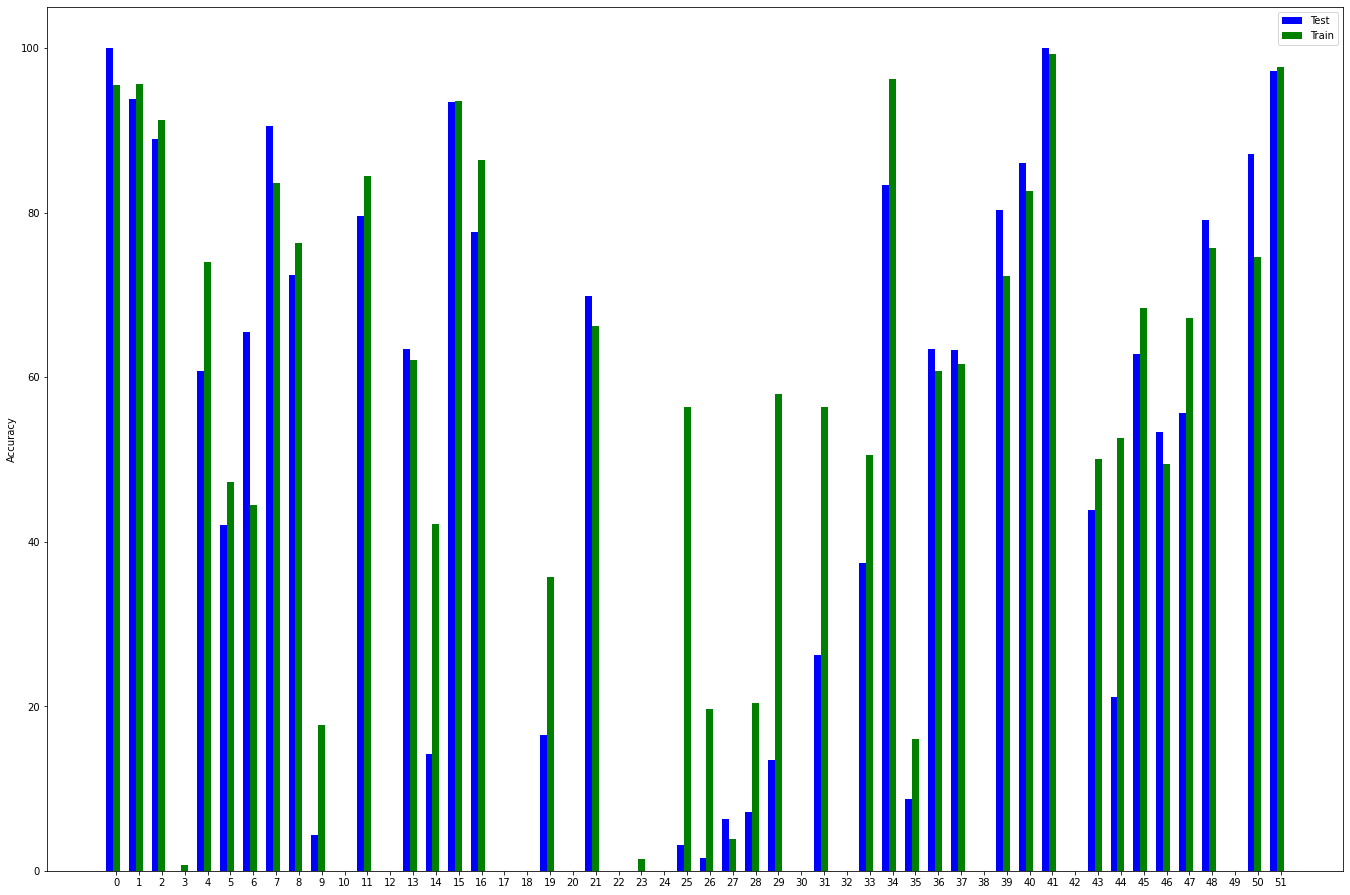

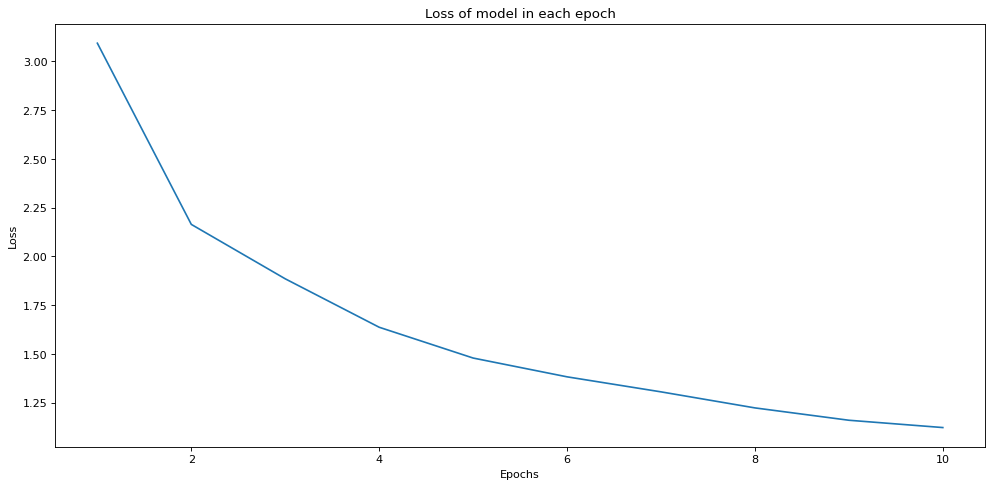

In [ ]:
  import torch
  import numpy as np

  np.random.seed(123)
  np.set_printoptions(8, suppress=True) 


  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = Model2(len(classes))
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.4, weight_decay = 0.0001)
  losses = fit(model, trainLoaderNormalized, device, criterion, optimizer, num_epochs = 10)
  print("Validation Accuracy: ")
  test_model_accuracy(model, testLoaderNormalized)
  print("Train Accuracy: ")
  test_model_accuracy(model, trainLoaderNormalized)
  accTrain, accTest = getAccuracyOfClasses(model, testLoaderNormalized, trainLoaderNormalized, classes)
  plotLossesInEpochs(losses, 10)

In [ ]:
print("LAYER 1: ")
for parameter in model.layer1.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 2: ")  
for parameter in model.layer2.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 3: ")
for parameter in model.layer3.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 4: ")
for parameter in model.layer4.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 5: ")
for parameter in model.layer5.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 6: ")
for parameter in model.layer6.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))


LAYER 1: 
Parameter containing:
tensor([[-0.0046,  0.0090,  0.0071,  ..., -0.0139,  0.0041, -0.0041],
        [-0.0134, -0.0011,  0.0123,  ...,  0.0072, -0.0029, -0.0106],
        [ 0.0064, -0.0001, -0.0104,  ...,  0.0122, -0.0099,  0.0089],
        ...,
        [ 0.0034, -0.0086,  0.0021,  ...,  0.0113, -0.0041, -0.0105],
        [ 0.0016,  0.0037,  0.0014,  ..., -0.0073,  0.0080, -0.0021],
        [ 0.0093,  0.0027, -0.0134,  ...,  0.0044,  0.0012,  0.0092]],
       device='cuda:0', requires_grad=True)
Number of Paramers:  8000
Parameter containing:
tensor([-0.0076,  0.0045,  0.0077,  ...,  0.0044,  0.0009,  0.0066],
       device='cuda:0', requires_grad=True)
Number of Paramers:  8000
LAYER 2: 
Parameter containing:
tensor([[ 0.0076, -0.0064, -0.0016,  ..., -0.0043, -0.0019,  0.0019],
        [ 0.0017, -0.0044,  0.0090,  ..., -0.0101, -0.0022,  0.0041],
        [ 0.0105,  0.0012,  0.0005,  ..., -0.0052,  0.0070,  0.0037],
        ...,
        [ 0.0049,  0.0032, -0.0017,  ..., -0.010

In [ ]:
def Entropy(model, testLoaderNormalized):
  train_loss = 0.
  for images, labels in testLoaderNormalized:
    
    images = images.to(device)
    labels = labels.to(device)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad()

    # Forward pass to get output/logits
    outputs = model(images)

    # Calculate Loss: softmax --> cross entropy loss
    loss = criterion(outputs, labels)

    optimizer.step()
    train_loss += loss.item()
  print(train_loss / len(testLoaderNormalized))

Entropy(model, testLoaderNormalized)


1.4018111977821741


epoch 1, train_loss: 3.136, time elapsed: 49.922327 seconds
epoch 2, train_loss: 2.325, time elapsed: 49.801773 seconds
epoch 3, train_loss: 2.002, time elapsed: 49.659458 seconds
epoch 4, train_loss: 1.770, time elapsed: 50.031702 seconds
epoch 5, train_loss: 1.644, time elapsed: 50.624511 seconds
epoch 6, train_loss: 1.533, time elapsed: 50.327456 seconds
epoch 7, train_loss: 1.423, time elapsed: 49.359855 seconds
epoch 8, train_loss: 1.338, time elapsed: 49.742542 seconds
epoch 9, train_loss: 1.294, time elapsed: 49.702623 seconds
epoch 10, train_loss: 1.245, time elapsed: 50.045235 seconds
total training time: 8.320 minutes
Validation Accuracy: 
Accuracy: 50.18172028536815%
Train Accuracy: 
Accuracy: 52.30382293762575%
OUTPUT TESR: 
{0: 72.72727272727273, 1: 85.41666666666667, 2: 77.77777777777777, 3: 0.0, 4: 37.5, 5: 43.7609841827768, 6: 43.10344827586207, 7: 9.523809523809524, 8: 62.31884057971015, 9: 0.0, 10: 0.0, 11: 30.120481927710845, 12: 6.0, 13: 4.918032786885246, 14: 25.19

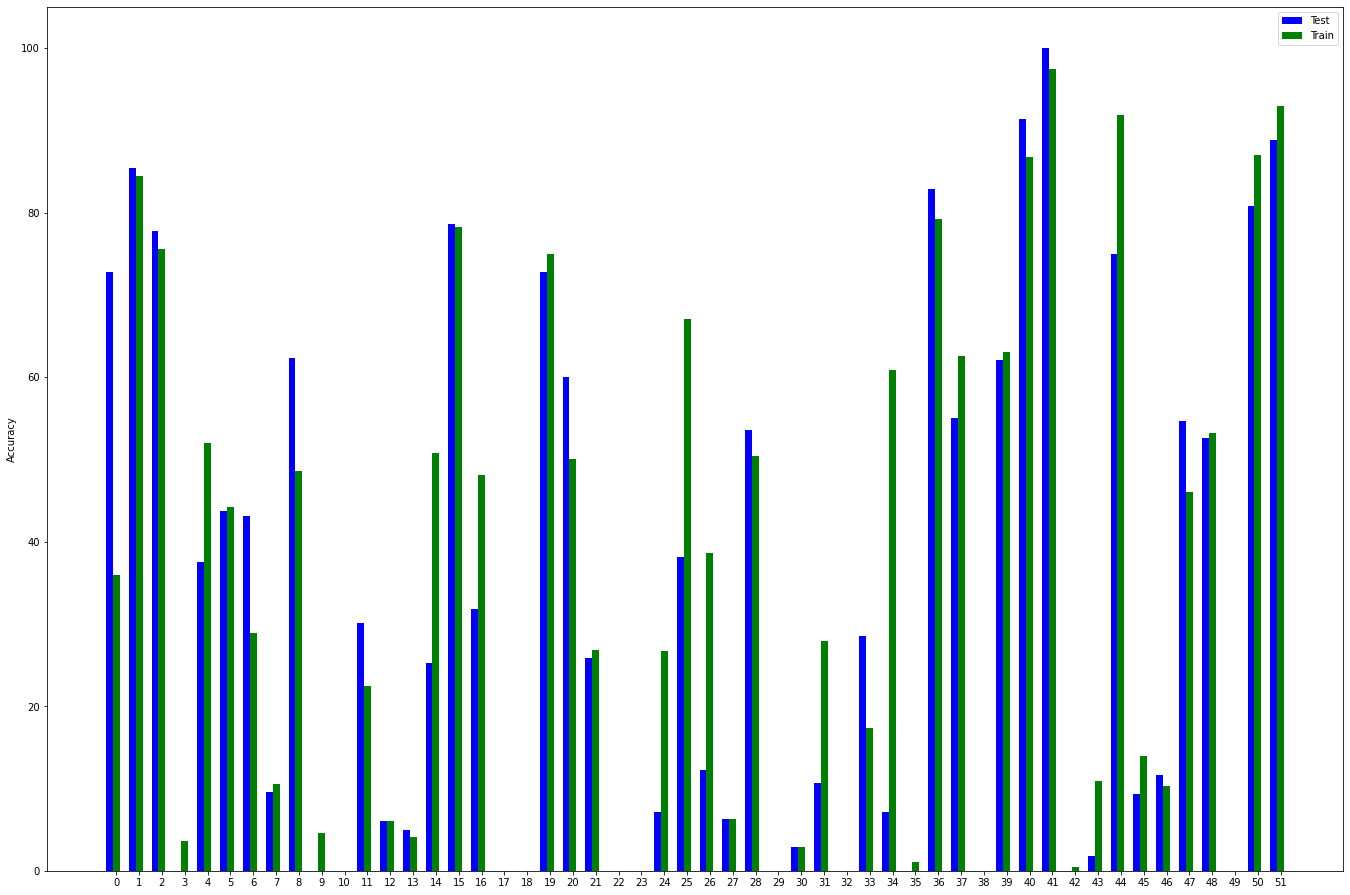

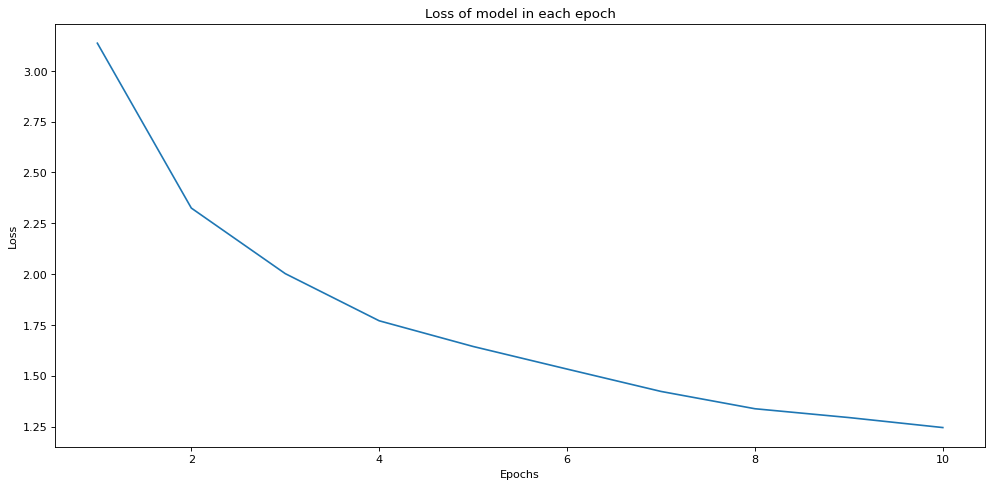

In [ ]:
  np.random.seed(123)
  np.set_printoptions(8, suppress=True) 
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = Model2(len(classes))
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.4, weight_decay = 0.0008)
  losses = fit(model, trainLoaderNormalized, device, criterion, optimizer)
  print("Validation Accuracy: ")
  test_model_accuracy(model, testLoaderNormalized)
  print("Train Accuracy: ")
  test_model_accuracy(model, trainLoaderNormalized)
  getAccuracyOfClasses(model, testLoaderNormalized, trainLoaderNormalized, classes)
  plotLossesInEpochs(losses, 10)

In [ ]:
print("LAYER 1: ")
for parameter in model.layer1.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 2: ")  
for parameter in model.layer2.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 3: ")
for parameter in model.layer3.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 4: ")
for parameter in model.layer4.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 5: ")
for parameter in model.layer5.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 6: ")
for parameter in model.layer6.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))

LAYER 1: 
Parameter containing:
tensor([[ 0.0011, -0.0068, -0.0028,  ..., -0.0025,  0.0002, -0.0080],
        [ 0.0054, -0.0036, -0.0111,  ..., -0.0083, -0.0087,  0.0032],
        [-0.0094, -0.0003, -0.0088,  ..., -0.0032,  0.0003, -0.0047],
        ...,
        [-0.0104,  0.0079,  0.0045,  ...,  0.0025,  0.0072, -0.0053],
        [ 0.0088, -0.0034, -0.0032,  ..., -0.0006,  0.0103,  0.0015],
        [ 0.0103, -0.0019, -0.0051,  ..., -0.0025, -0.0096, -0.0039]],
       device='cuda:0', requires_grad=True)
Number of Paramers:  8000
Parameter containing:
tensor([ 0.0046,  0.0086,  0.0057,  ..., -0.0035,  0.0057,  0.0080],
       device='cuda:0', requires_grad=True)
Number of Paramers:  8000
LAYER 2: 
Parameter containing:
tensor([[-0.0004,  0.0064,  0.0057,  ..., -0.0044, -0.0054,  0.0011],
        [-0.0018, -0.0029, -0.0039,  ..., -0.0063,  0.0016,  0.0058],
        [-0.0033, -0.0056,  0.0013,  ..., -0.0035, -0.0071, -0.0066],
        ...,
        [ 0.0019, -0.0052, -0.0017,  ..., -0.004

In [ ]:
Entropy(model, testLoaderNormalized)

2.0076601826227627


epoch 1, train_loss: 3.036, time elapsed: 51.381739 seconds
epoch 2, train_loss: 2.247, time elapsed: 50.772547 seconds
epoch 3, train_loss: 1.876, time elapsed: 50.311518 seconds
epoch 4, train_loss: 1.659, time elapsed: 50.282344 seconds
epoch 5, train_loss: 1.508, time elapsed: 50.025205 seconds
epoch 6, train_loss: 1.392, time elapsed: 49.901549 seconds
epoch 7, train_loss: 1.363, time elapsed: 49.743351 seconds
epoch 8, train_loss: 1.285, time elapsed: 50.255878 seconds
epoch 9, train_loss: 1.207, time elapsed: 50.327677 seconds
epoch 10, train_loss: 1.153, time elapsed: 50.278475 seconds
total training time: 8.388 minutes
Validation Accuracy: 
Accuracy: 59.752321981424146%
Train Accuracy: 
Accuracy: 64.6914822266935%
OUTPUT TESR: 
{0: 100.0, 1: 88.19444444444444, 2: 90.12345679012346, 3: 17.142857142857142, 4: 69.64285714285714, 5: 50.790861159929705, 6: 27.586206896551722, 7: 14.285714285714286, 8: 57.971014492753625, 9: 19.565217391304348, 10: 0.0, 11: 85.5421686746988, 12: 12.

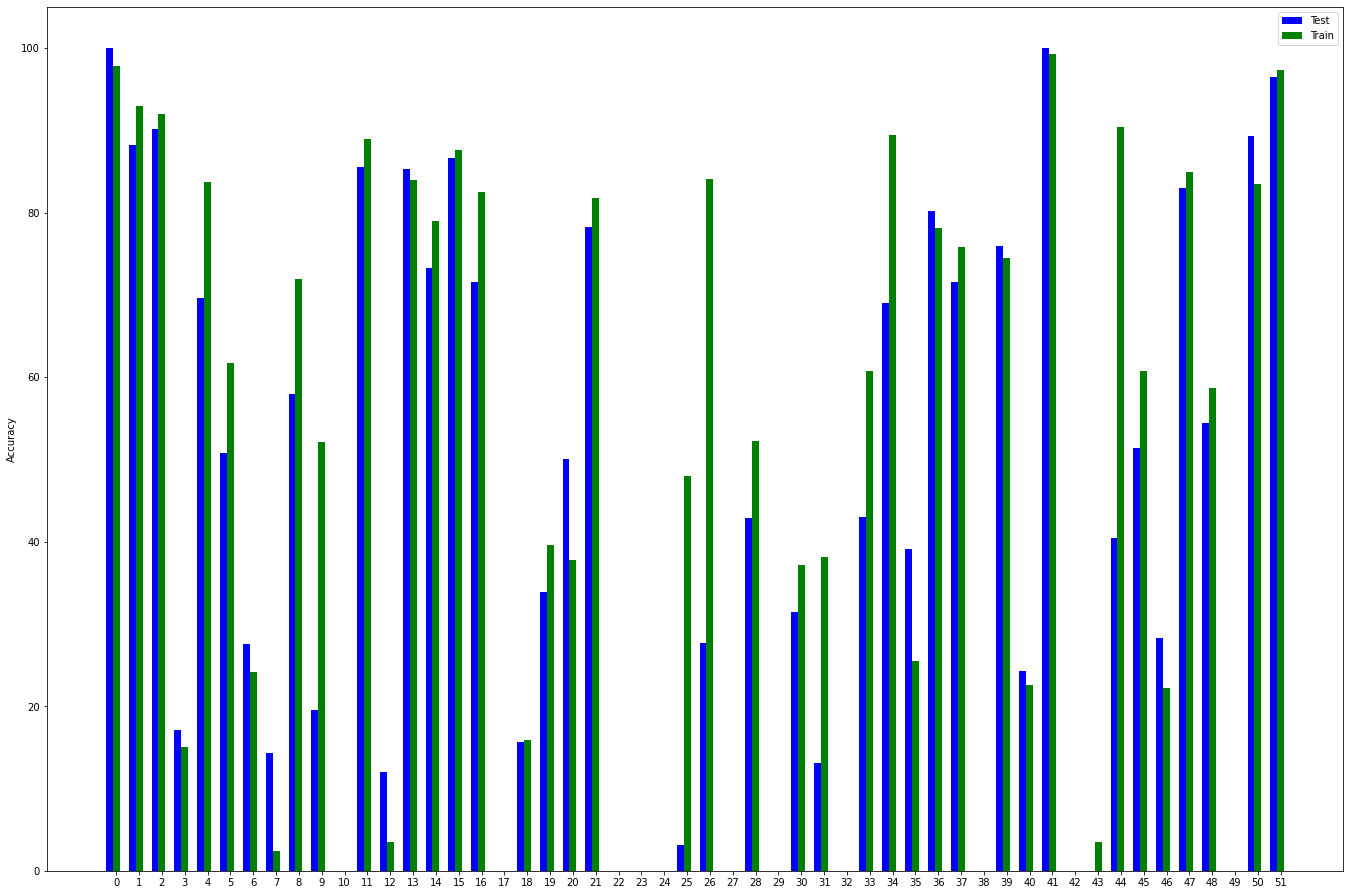

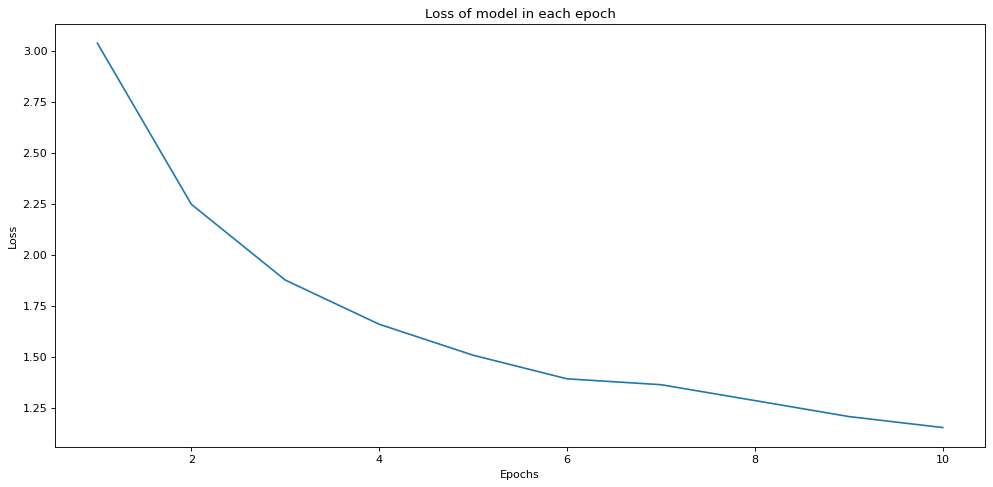

In [ ]:
  np.random.seed(123)
  np.set_printoptions(8, suppress=True) 
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  model = Model2(len(classes))
  model = model.to(device)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.4, weight_decay = 0.00001)
  losses = fit(model, trainLoaderNormalized, device, criterion, optimizer)
  print("Validation Accuracy: ")
  test_model_accuracy(model, testLoaderNormalized)
  print("Train Accuracy: ")
  test_model_accuracy(model, trainLoaderNormalized)
  getAccuracyOfClasses(model, testLoaderNormalized, trainLoaderNormalized, classes)
  plotLossesInEpochs(losses, 10)

In [ ]:
print("LAYER 1: ")
for parameter in model.layer1.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 2: ")  
for parameter in model.layer2.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 3: ")
for parameter in model.layer3.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 4: ")
for parameter in model.layer4.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 5: ")
for parameter in model.layer5.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))
print("LAYER 6: ")
for parameter in model.layer6.parameters():
  print(parameter)
  print("Number of Paramers: ", len(parameter))

LAYER 1: 
Parameter containing:
tensor([[-0.0023,  0.0048,  0.0115,  ..., -0.0117,  0.0001, -0.0003],
        [ 0.0124,  0.0063, -0.0147,  ...,  0.0084, -0.0094, -0.0078],
        [ 0.0094,  0.0007,  0.0106,  ...,  0.0115, -0.0019,  0.0082],
        ...,
        [-0.0136,  0.0132,  0.0110,  ..., -0.0145, -0.0075,  0.0055],
        [ 0.0010, -0.0017, -0.0031,  ...,  0.0044,  0.0129, -0.0023],
        [ 0.0133,  0.0025,  0.0077,  ...,  0.0103,  0.0011, -0.0092]],
       device='cuda:0', requires_grad=True)
Number of Paramers:  8000
Parameter containing:
tensor([ 0.0111,  0.0097,  0.0067,  ...,  0.0082, -0.0113, -0.0054],
       device='cuda:0', requires_grad=True)
Number of Paramers:  8000
LAYER 2: 
Parameter containing:
tensor([[-0.0095,  0.0113, -0.0076,  ...,  0.0043, -0.0039,  0.0045],
        [-0.0117,  0.0037,  0.0067,  ...,  0.0083, -0.0111,  0.0090],
        [ 0.0057, -0.0025, -0.0085,  ..., -0.0068,  0.0095,  0.0068],
        ...,
        [-0.0097,  0.0035, -0.0016,  ..., -0.009

In [ ]:
Entropy(model, testLoaderNormalized)

1.2964273120602992
